In [1]:
import tensorflow as tf
from tensorflow import keras
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from math import sqrt


In [2]:
# Loading the training dataset as a Pandas DataFrame
df=pd.read_csv('ETG1.csv')
df

Unnamed: 0                       _id  RealP2  RealP3  RealP1  Vrms1  \
0                0  61d9cefbdd4ae07ecb861f64     8.5    25.8     3.2  260.3   
1                1  61d9cefbdd4ae07ecb861f68    12.4    23.7     7.6  260.5   
2                2  61d9cefbdd4ae07ecb861f6c     8.9    25.3     3.0  260.4   
3                3  61d9cefbdd4ae07ecb861f70    11.0    22.3     7.0  260.5   
4                4  61d9cefbdd4ae07ecb861f74    11.6    27.2     4.2  260.5   
...            ...                       ...     ...     ...     ...    ...   
862352      862352  62141bb4dd4ae07ecbbab1b4    12.0    28.2     6.6  259.3   
862353      862353  62141bb9dd4ae07ecbbab1b8     9.6    22.7     7.8  259.1   
862354      862354  62141bbedd4ae07ecbbab1bc    13.1    27.9     7.7  259.2   
862355      862355  62141bc3dd4ae07ecbbab1c0     7.6    24.4     8.4  259.1   
862356      862356  62141bc9dd4ae07ecbbab1c4    11.6    24.9   162.2  259.2   

        ETG                 date   index  Vrms2  Irms2  Irms3  Irms1  PowerF2  \
0         1  2022-01-01 00:00:02   59338  258.4  239.3  284.1  342.7    0.138   
1         1  2022-01-01 00:00:07   59339  258.3  240.5  272.0  332.6    0.200   
2         1  2022-01-01 00:00:13   59340  258.3  231.5  279.1  335.5    0.150   
3         1  2022-01-01 00:00:18   59341  258.3  238.4  272.7  343.8    0.179   
4         1  2022-01-01 00:00:23   59342  258.3  241.3  278.7  336.0    0.186   
...     ...                  ...     ...    ...    ...    ...    ...      ...   
862352    1  2022-02-22 00:09:40  921931  257.2  243.0  286.0  406.4    0.193   
862353    1  2022-02-22 00:09:45  921932  257.1  242.0  279.6  420.0    0.154   
862354    1  2022-02-22 00:09:50  921933  257.1  248.1  283.3  409.5    0.206   
862355    1  2022-02-22 00:09:55  921934  257.4  249.8  281.6  433.6    0.119   
862356    1  2022-02-22 00:10:01  921935  257.1  247.8  276.4  725.3    0.182   

        PowerF3  Vrms3  PowerF1  
0         0.350  260.2    0.036  
1         0.334  260.1    0.087  
2         0.348  260.2    0.034  
3         0.314  260.2    0.078  
4         0.375  260.3    0.048  
...         ...    ...      ...  
862352    0.380  259.0    0.063  
862353    0.313  258.8    0.072  
862354    0.380  258.9    0.072  
862355    0.335  258.7    0.074  
862356    0.348  258.7    0.863  

[862357 rows x 17 columns]

In [3]:
#transformer la colonne de type objet en type  date 
timefmt = "%Y-%m-%d %H:%M:%S" 
df['date'] = pd.to_datetime(df['date'], format = timefmt, errors='coerce')
df

Unnamed: 0                       _id  RealP2  RealP3  RealP1  Vrms1  \
0                0  61d9cefbdd4ae07ecb861f64     8.5    25.8     3.2  260.3   
1                1  61d9cefbdd4ae07ecb861f68    12.4    23.7     7.6  260.5   
2                2  61d9cefbdd4ae07ecb861f6c     8.9    25.3     3.0  260.4   
3                3  61d9cefbdd4ae07ecb861f70    11.0    22.3     7.0  260.5   
4                4  61d9cefbdd4ae07ecb861f74    11.6    27.2     4.2  260.5   
...            ...                       ...     ...     ...     ...    ...   
862352      862352  62141bb4dd4ae07ecbbab1b4    12.0    28.2     6.6  259.3   
862353      862353  62141bb9dd4ae07ecbbab1b8     9.6    22.7     7.8  259.1   
862354      862354  62141bbedd4ae07ecbbab1bc    13.1    27.9     7.7  259.2   
862355      862355  62141bc3dd4ae07ecbbab1c0     7.6    24.4     8.4  259.1   
862356      862356  62141bc9dd4ae07ecbbab1c4    11.6    24.9   162.2  259.2   

        ETG                date   index  Vrms2  Irms2  Irms3  Irms1  PowerF2  \
0         1 2022-01-01 00:00:02   59338  258.4  239.3  284.1  342.7    0.138   
1         1 2022-01-01 00:00:07   59339  258.3  240.5  272.0  332.6    0.200   
2         1 2022-01-01 00:00:13   59340  258.3  231.5  279.1  335.5    0.150   
3         1 2022-01-01 00:00:18   59341  258.3  238.4  272.7  343.8    0.179   
4         1 2022-01-01 00:00:23   59342  258.3  241.3  278.7  336.0    0.186   
...     ...                 ...     ...    ...    ...    ...    ...      ...   
862352    1 2022-02-22 00:09:40  921931  257.2  243.0  286.0  406.4    0.193   
862353    1 2022-02-22 00:09:45  921932  257.1  242.0  279.6  420.0    0.154   
862354    1 2022-02-22 00:09:50  921933  257.1  248.1  283.3  409.5    0.206   
862355    1 2022-02-22 00:09:55  921934  257.4  249.8  281.6  433.6    0.119   
862356    1 2022-02-22 00:10:01  921935  257.1  247.8  276.4  725.3    0.182   

        PowerF3  Vrms3  PowerF1  
0         0.350  260.2    0.036  
1         0.334  260.1    0.087  
2         0.348  260.2    0.034  
3         0.314  260.2    0.078  
4         0.375  260.3    0.048  
...         ...    ...      ...  
862352    0.380  259.0    0.063  
862353    0.313  258.8    0.072  
862354    0.380  258.9    0.072  
862355    0.335  258.7    0.074  
862356    0.348  258.7    0.863  

[862357 rows x 17 columns]

In [4]:
df = pd.read_csv('ETG1.csv', parse_dates = ['date'], index_col = ['date'])
df.head()

Unnamed: 0                       _id  RealP2  RealP3  \
date                                                                        
2022-01-01 00:00:02           0  61d9cefbdd4ae07ecb861f64     8.5    25.8   
2022-01-01 00:00:07           1  61d9cefbdd4ae07ecb861f68    12.4    23.7   
2022-01-01 00:00:13           2  61d9cefbdd4ae07ecb861f6c     8.9    25.3   
2022-01-01 00:00:18           3  61d9cefbdd4ae07ecb861f70    11.0    22.3   
2022-01-01 00:00:23           4  61d9cefbdd4ae07ecb861f74    11.6    27.2   

                     RealP1  Vrms1  ETG  index  Vrms2  Irms2  Irms3  Irms1  \
date                                                                         
2022-01-01 00:00:02     3.2  260.3    1  59338  258.4  239.3  284.1  342.7   
2022-01-01 00:00:07     7.6  260.5    1  59339  258.3  240.5  272.0  332.6   
2022-01-01 00:00:13     3.0  260.4    1  59340  258.3  231.5  279.1  335.5   
2022-01-01 00:00:18     7.0  260.5    1  59341  258.3  238.4  272.7  343.8   
2022-01-01 00:00:23     4.2  260.5    1  59342  258.3  241.3  278.7  336.0   

                     PowerF2  PowerF3  Vrms3  PowerF1  
date                                                   
2022-01-01 00:00:02    0.138    0.350  260.2    0.036  
2022-01-01 00:00:07    0.200    0.334  260.1    0.087  
2022-01-01 00:00:13    0.150    0.348  260.2    0.034  
2022-01-01 00:00:18    0.179    0.314  260.2    0.078  
2022-01-01 00:00:23    0.186    0.375  260.3    0.048

In [5]:
df['Rtot']=df['RealP1']+df['RealP2']+df['RealP3']

# Data viz

In [6]:
#identify null values
df.isnull().sum()

Unnamed: 0    0
_id           0
RealP2        0
RealP3        0
RealP1        0
Vrms1         0
ETG           0
index         0
Vrms2         0
Irms2         0
Irms3         0
Irms1         0
PowerF2       0
PowerF3       0
Vrms3         0
PowerF1       0
Rtot          0
dtype: int64

<AxesSubplot:ylabel='date'>

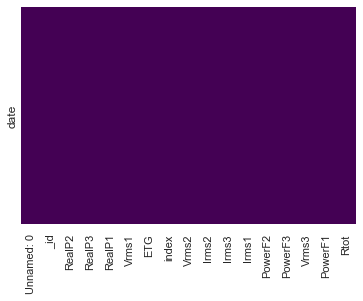

In [7]:
# chacking where null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Statistical information

In [8]:
# Statistical info about data
df.describe()

Unnamed: 0         RealP2         RealP3         RealP1  \
count  862357.00000  862357.000000  862357.000000  862357.000000   
mean   431178.00000      44.463618      62.509052     231.191072   
std    248941.16738      75.872497     111.125793     534.820219   
min         0.00000       0.300000       0.000000       0.000000   
25%    215589.00000      10.100000      22.800000       7.800000   
50%    431178.00000      12.800000      24.800000      17.800000   
75%    646767.00000      52.300000      27.000000     122.000000   
max    862356.00000     793.800000    1268.700000    4566.900000   

               Vrms1       ETG          index          Vrms2          Irms2  \
count  862357.000000  862357.0  862357.000000  862357.000000  862357.000000   
mean      257.731862       1.0  490699.807981     256.099656     535.587699   
std         1.922128       0.0  248978.166023       1.862584     578.072699   
min       248.600000       1.0   59338.000000     249.000000     218.700000   
25%       256.300000       1.0  275113.000000     254.700000     242.000000   
50%       257.800000       1.0  490717.000000     256.200000     248.500000   
75%       259.200000       1.0  706306.000000     257.500000     581.400000   
max       263.400000       1.0  921935.000000     262.200000    9345.200000   

               Irms3          Irms1        PowerF2        PowerF3  \
count  862357.000000  862357.000000  862357.000000  862357.000000   
mean      791.513162    1217.894135       0.267162       0.310634   
std      1363.891531    2038.410654       0.132004       0.069371   
min       236.800000     243.800000       0.001000       0.000000   
25%       279.300000     397.900000       0.158000       0.304000   
50%       285.000000     454.300000       0.202000       0.328000   
75%       328.200000     641.900000       0.367000       0.356000   
max     10857.700000   17949.200000       0.731000       0.606000   

               Vrms3        PowerF1           Rtot  
count  862357.000000  862357.000000  862357.000000  
mean      257.909838       0.358240     338.163742  
std         1.835225       0.350791     579.826838  
min       246.800000       0.000000      18.600000  
25%       256.600000       0.076000      45.200000  
50%       258.000000       0.153000     133.800000  
75%       259.300000       0.794000     251.600000  
max       264.800000       0.997000    4912.800000

## viz de la variation de Rtot

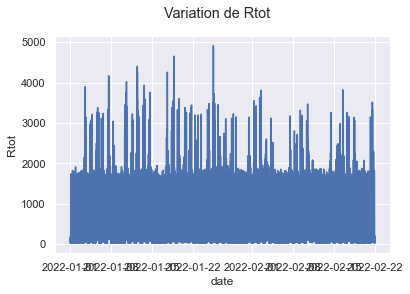

In [9]:
plt.xlabel('date')
plt.ylabel('Rtot')
plt.suptitle('Variation de Rtot')
plt.plot(df['Rtot'])

Text(0.5, 0.98, 'Distribution de Rtot')

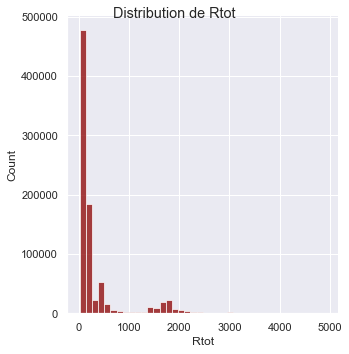

In [10]:
# is rtot has a normal distribution 
sns.displot(df['Rtot'].dropna(),kde=False,color='darkred',bins=40)
plt.suptitle('Distribution de Rtot')


In [11]:
## we need to split the data first and then apply feature
## Engineering
X_train, X_test, X_val= df[0:int(len(df)*0.60)], df[int(len(df)*0.60):int(len(df)*0.80)],df[int(len(df)*0.80):]

## Studying features

### Numerical features

In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  16


Unnamed: 0  RealP2  RealP3  RealP1  Vrms1  ETG  index  \
date                                                                         
2022-01-01 00:00:02           0     8.5    25.8     3.2  260.3    1  59338   
2022-01-01 00:00:07           1    12.4    23.7     7.6  260.5    1  59339   
2022-01-01 00:00:13           2     8.9    25.3     3.0  260.4    1  59340   
2022-01-01 00:00:18           3    11.0    22.3     7.0  260.5    1  59341   
2022-01-01 00:00:23           4    11.6    27.2     4.2  260.5    1  59342   

                     Vrms2  Irms2  Irms3  Irms1  PowerF2  PowerF3  Vrms3  \
date                                                                       
2022-01-01 00:00:02  258.4  239.3  284.1  342.7    0.138    0.350  260.2   
2022-01-01 00:00:07  258.3  240.5  272.0  332.6    0.200    0.334  260.1   
2022-01-01 00:00:13  258.3  231.5  279.1  335.5    0.150    0.348  260.2   
2022-01-01 00:00:18  258.3  238.4  272.7  343.8    0.179    0.314  260.2   
2022-01-01 00:00:23  258.3  241.3  278.7  336.0    0.186    0.375  260.3   

                     PowerF1  Rtot  
date                                
2022-01-01 00:00:02    0.036  37.5  
2022-01-01 00:00:07    0.087  43.7  
2022-01-01 00:00:13    0.034  37.2  
2022-01-01 00:00:18    0.078  40.3  
2022-01-01 00:00:23    0.048  43.0

Numerical variables are usually of 2 type
 1. Continous variable and Discrete Variables

#### discrete features

In [13]:

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['_id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


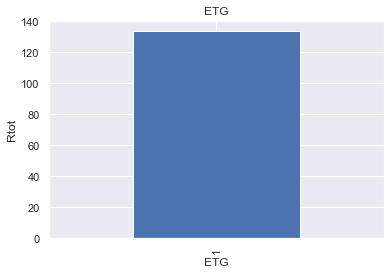

In [14]:
## Lets Find the realtionship between them and rtot

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Rtot'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rtot')
    plt.title(feature)
    plt.show()

### Continuous features

In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 15


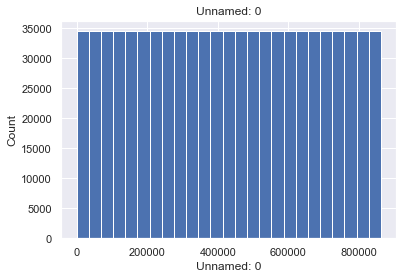

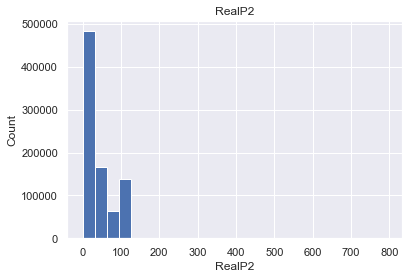

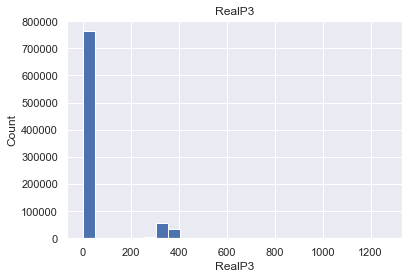

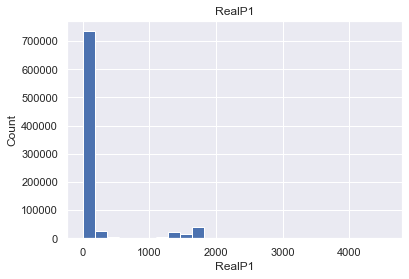

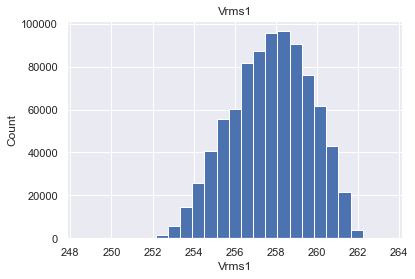

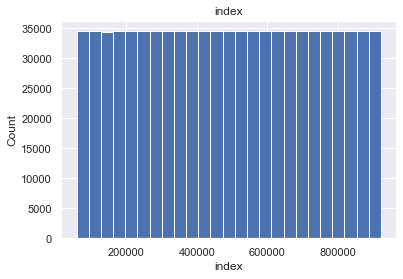

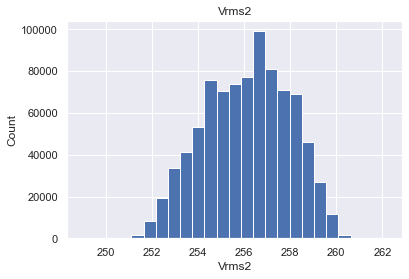

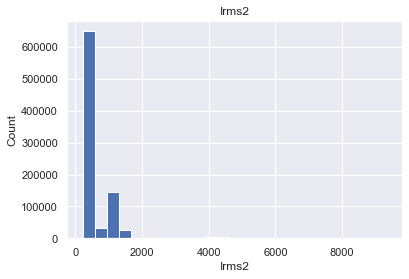

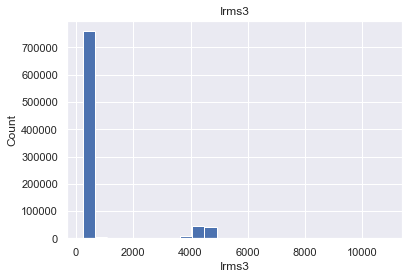

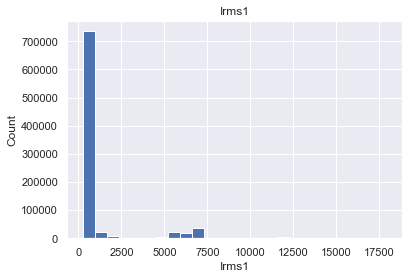

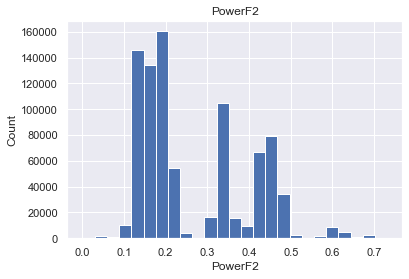

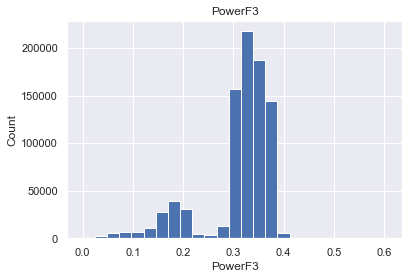

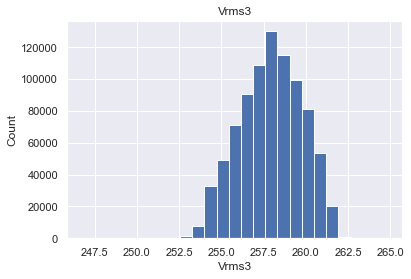

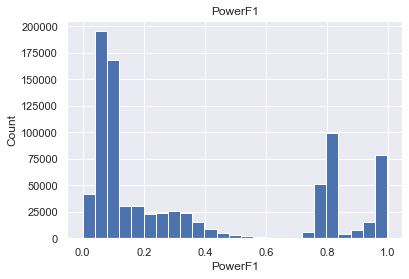

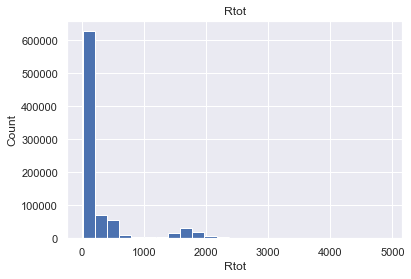

In [16]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

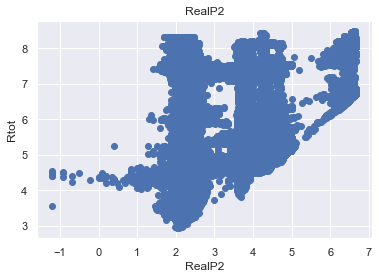

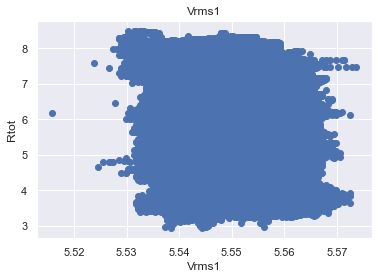

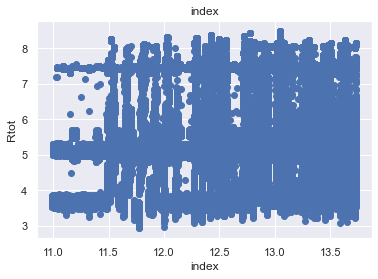

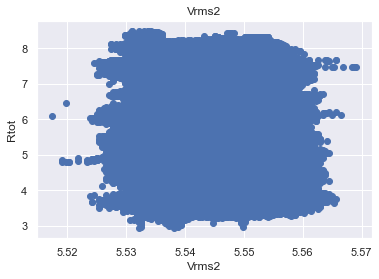

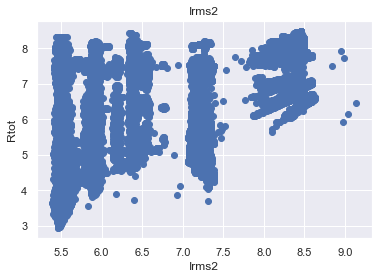

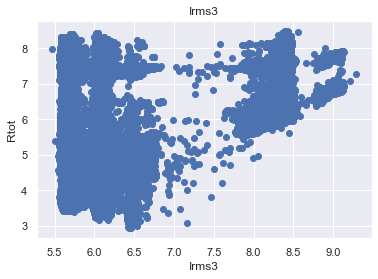

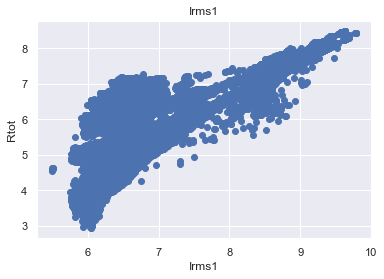

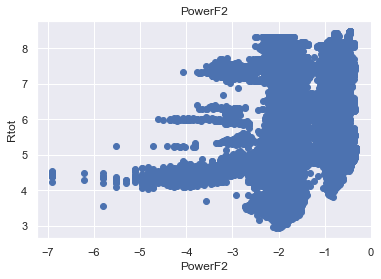

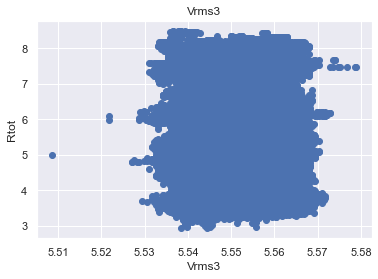

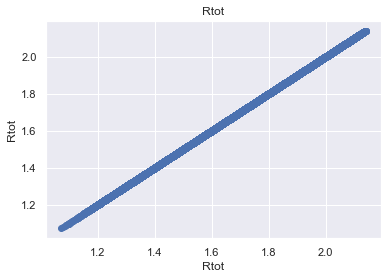

In [17]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Rtot']=np.log(data['Rtot'])
        plt.scatter(data[feature],data['Rtot'])
        plt.xlabel(feature)
        plt.ylabel('Rtot')
        plt.title(feature)
        plt.show()

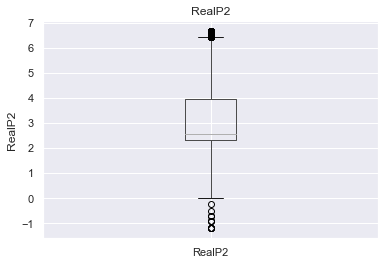

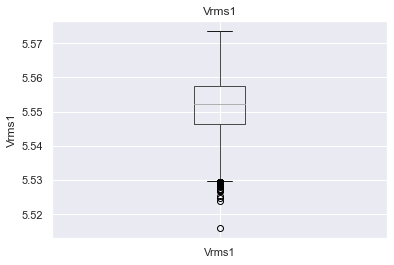

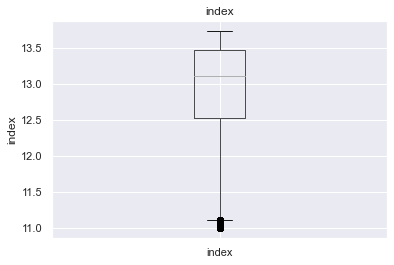

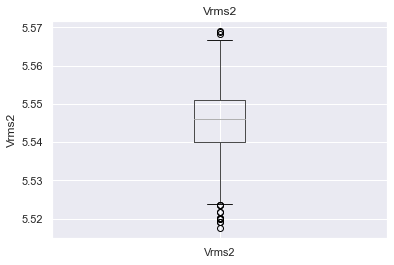

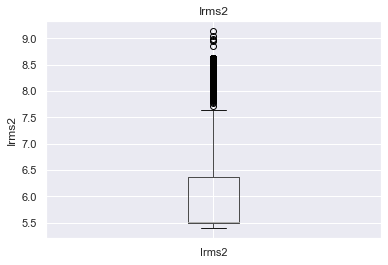

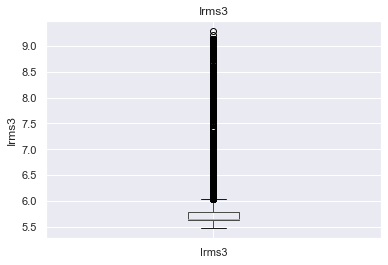

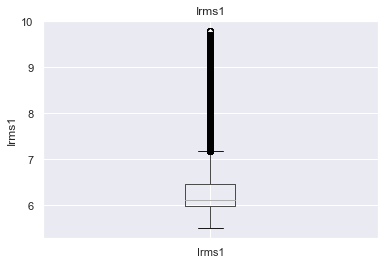

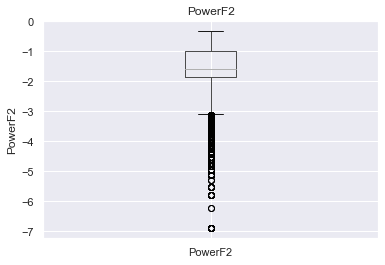

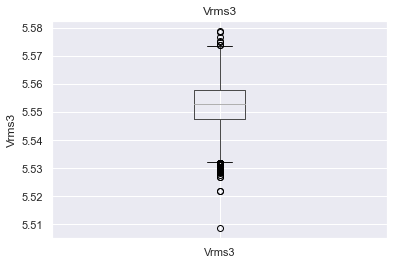

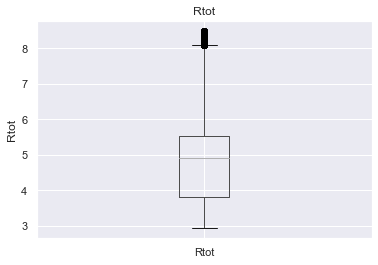

In [18]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical features

In [19]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['_id']

In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is _id and number of categories are 862357


In [21]:

for feature in categorical_features:
    labels_ordered=df.groupby([feature])['RealP1'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

## Feature Selection

### Outliers

In [22]:
cols = ['Rtot','RealP2','RealP3'	,'RealP1'	,'Vrms1',	'ETG',	'index',	'Vrms2'	,'Irms2',	'Irms3'	,'Irms1',	'PowerF2',	'PowerF3'	,'Vrms3',	'PowerF1'] # The columns you want to search for outliers in
#X_train=X_train['Irms1', 'PowerF1', 'RealP1']
# Calculate quantiles and IQR
Q1 = X_train[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = X_train[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((X_train[cols] < (Q1 - 1.5 * IQR)) | (X_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_X = X_train[condition]

### Scaling

In [23]:
feature_scale=[feature for feature in filtered_X.columns if feature not in ['_id','ETG','index']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(filtered_X[feature_scale])

MinMaxScaler()

In [24]:
x=filtered_X['Rtot']
x=pd.DataFrame(x)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x)

MinMaxScaler()

In [25]:
# transform the train , and add on the Id 
data = pd.concat([filtered_X[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(filtered_X[feature_scale]), columns=feature_scale)],
                    axis=1)
data.set_index(data['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
59338  2022-01-01 00:00:02  61d9cefbdd4ae07ecb861f64   59338    0.000000   
59339  2022-01-01 00:00:07  61d9cefbdd4ae07ecb861f68   59339    0.000002   
59340  2022-01-01 00:00:13  61d9cefbdd4ae07ecb861f6c   59340    0.000004   
59341  2022-01-01 00:00:18  61d9cefbdd4ae07ecb861f70   59341    0.000006   
59342  2022-01-01 00:00:23  61d9cefbdd4ae07ecb861f74   59342    0.000008   
...                    ...                       ...     ...         ...   
576948 2022-02-01 04:58:32  61f8afe8dd4ae07ecba5a695  576948    0.999992   
576949 2022-02-01 04:58:38  61f8afeedd4ae07ecba5a699  576949    0.999994   
576950 2022-02-01 04:58:43  61f8aff3dd4ae07ecba5a69d  576950    0.999996   
576951 2022-02-01 04:58:48  61f8aff8dd4ae07ecba5a6a1  576951    0.999998   
576952 2022-02-01 04:58:53  61f8affddd4ae07ecba5a6a5  576952    1.000000   

          RealP2    RealP3    RealP1     Vrms1     Vrms2     Irms2     Irms3  \
index                                                                          
59338   0.046053  0.555556  0.013451  0.743119  0.726415  0.038897  0.134281   
59339   0.082707  0.432749  0.031946  0.761468  0.716981  0.041278  0.070563   
59340   0.049812  0.526316  0.012610  0.752294  0.716981  0.023417  0.107952   
59341   0.069549  0.350877  0.029424  0.761468  0.716981  0.037111  0.074250   
59342   0.075188  0.637427  0.017654  0.761468  0.716981  0.042866  0.105845   
...          ...       ...       ...       ...       ...       ...       ...   
576948  0.078008  0.497076  0.044977  0.651376  0.632075  0.104386  0.222222   
576949  0.070489  0.614035  0.031106  0.651376  0.632075  0.050804  0.150079   
576950  0.046053  0.421053  0.034889  0.614679  0.632075  0.052391  0.135334   
576951  0.091165  0.514620  0.039512  0.623853  0.613208  0.045247  0.140600   
576952  0.048872  0.567251  0.028163  0.587156  0.613208  0.044453  0.133228   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
59338   0.039930  0.152513  0.673684  0.737864  0.039046  0.025379  
59339   0.025265  0.259965  0.589474  0.728155  0.094360  0.045814  
59340   0.029476  0.173310  0.663158  0.737864  0.036876  0.024390  
59341   0.041528  0.223570  0.484211  0.737864  0.084599  0.034608  
59342   0.030202  0.235702  0.805263  0.747573  0.052061  0.043507  
...          ...       ...       ...       ...       ...       ...  
576948  0.098301  0.206239  0.505263  0.631068  0.117137  0.058009  
576949  0.109917  0.218371  0.721053  0.650485  0.079176  0.051088  
576950  0.119501  0.147314  0.510526  0.631068  0.087852  0.034608  
576951  0.103093  0.282496  0.621053  0.621359  0.101952  0.059328  
576952  0.105706  0.157712  0.694737  0.611650  0.072668  0.038563  

[252718 rows x 17 columns]

In [26]:
# transform the test , and add on the Id 
datatest = pd.concat([X_test[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
datatest.set_index(datatest['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
576953 2022-02-01 04:58:58  61f8b002dd4ae07ecba5a6a9  576953    1.000002   
576954 2022-02-01 04:59:04  61f8b008dd4ae07ecba5a6ad  576954    1.000004   
576955 2022-02-01 04:59:09  61f8b00ddd4ae07ecba5a6b1  576955    1.000006   
576956 2022-02-01 04:59:14  61f8b012dd4ae07ecba5a6b5  576956    1.000008   
576957 2022-02-01 04:59:19  61f8b017dd4ae07ecba5a6b9  576957    1.000010   
...                    ...                       ...     ...         ...   
749419 2022-02-11 14:32:21  62066565dd4ae07ecbb02aea  749419    1.333326   
749420 2022-02-11 14:32:26  6206656add4ae07ecbb02aee  749420    1.333328   
749421 2022-02-11 14:32:31  6206656fdd4ae07ecbb02af2  749421    1.333329   
749422 2022-02-11 14:32:36  62066574dd4ae07ecbb02af6  749422    1.333331   
749423 2022-02-11 14:32:41  62066579dd4ae07ecbb02afa  749423    1.333333   

          RealP2    RealP3    RealP1     Vrms1     Vrms2     Irms2     Irms3  \
index                                                                          
576953  0.079887  0.479532  0.049601  0.614679  0.613208  0.057353  0.101106   
576954  0.064850  0.701754  0.023960  0.614679  0.613208  0.048621  0.134281   
576955  0.049812  0.385965  0.041614  0.614679  0.622642  0.032348  0.109005   
576956  0.089286  0.695906  0.040353  0.605505  0.613208  0.061322  0.115850   
576957  0.037594  0.456140  0.034048  0.614679  0.622642  0.053185  0.126909   
...          ...       ...       ...       ...       ...       ...       ...   
749419  0.053571  0.321637  0.268600  0.366972  0.415094  0.036317  0.105845   
749420  0.075188  0.748538  0.238756  0.394495  0.433962  0.059933  0.154292   
749421  0.056391  0.356725  0.291719  0.385321  0.443396  0.062512  0.121643   
749422  0.068609  0.666667  0.284994  0.394495  0.452830  0.058345  0.161664   
749423  0.069549  0.450292  0.294662  0.394495  0.452830  0.042270  0.065298   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
576953  0.117468  0.242634  0.626316  0.601942  0.124729  0.061305  
576954  0.102076  0.204506  0.852632  0.640777  0.062907  0.048451  
576955  0.122695  0.168111  0.500000  0.611650  0.104121  0.039222  
576956  0.103238  0.266898  0.878947  0.621359  0.104121  0.069545  
576957  0.116161  0.121317  0.563158  0.611650  0.085683  0.032960  
...          ...       ...       ...       ...       ...       ...  
749419  0.601713  0.180243  0.431579  0.446602  0.370933  0.214898  
749420  0.552345  0.228769  0.894737  0.475728  0.345987  0.223138  
749421  0.641498  0.171577  0.457895  0.475728  0.388286  0.235992  
749422  0.643822  0.211438  0.789474  0.475728  0.377440  0.252472  
749423  0.646290  0.223570  0.642105  0.475728  0.390456  0.248187  

[172471 rows x 17 columns]

In [27]:
# transform the validation , and add on the Id 
dataval = pd.concat([X_val[['_id','index']].reset_index(drop=False),
                    pd.DataFrame(scaler.transform(X_val[feature_scale]), columns=feature_scale)],
                    axis=1)
dataval.set_index(dataval['index'])


date                       _id   index  Unnamed: 0  \
index                                                                      
749424 2022-02-11 14:32:47  6206657fdd4ae07ecbb02afe  749424    1.333335   
749425 2022-02-11 14:32:52  62066584dd4ae07ecbb02b02  749425    1.333337   
749426 2022-02-11 14:32:57  62066589dd4ae07ecbb02b06  749426    1.333339   
749427 2022-02-11 14:33:02  6206658edd4ae07ecbb02b0a  749427    1.333341   
749428 2022-02-11 14:33:07  62066594dd4ae07ecbb02b0e  749428    1.333343   
...                    ...                       ...     ...         ...   
921931 2022-02-22 00:09:40  62141bb4dd4ae07ecbbab1b4  921931    1.666661   
921932 2022-02-22 00:09:45  62141bb9dd4ae07ecbbab1b8  921932    1.666663   
921933 2022-02-22 00:09:50  62141bbedd4ae07ecbbab1bc  921933    1.666665   
921934 2022-02-22 00:09:55  62141bc3dd4ae07ecbbab1c0  921934    1.666667   
921935 2022-02-22 00:10:01  62141bc9dd4ae07ecbbab1c4  921935    1.666669   

          RealP2    RealP3    RealP1     Vrms1     Vrms2     Irms2     Irms3  \
index                                                                          
749424  0.062030  0.584795  0.283312  0.376147  0.443396  0.037111  0.161137   
749425  0.079887  0.426901  0.240858  0.394495  0.452830  0.051399  0.107425   
749426  0.052632  0.497076  0.216898  0.385321  0.433962  0.034134  0.173249   
749427  0.088346  0.543860  0.247583  0.385321  0.443396  0.052987  0.105319   
749428  0.047932  0.473684  0.241278  0.385321  0.452830  0.048422  0.153239   
...          ...       ...       ...       ...       ...       ...       ...   
921931  0.078947  0.695906  0.027743  0.651376  0.613208  0.046239  0.144286   
921932  0.056391  0.374269  0.032787  0.633028  0.603774  0.044255  0.110585   
921933  0.089286  0.678363  0.032367  0.642202  0.603774  0.056360  0.130068   
921934  0.037594  0.473684  0.035309  0.633028  0.632075  0.059734  0.121116   
921935  0.075188  0.502924  0.681799  0.642202  0.603774  0.055765  0.093734   

           Irms1   PowerF2   PowerF3     Vrms3   PowerF1      Rtot  
index                                                               
749424  0.638594  0.202773  0.689474  0.475728  0.377440  0.244232  
749425  0.531000  0.246101  0.557895  0.485437  0.355748  0.208306  
749426  0.534340  0.176776  0.568421  0.485437  0.319957  0.183916  
749427  0.540148  0.272097  0.705263  0.475728  0.362256  0.223138  
749428  0.557137  0.155979  0.563158  0.475728  0.347072  0.200066  
...          ...       ...       ...       ...       ...       ...  
921931  0.132423  0.247834  0.831579  0.621359  0.068330  0.056032  
921932  0.152171  0.180243  0.478947  0.601942  0.078091  0.033949  
921933  0.136925  0.270364  0.831579  0.611650  0.078091  0.062294  
921934  0.171918  0.119584  0.594737  0.592233  0.080260  0.034937  
921935  0.595470  0.228769  0.663158  0.592233  0.936009  0.556691  

[172472 rows x 17 columns]

<AxesSubplot:>

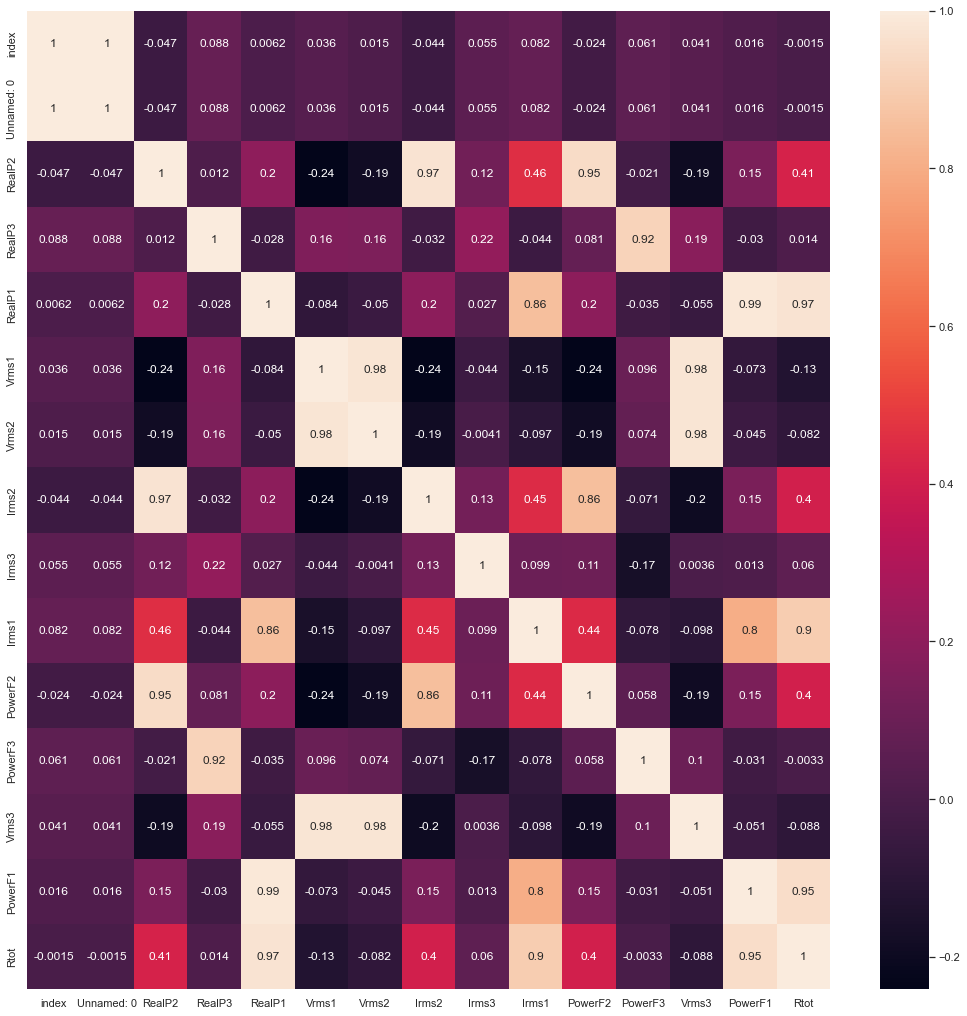

In [28]:
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

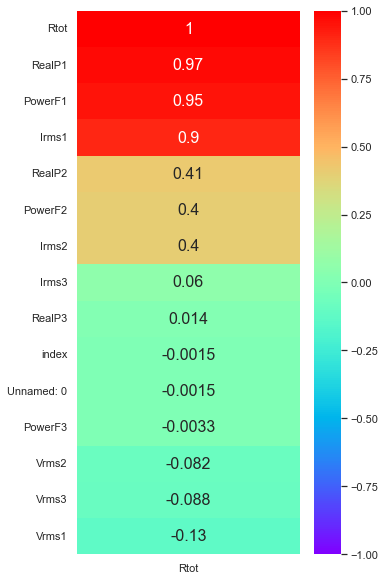

In [29]:
top_features = data.corr()[['Rtot']].sort_values(by=['Rtot'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [56]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)

X = data.drop(['_id','Rtot','date'],axis=1)
y= data['Rtot']
xtest= datatest.drop(['_id','date'],axis=1)
display(X)
display(y)
display(xtest)

index  Unnamed: 0    RealP2    RealP3    RealP1     Vrms1     Vrms2  \
0        59338    0.000000  0.046053  0.555556  0.013451  0.743119  0.726415   
1        59339    0.000002  0.082707  0.432749  0.031946  0.761468  0.716981   
2        59340    0.000004  0.049812  0.526316  0.012610  0.752294  0.716981   
3        59341    0.000006  0.069549  0.350877  0.029424  0.761468  0.716981   
4        59342    0.000008  0.075188  0.637427  0.017654  0.761468  0.716981   
...        ...         ...       ...       ...       ...       ...       ...   
252713  576948    0.999992  0.078008  0.497076  0.044977  0.651376  0.632075   
252714  576949    0.999994  0.070489  0.614035  0.031106  0.651376  0.632075   
252715  576950    0.999996  0.046053  0.421053  0.034889  0.614679  0.632075   
252716  576951    0.999998  0.091165  0.514620  0.039512  0.623853  0.613208   
252717  576952    1.000000  0.048872  0.567251  0.028163  0.587156  0.613208   

           Irms2     Irms3     Irms1   PowerF2   PowerF3     Vrms3   PowerF1  
0       0.038897  0.134281  0.039930  0.152513  0.673684  0.737864  0.039046  
1       0.041278  0.070563  0.025265  0.259965  0.589474  0.728155  0.094360  
2       0.023417  0.107952  0.029476  0.173310  0.663158  0.737864  0.036876  
3       0.037111  0.074250  0.041528  0.223570  0.484211  0.737864  0.084599  
4       0.042866  0.105845  0.030202  0.235702  0.805263  0.747573  0.052061  
...          ...       ...       ...       ...       ...       ...       ...  
252713  0.104386  0.222222  0.098301  0.206239  0.505263  0.631068  0.117137  
252714  0.050804  0.150079  0.109917  0.218371  0.721053  0.650485  0.079176  
252715  0.052391  0.135334  0.119501  0.147314  0.510526  0.631068  0.087852  
252716  0.045247  0.140600  0.103093  0.282496  0.621053  0.621359  0.101952  
252717  0.044453  0.133228  0.105706  0.157712  0.694737  0.611650  0.072668  

[252718 rows x 14 columns]

0         0.025379
1         0.045814
2         0.024390
3         0.034608
4         0.043507
            ...   
252713    0.058009
252714    0.051088
252715    0.034608
252716    0.059328
252717    0.038563
Name: Rtot, Length: 252718, dtype: float64

index  Unnamed: 0    RealP2    RealP3    RealP1     Vrms1     Vrms2  \
0       576953    1.000002  0.079887  0.479532  0.049601  0.614679  0.613208   
1       576954    1.000004  0.064850  0.701754  0.023960  0.614679  0.613208   
2       576955    1.000006  0.049812  0.385965  0.041614  0.614679  0.622642   
3       576956    1.000008  0.089286  0.695906  0.040353  0.605505  0.613208   
4       576957    1.000010  0.037594  0.456140  0.034048  0.614679  0.622642   
...        ...         ...       ...       ...       ...       ...       ...   
172466  749419    1.333326  0.053571  0.321637  0.268600  0.366972  0.415094   
172467  749420    1.333328  0.075188  0.748538  0.238756  0.394495  0.433962   
172468  749421    1.333329  0.056391  0.356725  0.291719  0.385321  0.443396   
172469  749422    1.333331  0.068609  0.666667  0.284994  0.394495  0.452830   
172470  749423    1.333333  0.069549  0.450292  0.294662  0.394495  0.452830   

           Irms2     Irms3     Irms1   PowerF2   PowerF3     Vrms3   PowerF1  \
0       0.057353  0.101106  0.117468  0.242634  0.626316  0.601942  0.124729   
1       0.048621  0.134281  0.102076  0.204506  0.852632  0.640777  0.062907   
2       0.032348  0.109005  0.122695  0.168111  0.500000  0.611650  0.104121   
3       0.061322  0.115850  0.103238  0.266898  0.878947  0.621359  0.104121   
4       0.053185  0.126909  0.116161  0.121317  0.563158  0.611650  0.085683   
...          ...       ...       ...       ...       ...       ...       ...   
172466  0.036317  0.105845  0.601713  0.180243  0.431579  0.446602  0.370933   
172467  0.059933  0.154292  0.552345  0.228769  0.894737  0.475728  0.345987   
172468  0.062512  0.121643  0.641498  0.171577  0.457895  0.475728  0.388286   
172469  0.058345  0.161664  0.643822  0.211438  0.789474  0.475728  0.377440   
172470  0.042270  0.065298  0.646290  0.223570  0.642105  0.475728  0.390456   

            Rtot  
0       0.061305  
1       0.048451  
2       0.039222  
3       0.069545  
4       0.032960  
...          ...  
172466  0.214898  
172467  0.223138  
172468  0.235992  
172469  0.252472  
172470  0.248187  

[172471 rows x 15 columns]

In [31]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

C:\Users\Nada Najari\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+00, tolerance: 6.905e-01
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [32]:
feature_sel_model.get_support()

array([False, False, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True])

In [33]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 5


In [34]:
selected_feat

Index(['RealP1', 'Irms2', 'Irms1', 'PowerF2', 'PowerF1'], dtype='object')

In [35]:
X_train=X[selected_feat]

In [36]:
X_train=np.array(X_train)
y_train=np.array(y)
X_test=np.array(xtest)

In [37]:
y_train

array([0.02537904, 0.04581411, 0.02439024, ..., 0.03460778, 0.05932762,
       0.03856295])

In [53]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from numpy import absolute, mean, std
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=40)

def evaluate_model(X,y,model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
model = HuberRegressor()
model.fit(X_train,y_train)
# evaluate model
results = evaluate_model(X_train,y_train, model)
y=model.predict(X_train)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(X_train['Rtot'],y)))


Mean MAE: 0.005 (0.000)


In [57]:
xtest1=xtest[selected_feat]
Xtest=xtest['Rtot']

In [58]:
# Make predictions from the input test
ytest =model.predict(xtest1)

C:\Users\Nada Najari\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but HuberRegressor was fitted without feature names
  warnings.warn(


In [59]:
from sklearn.metrics import mean_absolute_error
mae = sqrt(mean_absolute_error(ytest,Xtest))
print('Test MAE: %.3f' % mae)

Test MAE: 0.427


In [60]:
rmse = sqrt(mean_absolute_percentage_error(ytest,Xtest))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.716


In [47]:
ytest=ytest.reshape(-1,1)
ytest= sc.inverse_transform(ytest)

In [48]:

Xtest=Xtest.values.reshape(-1,1)
xtest= sc.inverse_transform(Xtest)

In [49]:
n=0
for i in range(len (xtest)):
    if np.abs(ytest[i]-xtest[i])>100:
        n=n+1
        print(xtest[i],'Surconsommation')
    else:
        print(xtest[i],'normal')
print(n)

[48.4] normal
[44.5] normal
[41.7] normal
[50.9] normal
[39.8] normal
[49.5] normal
[40.4] normal
[47.3] normal
[39.4] normal
[48.7] normal
[41.2] normal
[45.6] normal
[41.1] normal
[47.4] normal
[42.3] normal
[46.1] normal
[47.8] normal
[39.5] normal
[49.6] normal
[44.9] normal
[40.6] normal
[51.] normal
[39.9] normal
[48.1] normal
[40.8] normal
[45.5] normal
[45.5] normal
[42.4] normal
[49.1] normal
[41.3] normal
[48.] normal
[45.8] normal
[42.7] normal
[51.2] normal
[40.7] normal
[47.6] normal
[43.1] normal
[42.5] normal
[46.7] normal
[39.7] normal
[47.2] normal
[39.9] normal
[51.4] normal
[41.4] normal
[50.1] normal
[38.8] normal
[49.3] normal
[40.2] normal
[49.4] normal
[40.8] normal
[48.] normal
[40.2] normal
[47.6] normal
[39.1] normal
[48.1] normal
[43.5] normal
[42.2] normal
[49.5] normal
[40.9] normal
[44.9] normal
[47.3] normal
[38.9] normal
[49.1] normal
[45.] normal
[37.1] normal
[49.5] normal
[44.3] normal
[42.] normal
[49.8] normal
[41.2] normal
[44.5] normal
[48.9] norm

[65.6] normal
[74.3] normal
[65.7] normal
[73.9] normal
[70.4] normal
[75.8] normal
[66.8] normal
[67.5] normal
[72.1] normal
[63.5] normal
[70.2] normal
[65.] normal
[72.1] normal
[62.9] normal
[75.5] normal
[63.2] normal
[71.8] normal
[72.9] normal
[63.5] normal
[69.4] normal
[72.9] normal
[68.] normal
[63.] normal
[69.] normal
[74.3] normal
[66.4] normal
[66.5] normal
[74.7] normal
[63.7] normal
[69.5] normal
[67.1] normal
[67.3] normal
[71.] normal
[62.] normal
[68.1] normal
[70.4] normal
[68.6] normal
[66.1] normal
[67.8] normal
[69.5] normal
[68.2] normal
[64.5] normal
[74.8] normal
[70.1] normal
[63.7] normal
[71.6] normal
[65.4] normal
[66.3] normal
[72.6] normal
[64.5] normal
[69.2] normal
[65.4] normal
[68.4] normal
[70.3] normal
[65.2] normal
[71.2] normal
[71.3] normal
[63.4] normal
[67.6] normal
[70.4] normal
[62.8] normal
[69.6] normal
[73.4] normal
[73.4] normal
[81.2] normal
[82.] normal
[76.4] normal
[72.] normal
[77.6] normal
[80.2] normal
[78.4] normal
[75.9] normal


[209.1] normal
[204.4] normal
[207.6] normal
[206.2] normal
[197.7] normal
[211.9] normal
[198.9] normal
[210.7] normal
[208.] normal
[195.8] normal
[224.4] normal
[191.7] normal
[200.9] normal
[197.3] normal
[197.6] normal
[199.4] normal
[199.8] normal
[203.2] normal
[193.2] normal
[203.8] normal
[191.8] normal
[192.2] normal
[193.4] normal
[192.2] normal
[193.6] normal
[190.1] normal
[199.3] normal
[188.2] normal
[197.2] normal
[198.4] normal
[196.4] normal
[198.4] normal
[199.7] normal
[518.] Surconsommation
[577.2] Surconsommation
[567.4] Surconsommation
[555.7] Surconsommation
[551.9] Surconsommation
[540.9] Surconsommation
[542.6] Surconsommation
[538.6] Surconsommation
[537.1] Surconsommation
[546.8] Surconsommation
[536.3] Surconsommation
[547.9] Surconsommation
[539.] Surconsommation
[554.] Surconsommation
[545.3] Surconsommation
[547.5] Surconsommation
[546.8] Surconsommation
[546.8] Surconsommation
[539.2] Surconsommation
[544.3] Surconsommation
[548.1] Surconsommation
[542.

[428.1] Surconsommation
[432.7] Surconsommation
[422.9] Surconsommation
[431.3] Surconsommation
[423.5] Surconsommation
[419.8] Surconsommation
[425.6] Surconsommation
[418.8] Surconsommation
[433.2] Surconsommation
[423.6] Surconsommation
[77.7] normal
[68.8] normal
[79.4] normal
[73.1] normal
[73.4] normal
[74.8] normal
[72.] normal
[68.5] normal
[81.9] normal
[73.3] normal
[75.] normal
[72.4] normal
[74.9] normal
[81.2] normal
[81.9] normal
[70.7] normal
[79.] normal
[65.7] normal
[77.1] normal
[68.1] normal
[74.4] normal
[69.3] normal
[84.5] normal
[75.5] normal
[87.] normal
[81.2] normal
[87.2] normal
[77.2] normal
[83.5] normal
[78.6] normal
[83.7] normal
[84.] normal
[87.1] normal
[76.7] normal
[423.3] Surconsommation
[412.1] Surconsommation
[405.] Surconsommation
[407.3] Surconsommation
[398.9] Surconsommation
[411.8] Surconsommation
[406.5] Surconsommation
[403.1] Surconsommation
[396.2] Surconsommation
[397.3] Surconsommation
[398.] Surconsommation
[403.4] Surconsommation
[41

[432.2] Surconsommation
[425.9] Surconsommation
[422.7] Surconsommation
[427.4] Surconsommation
[436.9] Surconsommation
[436.7] Surconsommation
[439.2] Surconsommation
[431.7] Surconsommation
[438.2] Surconsommation
[437.7] Surconsommation
[427.8] Surconsommation
[431.6] Surconsommation
[464.8] Surconsommation
[443.9] Surconsommation
[448.8] Surconsommation
[452.6] Surconsommation
[427.3] Surconsommation
[429.4] Surconsommation
[407.5] Surconsommation
[393.6] Surconsommation
[380.1] Surconsommation
[374.2] Surconsommation
[373.9] Surconsommation
[400.] Surconsommation
[406.2] Surconsommation
[421.1] Surconsommation
[417.9] Surconsommation
[429.3] Surconsommation
[424.8] Surconsommation
[418.6] Surconsommation
[439.1] Surconsommation
[427.] Surconsommation
[432.1] Surconsommation
[435.1] Surconsommation
[425.9] Surconsommation
[437.5] Surconsommation
[439.6] Surconsommation
[427.7] Surconsommation
[432.3] Surconsommation
[437.2] Surconsommation
[432.8] Surconsommation
[426.1] Surconsomm

[548.6] Surconsommation
[543.8] Surconsommation
[559.7] Surconsommation
[553.2] Surconsommation
[549.5] Surconsommation
[562.3] Surconsommation
[559.6] Surconsommation
[547.2] Surconsommation
[563.] Surconsommation
[548.3] Surconsommation
[562.8] Surconsommation
[559.4] Surconsommation
[542.1] Surconsommation
[536.5] Surconsommation
[558.] Surconsommation
[522.5] Surconsommation
[513.9] Surconsommation
[493.8] Surconsommation
[502.2] Surconsommation
[518.4] Surconsommation
[515.8] Surconsommation
[539.9] Surconsommation
[553.2] Surconsommation
[544.] Surconsommation
[552.8] Surconsommation
[555.7] Surconsommation
[548.7] Surconsommation
[552.2] Surconsommation
[558.4] Surconsommation
[549.6] Surconsommation
[550.7] Surconsommation
[571.6] Surconsommation
[547.] Surconsommation
[549.5] Surconsommation
[568.5] Surconsommation
[536.9] Surconsommation
[526.3] Surconsommation
[512.8] Surconsommation
[510.8] Surconsommation
[502.3] Surconsommation
[505.] Surconsommation
[487.7] Surconsommati

[1849.9] Surconsommation
[1842.3] Surconsommation
[485.1] Surconsommation
[1820.] Surconsommation
[1810.1] Surconsommation
[1800.7] Surconsommation
[1784.4] Surconsommation
[1785.9] Surconsommation
[585.4] Surconsommation
[1769.3] Surconsommation
[1808.5] Surconsommation
[1816.9] Surconsommation
[1823.9] Surconsommation
[436.8] Surconsommation
[451.4] Surconsommation
[449.2] Surconsommation
[447.3] Surconsommation
[462.6] Surconsommation
[453.3] Surconsommation
[454.1] Surconsommation
[443.1] Surconsommation
[442.6] Surconsommation
[436.2] Surconsommation
[427.4] Surconsommation
[407.8] Surconsommation
[413.1] Surconsommation
[401.3] Surconsommation
[398.6] Surconsommation
[396.] Surconsommation
[378.7] Surconsommation
[411.4] Surconsommation
[417.5] Surconsommation
[435.9] Surconsommation
[438.5] Surconsommation
[445.6] Surconsommation
[437.5] Surconsommation
[457.9] Surconsommation
[455.2] Surconsommation
[446.8] Surconsommation
[449.1] Surconsommation
[453.6] Surconsommation
[443.6]

[56.9] normal
[46.] normal
[57.9] normal
[47.3] normal
[70.8] normal
[53.5] normal
[59.1] normal
[55.3] normal
[63.4] normal
[53.5] normal
[64.2] normal
[53.] normal
[63.6] normal
[52.7] normal
[313.6] normal
[1481.6] normal
[1468.1] normal
[1480.4] normal
[1476.5] normal
[1470.9] normal
[1482.5] normal
[1479.3] normal
[1468.2] normal
[1477.5] normal
[105.] normal
[1470.8] normal
[1465.1] normal
[1462.3] normal
[1469.5] normal
[1458.5] normal
[115.1] normal
[1452.1] normal
[1460.] normal
[1451.1] normal
[1453.] normal
[1451.3] normal
[760.7] normal
[1447.7] normal
[1440.3] normal
[1444.9] normal
[1443.2] normal
[1448.3] normal
[1430.2] normal
[1438.9] normal
[1430.7] normal
[1430.7] normal
[1435.7] normal
[104.4] normal
[1434.8] normal
[1425.] normal
[1426.2] normal
[1419.7] normal
[1429.2] normal
[107.1] normal
[1419.4] normal
[1414.8] normal
[1411.1] normal
[1414.7] normal
[1407.6] normal
[1225.2] normal
[1408.7] normal
[66.] normal
[62.3] normal
[57.3] normal
[52.] normal
[59.9] nor

[1009.6] Surconsommation
[1012.3] Surconsommation
[996.1] Surconsommation
[986.4] Surconsommation
[974.4] Surconsommation
[968.5] Surconsommation
[968.5] Surconsommation
[954.] Surconsommation
[955.9] Surconsommation
[944.8] Surconsommation
[980.3] Surconsommation
[987.8] Surconsommation
[1004.7] Surconsommation
[1000.6] Surconsommation
[1008.3] Surconsommation
[1004.2] Surconsommation
[1010.4] Surconsommation
[1011.] Surconsommation
[1005.7] Surconsommation
[1017.] Surconsommation
[1014.2] Surconsommation
[1013.2] Surconsommation
[1020.] Surconsommation
[1008.2] Surconsommation
[990.2] Surconsommation
[993.6] Surconsommation
[966.5] Surconsommation
[973.5] Surconsommation
[971.1] Surconsommation
[956.1] Surconsommation
[954.2] Surconsommation
[957.5] Surconsommation
[969.2] Surconsommation
[996.1] Surconsommation
[1003.8] Surconsommation
[1001.4] Surconsommation
[999.5] Surconsommation
[1007.8] Surconsommation
[999.1] Surconsommation
[1010.8] Surconsommation
[1023.2] Surconsommation
[

[1356.8] normal
[1347.9] normal
[1348.3] normal
[1345.] normal
[1355.9] normal
[1335.3] normal
[1343.5] normal
[1325.2] normal
[1334.1] normal
[1314.3] normal
[1305.6] normal
[1321.] normal
[1314.9] normal
[1315.6] normal
[1324.3] normal
[1317.6] normal
[1328.5] normal
[1331.] normal
[1323.3] normal
[1330.2] normal
[1323.2] normal
[1322.5] normal
[1324.1] normal
[1318.9] normal
[1323.5] normal
[1334.4] normal
[1323.6] normal
[1341.2] normal
[1340.3] normal
[1347.1] normal
[1356.2] normal
[1349.7] normal
[1356.4] normal
[1365.7] normal
[1355.7] normal
[363.2] normal
[363.4] normal
[325.6] normal
[340.1] normal
[315.1] normal
[342.9] normal
[310.5] normal
[318.2] normal
[317.5] normal
[315.3] normal
[317.2] normal
[309.4] normal
[315.8] normal
[318.1] normal
[323.4] normal
[318.6] normal
[326.5] normal
[331.5] normal
[329.3] normal
[315.6] normal
[315.6] normal
[324.6] normal
[324.8] normal
[310.2] normal
[315.] normal
[318.] normal
[304.4] normal
[310.9] normal
[305.6] normal
[303.4] no

[258.7] normal
[248.7] normal
[249.4] normal
[249.5] normal
[249.2] normal
[254.7] normal
[253.8] normal
[255.4] normal
[251.6] normal
[250.6] normal
[248.4] normal
[242.1] normal
[249.1] normal
[253.] normal
[253.] normal
[251.4] normal
[252.2] normal
[253.6] normal
[248.7] normal
[248.5] normal
[250.3] normal
[249.6] normal
[247.1] normal
[253.6] normal
[255.] normal
[253.4] normal
[250.6] normal
[249.8] normal
[250.] normal
[248.5] normal
[249.1] normal
[249.1] normal
[131.7] normal
[129.9] normal
[134.3] normal
[130.4] normal
[135.] normal
[133.] normal
[143.5] normal
[161.4] normal
[161.] normal
[158.3] normal
[159.5] normal
[156.8] normal
[161.4] normal
[160.3] normal
[159.6] normal
[164.9] normal
[166.4] normal
[166.] normal
[165.7] normal
[165.1] normal
[167.1] normal
[166.1] normal
[166.5] normal
[162.9] normal
[166.1] normal
[164.8] normal
[165.2] normal
[162.9] normal
[167.6] normal
[162.8] normal
[167.1] normal
[169.9] normal
[166.4] normal
[170.1] normal
[165.] normal
[164

[122.1] normal
[120.3] normal
[122.6] normal
[117.1] normal
[122.6] normal
[123.] normal
[120.3] normal
[118.4] normal
[121.5] normal
[121.3] normal
[123.] normal
[121.7] normal
[151.4] normal
[145.1] normal
[144.3] normal
[144.3] normal
[144.4] normal
[144.9] normal
[144.8] normal
[145.3] normal
[145.5] normal
[145.9] normal
[144.9] normal
[143.2] normal
[144.8] normal
[144.5] normal
[144.5] normal
[142.8] normal
[143.5] normal
[144.4] normal
[146.8] normal
[150.2] normal
[148.8] normal
[151.6] normal
[152.9] normal
[151.5] normal
[153.9] normal
[151.4] normal
[143.9] normal
[147.2] normal
[143.9] normal
[144.5] normal
[145.5] normal
[145.6] normal
[147.2] normal
[149.7] normal
[149.7] normal
[148.4] normal
[154.8] normal
[150.8] normal
[146.] normal
[149.4] normal
[148.3] normal
[148.7] normal
[142.9] normal
[151.4] normal
[149.] normal
[145.8] normal
[145.6] normal
[143.9] normal
[144.7] normal
[146.8] normal
[144.9] normal
[141.] normal
[148.7] normal
[149.7] normal
[152.3] normal


[264.6] normal
[265.2] normal
[261.2] normal
[259.5] normal
[257.3] normal
[256.6] normal
[249.4] normal
[252.1] normal
[250.9] normal
[250.8] normal
[247.] normal
[251.2] normal
[250.] normal
[249.3] normal
[249.4] normal
[251.4] normal
[253.1] normal
[253.] normal
[251.2] normal
[252.8] normal
[251.5] normal
[254.3] normal
[255.2] normal
[254.5] normal
[253.1] normal
[255.5] normal
[255.2] normal
[254.5] normal
[252.9] normal
[254.] normal
[254.] normal
[252.4] normal
[253.8] normal
[253.1] normal
[250.7] normal
[252.1] normal
[251.8] normal
[253.3] normal
[250.5] normal
[252.6] normal
[253.] normal
[252.2] normal
[257.2] normal
[256.1] normal
[254.8] normal
[254.4] normal
[254.3] normal
[256.9] normal
[257.4] normal
[256.9] normal
[256.7] normal
[257.4] normal
[257.1] normal
[257.1] normal
[256.2] normal
[257.6] normal
[259.2] normal
[255.1] normal
[256.] normal
[256.8] normal
[259.7] normal
[256.4] normal
[255.3] normal
[256.2] normal
[256.4] normal
[257.6] normal
[257.1] normal
[2

[146.1] normal
[146.5] normal
[147.3] normal
[146.3] normal
[145.6] normal
[144.8] normal
[147.5] normal
[147.9] normal
[144.4] normal
[146.2] normal
[146.6] normal
[146.3] normal
[144.3] normal
[146.5] normal
[145.4] normal
[145.1] normal
[144.4] normal
[146.] normal
[147.7] normal
[145.8] normal
[145.5] normal
[144.8] normal
[149.3] normal
[143.6] normal
[146.1] normal
[147.8] normal
[145.3] normal
[145.5] normal
[146.3] normal
[145.6] normal
[145.9] normal
[144.1] normal
[146.4] normal
[147.7] normal
[145.2] normal
[146.6] normal
[146.6] normal
[145.4] normal
[146.9] normal
[146.7] normal
[147.1] normal
[147.1] normal
[145.9] normal
[145.4] normal
[146.] normal
[144.5] normal
[147.4] normal
[145.9] normal
[144.1] normal
[145.6] normal
[145.4] normal
[145.7] normal
[145.9] normal
[147.2] normal
[145.7] normal
[145.9] normal
[147.1] normal
[145.7] normal
[147.] normal
[145.3] normal
[146.7] normal
[146.2] normal
[147.] normal
[145.6] normal
[144.1] normal
[146.3] normal
[146.] normal


[36.1] normal
[41.5] normal
[45.8] normal
[51.] normal
[48.5] normal
[45.2] normal
[43.6] normal
[46.3] normal
[41.6] normal
[40.4] normal
[41.6] normal
[43.6] normal
[44.8] normal
[43.9] normal
[49.3] normal
[51.8] normal
[46.6] normal
[43.1] normal
[43.] normal
[42.7] normal
[41.4] normal
[38.9] normal
[39.1] normal
[43.1] normal
[41.3] normal
[42.8] normal
[44.8] normal
[48.3] normal
[46.4] normal
[47.1] normal
[48.6] normal
[46.5] normal
[43.6] normal
[40.9] normal
[43.8] normal
[40.7] normal
[37.7] normal
[41.5] normal
[45.3] normal
[47.8] normal
[48.6] normal
[48.1] normal
[49.6] normal
[45.8] normal
[43.2] normal
[41.9] normal
[42.] normal
[41.7] normal
[40.1] normal
[39.8] normal
[44.] normal
[46.5] normal
[48.2] normal
[46.8] normal
[50.1] normal
[46.4] normal
[44.1] normal
[41.8] normal
[41.8] normal
[41.6] normal
[42.7] normal
[43.1] normal
[47.4] normal
[48.9] normal
[48.1] normal
[45.8] normal
[46.2] normal
[47.1] normal
[46.3] normal
[50.3] normal
[47.8] normal
[47.9] nor

[39.8] normal
[47.4] normal
[45.9] normal
[39.5] normal
[46.1] normal
[45.2] normal
[41.2] normal
[48.3] normal
[43.3] normal
[42.2] normal
[48.] normal
[39.4] normal
[48.7] normal
[42.] normal
[46.6] normal
[42.2] normal
[48.5] normal
[42.9] normal
[40.1] normal
[49.2] normal
[45.1] normal
[40.7] normal
[45.9] normal
[46.9] normal
[38.5] normal
[44.] normal
[50.1] normal
[39.1] normal
[42.4] normal
[49.9] normal
[43.3] normal
[42.1] normal
[49.] normal
[41.1] normal
[42.7] normal
[48.7] normal
[39.6] normal
[48.3] normal
[40.8] normal
[44.] normal
[48.1] normal
[42.6] normal
[41.3] normal
[48.2] normal
[42.9] normal
[39.3] normal
[48.1] normal
[47.] normal
[40.3] normal
[48.9] normal
[42.6] normal
[42.6] normal
[48.4] normal
[42.1] normal
[40.9] normal
[48.4] normal
[44.] normal
[42.2] normal
[49.3] normal
[41.9] normal
[44.8] normal
[47.9] normal
[41.9] normal
[51.5] normal
[40.5] normal
[45.2] normal
[44.9] normal
[42.8] normal
[49.3] normal
[39.9] normal
[48.8] normal
[40.] normal


[45.5] normal
[40.2] normal
[49.2] normal
[42.3] normal
[39.8] normal
[44.9] normal
[48.8] normal
[39.7] normal
[43.9] normal
[50.8] normal
[42.4] normal
[40.2] normal
[49.5] normal
[42.7] normal
[39.5] normal
[50.8] normal
[46.3] normal
[41.] normal
[49.3] normal
[39.8] normal
[45.2] normal
[46.3] normal
[39.2] normal
[47.4] normal
[41.8] normal
[44.4] normal
[45.] normal
[41.9] normal
[45.6] normal
[46.7] normal
[40.7] normal
[48.] normal
[47.9] normal
[41.4] normal
[39.9] normal
[42.7] normal
[48.1] normal
[47.4] normal
[45.7] normal
[42.7] normal
[39.9] normal
[38.2] normal
[39.] normal
[45.2] normal
[48.4] normal
[46.7] normal
[43.2] normal
[38.3] normal
[42.4] normal
[45.4] normal
[48.1] normal
[47.9] normal
[46.2] normal
[40.] normal
[39.3] normal
[42.4] normal
[49.8] normal
[48.5] normal
[41.3] normal
[41.8] normal
[47.7] normal
[48.6] normal
[37.4] normal
[44.2] normal
[46.5] normal
[39.3] normal
[47.7] normal
[47.1] normal
[39.2] normal
[48.4] normal
[41.9] normal
[42.7] norm

[46.2] normal
[44.8] normal
[41.9] normal
[49.9] normal
[40.4] normal
[50.3] normal
[41.7] normal
[38.5] normal
[44.8] normal
[49.6] normal
[45.1] normal
[40.3] normal
[43.8] normal
[48.7] normal
[46.1] normal
[39.7] normal
[44.8] normal
[49.7] normal
[41.6] normal
[42.6] normal
[50.1] normal
[43.2] normal
[40.9] normal
[49.7] normal
[38.8] normal
[49.1] normal
[44.7] normal
[43.3] normal
[46.9] normal
[41.4] normal
[51.6] normal
[40.8] normal
[47.7] normal
[40.8] normal
[46.2] normal
[44.8] normal
[45.8] normal
[45.3] normal
[42.2] normal
[46.7] normal
[40.3] normal
[49.] normal
[41.1] normal
[47.4] normal
[43.1] normal
[45.9] normal
[45.6] normal
[41.4] normal
[49.6] normal
[41.2] normal
[47.1] normal
[45.4] normal
[42.] normal
[49.5] normal
[39.7] normal
[45.7] normal
[46.2] normal
[40.2] normal
[47.8] normal
[44.1] normal
[42.5] normal
[48.8] normal
[41.4] normal
[44.5] normal
[46.5] normal
[40.2] normal
[45.3] normal
[48.1] normal
[39.1] normal
[45.5] normal
[48.4] normal
[39.4] n

[46.3] normal
[49.1] normal
[47.1] normal
[44.3] normal
[41.5] normal
[43.2] normal
[48.3] normal
[39.4] normal
[47.7] normal
[40.5] normal
[47.8] normal
[42.1] normal
[46.6] normal
[49.2] normal
[40.] normal
[47.] normal
[46.4] normal
[41.9] normal
[49.6] normal
[40.] normal
[48.2] normal
[42.4] normal
[44.9] normal
[46.8] normal
[41.] normal
[48.5] normal
[42.7] normal
[41.1] normal
[50.3] normal
[43.3] normal
[42.2] normal
[51.2] normal
[41.1] normal
[44.1] normal
[48.6] normal
[39.1] normal
[44.5] normal
[48.3] normal
[40.1] normal
[46.5] normal
[47.3] normal
[41.7] normal
[49.1] normal
[41.] normal
[43.2] normal
[48.3] normal
[39.4] normal
[49.3] normal
[42.9] normal
[46.5] normal
[44.8] normal
[41.5] normal
[49.3] normal
[39.3] normal
[48.8] normal
[40.7] normal
[44.3] normal
[46.8] normal
[40.] normal
[47.7] normal
[43.] normal
[44.5] normal
[48.8] normal
[39.5] normal
[50.9] normal
[40.6] normal
[48.5] normal
[42.9] normal
[46.9] normal
[43.3] normal
[46.] normal
[44.] normal
[

[45.] normal
[48.3] normal
[43.7] normal
[40.] normal
[44.4] normal
[48.8] normal
[40.8] normal
[46.5] normal
[47.1] normal
[39.8] normal
[42.9] normal
[49.3] normal
[42.5] normal
[40.9] normal
[50.4] normal
[40.9] normal
[49.2] normal
[39.3] normal
[45.] normal
[49.2] normal
[47.6] normal
[42.] normal
[39.6] normal
[42.8] normal
[47.2] normal
[50.4] normal
[39.2] normal
[40.1] normal
[47.] normal
[49.4] normal
[39.5] normal
[41.7] normal
[48.2] normal
[42.2] normal
[43.7] normal
[49.5] normal
[39.5] normal
[45.] normal
[48.5] normal
[43.5] normal
[41.1] normal
[49.4] normal
[41.2] normal
[43.2] normal
[50.] normal
[40.5] normal
[47.6] normal
[39.5] normal
[47.7] normal
[47.7] normal
[41.9] normal
[40.8] normal
[48.1] normal
[47.7] normal
[40.] normal
[48.] normal
[41.4] normal
[48.5] normal
[43.2] normal
[40.4] normal
[47.7] normal
[45.4] normal
[36.9] normal
[48.3] normal
[42.3] normal
[44.7] normal
[46.4] normal
[41.1] normal
[49.5] normal
[39.8] normal
[47.7] normal
[40.4] normal
[

[46.3] normal
[48.8] normal
[48.3] normal
[38.6] normal
[49.6] normal
[38.7] normal
[49.7] normal
[42.6] normal
[44.9] normal
[46.6] normal
[41.3] normal
[43.4] normal
[50.3] normal
[42.9] normal
[39.1] normal
[45.8] normal
[49.3] normal
[44.7] normal
[39.] normal
[44.5] normal
[47.6] normal
[44.7] normal
[39.4] normal
[49.] normal
[38.7] normal
[48.] normal
[42.1] normal
[45.1] normal
[45.3] normal
[40.3] normal
[49.5] normal
[41.9] normal
[42.4] normal
[47.] normal
[45.4] normal
[39.4] normal
[41.6] normal
[48.6] normal
[48.4] normal
[38.8] normal
[41.1] normal
[48.8] normal
[41.9] normal
[46.1] normal
[38.5] normal
[50.1] normal
[41.6] normal
[43.8] normal
[47.3] normal
[39.2] normal
[50.8] normal
[40.7] normal
[45.9] normal
[43.3] normal
[41.2] normal
[48.] normal
[41.2] normal
[45.9] normal
[43.1] normal
[43.4] normal
[45.7] normal
[39.] normal
[50.3] normal
[40.9] normal
[42.6] normal
[48.4] normal
[40.5] normal
[44.6] normal
[48.4] normal
[39.3] normal
[43.1] normal
[48.3] norma

[1683.1] normal
[1687.7] normal
[1687.4] normal
[1685.] normal
[1685.] normal
[1681.9] normal
[1678.6] normal
[1678.6] normal
[1677.8] normal
[1686.] normal
[1693.3] normal
[1691.8] normal
[1683.9] normal
[1694.5] normal
[1681.9] normal
[1693.] normal
[1680.7] normal
[1691.7] normal
[1681.9] normal
[1691.9] normal
[1683.7] normal
[1694.1] normal
[1678.4] normal
[1690.5] normal
[1684.4] normal
[1678.6] normal
[1689.2] normal
[1691.7] normal
[1685.] normal
[1681.4] normal
[1686.9] normal
[1681.9] normal
[1675.2] normal
[1682.] normal
[1681.6] normal
[1680.5] normal
[41.1] normal
[41.9] normal
[45.3] normal
[47.3] normal
[41.9] normal
[45.3] normal
[48.4] normal
[40.1] normal
[43.4] normal
[47.8] normal
[51.9] normal
[46.6] normal
[49.] normal
[47.8] normal
[52.] normal
[45.1] normal
[43.5] normal
[39.8] normal
[42.1] normal
[46.2] normal
[48.9] normal
[48.3] normal
[41.2] normal
[39.] normal
[39.5] normal
[45.] normal
[48.4] normal
[47.2] normal
[41.6] normal
[39.1] normal
[44.6] normal


[415.3] Surconsommation
[433.2] Surconsommation
[418.] Surconsommation
[433.7] Surconsommation
[416.8] Surconsommation
[420.1] Surconsommation
[417.1] Surconsommation
[412.5] Surconsommation
[405.9] Surconsommation
[424.9] Surconsommation
[418.9] Surconsommation
[426.5] Surconsommation
[413.8] Surconsommation
[436.] Surconsommation
[425.1] Surconsommation
[431.8] Surconsommation
[420.1] Surconsommation
[433.6] Surconsommation
[428.1] Surconsommation
[426.6] Surconsommation
[409.5] Surconsommation
[401.5] Surconsommation
[386.6] Surconsommation
[394.3] Surconsommation
[385.4] Surconsommation
[371.1] Surconsommation
[377.9] Surconsommation
[375.1] Surconsommation
[394.1] Surconsommation
[402.7] Surconsommation
[418.9] Surconsommation
[412.2] Surconsommation
[417.8] Surconsommation
[414.7] Surconsommation
[426.1] Surconsommation
[412.6] Surconsommation
[432.9] Surconsommation
[414.5] Surconsommation
[422.9] Surconsommation
[414.4] Surconsommation
[423.] Surconsommation
[414.6] Surconsomma

[372.9] Surconsommation
[401.2] Surconsommation
[403.2] Surconsommation
[405.4] Surconsommation
[421.1] Surconsommation
[420.3] Surconsommation
[413.8] Surconsommation
[439.1] Surconsommation
[449.] Surconsommation
[431.9] Surconsommation
[430.6] Surconsommation
[437.6] Surconsommation
[427.3] Surconsommation
[436.4] Surconsommation
[442.1] Surconsommation
[427.9] Surconsommation
[432.9] Surconsommation
[433.2] Surconsommation
[428.7] Surconsommation
[436.2] Surconsommation
[440.4] Surconsommation
[433.2] Surconsommation
[442.9] Surconsommation
[443.3] Surconsommation
[434.6] Surconsommation
[423.8] Surconsommation
[432.] Surconsommation
[435.8] Surconsommation
[425.3] Surconsommation
[419.8] Surconsommation
[431.] Surconsommation
[428.] Surconsommation
[422.2] Surconsommation
[425.1] Surconsommation
[410.7] Surconsommation
[422.9] Surconsommation
[400.4] Surconsommation
[392.7] Surconsommation
[393.2] Surconsommation
[375.5] Surconsommation
[368.7] Surconsommation
[371.1] Surconsommat

[248.4] normal
[257.] normal
[240.6] normal
[233.] normal
[232.5] normal
[222.3] normal
[225.7] normal
[214.9] normal
[203.9] normal
[204.7] normal
[212.6] normal
[212.9] normal
[204.4] normal
[209.] normal
[218.] normal
[217.1] normal
[206.6] normal
[207.9] normal
[209.8] normal
[209.9] normal
[204.8] normal
[213.2] normal
[211.4] normal
[203.3] normal
[216.8] normal
[226.2] normal
[215.9] normal
[212.4] normal
[218.3] normal
[207.3] normal
[220.2] normal
[208.1] normal
[226.1] normal
[213.1] normal
[222.2] normal
[223.4] normal
[219.5] normal
[207.5] normal
[223.4] normal
[215.4] normal
[217.2] normal
[227.4] normal
[226.1] normal
[228.7] normal
[210.8] normal
[231.] normal
[220.] normal
[221.2] normal
[217.8] normal
[227.1] normal
[217.8] normal
[224.4] normal
[222.5] normal
[214.] normal
[218.9] normal
[222.9] normal
[213.2] normal
[212.4] normal
[219.6] normal
[222.2] normal
[211.6] normal
[213.1] normal
[204.2] normal
[209.1] normal
[229.3] normal
[213.1] normal
[209.8] normal
[2

[2052.4] Surconsommation
[2041.5] Surconsommation
[2039.1] Surconsommation
[2039.6] Surconsommation
[2029.9] Surconsommation
[2049.1] Surconsommation
[2041.5] Surconsommation
[2055.2] Surconsommation
[2051.] Surconsommation
[2047.6] Surconsommation
[2047.2] Surconsommation
[2052.3] Surconsommation
[2056.8] Surconsommation
[2052.7] Surconsommation
[2059.2] Surconsommation
[2049.2] Surconsommation
[2048.7] Surconsommation
[2059.4] Surconsommation
[2050.3] Surconsommation
[2049.] Surconsommation
[2051.4] Surconsommation
[2057.2] Surconsommation
[2056.] Surconsommation
[2051.] Surconsommation
[2044.5] Surconsommation
[2050.4] Surconsommation
[2055.4] Surconsommation
[2056.] Surconsommation
[2053.] Surconsommation
[441.1] Surconsommation
[451.3] Surconsommation
[451.2] Surconsommation
[445.4] Surconsommation
[447.] Surconsommation
[452.6] Surconsommation
[454.4] Surconsommation
[445.8] Surconsommation
[440.3] Surconsommation
[453.1] Surconsommation
[453.5] Surconsommation
[453.5] Surconsomm

[177.6] normal
[179.3] normal
[182.] normal
[177.] normal
[183.3] normal
[178.7] normal
[175.1] normal
[184.] normal
[186.2] normal
[182.7] normal
[179.] normal
[1812.4] normal
[1812.] normal
[1811.7] normal
[1799.2] normal
[1799.5] normal
[1789.3] normal
[1792.6] normal
[1798.2] normal
[1791.2] normal
[1800.2] normal
[1799.5] normal
[1805.6] normal
[1794.2] normal
[1799.6] normal
[1792.1] normal
[1786.3] normal
[1798.] normal
[1794.9] normal
[1784.5] normal
[1795.6] normal
[1787.6] normal
[1668.1] normal
[1674.2] normal
[1663.2] normal
[1688.2] normal
[1671.8] normal
[1676.7] normal
[1684.9] normal
[3096.] normal
[3102.9] normal
[2100.3] normal
[3090.] normal
[3086.7] normal
[3083.8] normal
[3062.6] normal
[3063.9] normal
[3051.9] normal
[3068.] normal
[3062.6] normal
[3065.2] normal
[3063.1] normal
[1997.3] normal
[3057.8] normal
[3057.] normal
[3056.3] normal
[3059.] normal
[3048.7] normal
[1723.2] normal
[3056.5] normal
[3060.] normal
[3036.5] normal
[3055.5] normal
[3049.7] normal

[468.1] Surconsommation
[472.4] Surconsommation
[476.8] Surconsommation
[465.9] Surconsommation
[463.2] Surconsommation
[469.8] Surconsommation
[461.8] Surconsommation
[462.9] Surconsommation
[468.9] Surconsommation
[472.1] Surconsommation
[483.8] Surconsommation
[462.4] Surconsommation
[465.] Surconsommation
[107.3] normal
[114.1] normal
[261.8] normal
[1489.8] normal
[1479.8] normal
[1476.7] normal
[1478.7] normal
[1482.8] normal
[1317.8] normal
[1480.2] normal
[1474.9] normal
[1478.1] normal
[1476.1] normal
[1477.1] normal
[1486.3] normal
[1481.2] normal
[1472.1] normal
[1472.4] normal
[1450.2] normal
[142.3] normal
[1460.6] normal
[1469.7] normal
[1479.6] normal
[1467.4] normal
[1473.1] normal
[295.8] normal
[1468.] normal
[1486.7] normal
[1469.6] normal
[1461.1] normal
[1468.1] normal
[1377.1] normal
[1463.1] normal
[1454.] normal
[1735.6] Surconsommation
[1799.9] Surconsommation
[1800.2] Surconsommation
[1790.5] Surconsommation
[1803.3] Surconsommation
[1780.5] Surconsommation
[4

[1762.7] normal
[1759.] normal
[1769.4] normal
[1753.] normal
[1759.6] normal
[1763.1] normal
[1759.2] normal
[1752.1] normal
[1763.4] normal
[1760.1] normal
[1755.8] normal
[1766.9] normal
[1759.5] normal
[1758.2] normal
[1763.2] normal
[1753.9] normal
[1761.6] normal
[1751.] normal
[1756.1] normal
[1756.1] normal
[1751.] normal
[1756.] normal
[1757.] normal
[1749.4] normal
[1767.5] normal
[1751.7] normal
[1758.2] normal
[1758.7] normal
[1747.8] normal
[1761.4] normal
[1756.9] normal
[1751.3] normal
[1757.3] normal
[1750.3] normal
[1743.6] normal
[1760.1] normal
[1761.] normal
[1745.7] normal
[1753.5] normal
[1750.4] normal
[1732.1] normal
[1757.4] normal
[1748.4] normal
[1736.6] normal
[1749.] normal
[1752.3] normal
[124.4] normal
[128.1] normal
[132.1] normal
[130.9] normal
[126.] normal
[130.4] normal
[114.6] normal
[123.9] normal
[124.7] normal
[117.1] normal
[117.4] normal
[119.1] normal
[125.2] normal
[119.7] normal
[123.2] normal
[138.4] normal
[134.2] normal
[117.2] normal
[11

[105.9] normal
[111.3] normal
[105.6] normal
[106.9] normal
[103.9] normal
[109.2] normal
[110.1] normal
[106.7] normal
[111.1] normal
[105.8] normal
[107.1] normal
[109.8] normal
[101.2] normal
[380.1] Surconsommation
[444.5] Surconsommation
[462.7] Surconsommation
[452.3] Surconsommation
[441.6] Surconsommation
[451.8] Surconsommation
[451.7] Surconsommation
[455.3] Surconsommation
[457.3] Surconsommation
[449.5] Surconsommation
[458.1] Surconsommation
[455.5] Surconsommation
[451.4] Surconsommation
[458.4] Surconsommation
[452.7] Surconsommation
[454.] Surconsommation
[462.] Surconsommation
[2123.2] Surconsommation
[2121.7] Surconsommation
[2115.2] Surconsommation
[2106.6] Surconsommation
[2117.8] Surconsommation
[2105.] Surconsommation
[2101.1] Surconsommation
[2116.] Surconsommation
[2110.8] Surconsommation
[2109.7] Surconsommation
[2116.3] Surconsommation
[2110.9] Surconsommation
[2124.4] Surconsommation
[2108.2] Surconsommation
[2116.9] Surconsommation
[2116.] Surconsommation
[2

[117.3] normal
[109.7] normal
[121.1] normal
[115.2] normal
[124.6] normal
[115.7] normal
[115.1] normal
[121.8] normal
[111.9] normal
[121.3] normal
[112.] normal
[120.3] normal
[119.6] normal
[110.3] normal
[110.6] normal
[119.5] normal
[122.3] normal
[112.2] normal
[111.9] normal
[121.9] normal
[116.8] normal
[119.9] normal
[117.4] normal
[115.] normal
[113.3] normal
[121.] normal
[122.8] normal
[120.3] normal
[114.1] normal
[119.5] normal
[120.2] normal
[108.5] normal
[264.7] normal
[279.2] normal
[267.6] normal
[276.6] normal
[273.1] normal
[287.3] normal
[257.8] normal
[257.9] normal
[242.7] normal
[236.9] normal
[229.3] normal
[234.] normal
[236.5] normal
[224.5] normal
[225.] normal
[231.1] normal
[221.3] normal
[240.] normal
[223.6] normal
[234.4] normal
[227.5] normal
[228.4] normal
[233.5] normal
[242.2] normal
[220.1] normal
[222.7] normal
[218.5] normal
[218.5] normal
[214.7] normal
[229.] normal
[215.2] normal
[238.4] normal
[242.1] normal
[229.3] normal
[231.2] normal
[2

[200.4] normal
[138.] normal
[138.2] normal
[135.7] normal
[137.5] normal
[135.9] normal
[134.1] normal
[135.2] normal
[131.7] normal
[129.5] normal
[131.4] normal
[129.7] normal
[133.3] normal
[128.1] normal
[131.9] normal
[134.] normal
[131.5] normal
[130.8] normal
[129.1] normal
[129.3] normal
[134.1] normal
[126.2] normal
[129.] normal
[128.6] normal
[129.3] normal
[129.8] normal
[132.3] normal
[129.7] normal
[130.5] normal
[132.7] normal
[132.8] normal
[131.2] normal
[131.9] normal
[131.4] normal
[129.3] normal
[129.8] normal
[118.9] normal
[122.1] normal
[125.5] normal
[124.1] normal
[126.9] normal
[123.7] normal
[132.9] normal
[130.5] normal
[132.3] normal
[131.2] normal
[126.9] normal
[121.8] normal
[122.8] normal
[124.5] normal
[120.] normal
[117.4] normal
[126.] normal
[125.2] normal
[140.3] normal
[122.5] normal
[120.4] normal
[115.6] normal
[114.8] normal
[120.5] normal
[122.1] normal
[114.2] normal
[126.8] normal
[126.6] normal
[114.4] normal
[117.5] normal
[399.] normal
[

[253.7] normal
[256.4] normal
[253.3] normal
[253.3] normal
[253.] normal
[257.7] normal
[253.8] normal
[254.] normal
[255.1] normal
[252.5] normal
[253.7] normal
[253.8] normal
[253.2] normal
[253.2] normal
[253.3] normal
[252.7] normal
[253.5] normal
[252.8] normal
[254.9] normal
[253.3] normal
[255.4] normal
[252.6] normal
[138.6] normal
[140.4] normal
[137.7] normal
[138.] normal
[137.5] normal
[138.7] normal
[137.1] normal
[136.8] normal
[137.2] normal
[133.6] normal
[138.8] normal
[137.] normal
[139.2] normal
[137.1] normal
[138.1] normal
[138.4] normal
[138.3] normal
[138.5] normal
[137.3] normal
[138.3] normal
[138.9] normal
[138.6] normal
[138.6] normal
[134.5] normal
[138.2] normal
[138.7] normal
[140.6] normal
[140.6] normal
[136.2] normal
[138.4] normal
[138.2] normal
[131.] normal
[132.7] normal
[132.4] normal
[131.2] normal
[130.6] normal
[138.3] normal
[131.9] normal
[131.5] normal
[130.7] normal
[130.4] normal
[133.] normal
[130.9] normal
[133.4] normal
[129.4] normal
[

[141.9] normal
[140.] normal
[140.8] normal
[140.6] normal
[140.1] normal
[141.] normal
[140.7] normal
[141.5] normal
[141.3] normal
[142.4] normal
[139.3] normal
[141.8] normal
[139.9] normal
[140.9] normal
[142.3] normal
[142.1] normal
[141.9] normal
[141.2] normal
[140.6] normal
[142.2] normal
[139.4] normal
[140.2] normal
[141.9] normal
[140.2] normal
[139.4] normal
[141.1] normal
[140.4] normal
[142.2] normal
[140.4] normal
[140.3] normal
[140.4] normal
[140.5] normal
[140.8] normal
[141.6] normal
[140.9] normal
[140.9] normal
[141.7] normal
[139.3] normal
[140.7] normal
[140.9] normal
[142.] normal
[140.3] normal
[140.8] normal
[143.] normal
[140.8] normal
[141.] normal
[142.2] normal
[141.8] normal
[141.5] normal
[140.9] normal
[142.7] normal
[139.9] normal
[141.2] normal
[141.1] normal
[140.6] normal
[141.8] normal
[141.] normal
[141.2] normal
[141.1] normal
[142.1] normal
[141.4] normal
[142.1] normal
[142.9] normal
[141.7] normal
[141.8] normal
[142.] normal
[144.4] normal
[1

[144.] normal
[144.7] normal
[142.3] normal
[144.] normal
[143.6] normal
[144.2] normal
[144.1] normal
[143.2] normal
[143.7] normal
[143.1] normal
[144.1] normal
[144.2] normal
[142.9] normal
[143.4] normal
[142.9] normal
[144.6] normal
[142.4] normal
[144.9] normal
[145.2] normal
[144.6] normal
[144.1] normal
[141.3] normal
[143.] normal
[143.9] normal
[144.8] normal
[144.6] normal
[144.3] normal
[145.] normal
[143.2] normal
[145.] normal
[143.9] normal
[142.7] normal
[144.1] normal
[146.1] normal
[144.1] normal
[142.3] normal
[142.3] normal
[143.6] normal
[144.8] normal
[143.4] normal
[143.3] normal
[144.7] normal
[145.3] normal
[145.4] normal
[143.5] normal
[144.] normal
[144.3] normal
[144.5] normal
[144.9] normal
[144.2] normal
[142.7] normal
[145.4] normal
[144.5] normal
[146.4] normal
[145.] normal
[143.9] normal
[144.] normal
[145.1] normal
[143.5] normal
[145.] normal
[143.7] normal
[145.5] normal
[146.3] normal
[145.9] normal
[144.2] normal
[143.4] normal
[143.5] normal
[145

[161.6] normal
[159.9] normal
[157.5] normal
[159.9] normal
[153.] normal
[165.5] normal
[156.6] normal
[161.8] normal
[153.] normal
[160.6] normal
[162.3] normal
[154.5] normal
[159.5] normal
[161.8] normal
[154.4] normal
[161.9] normal
[154.1] normal
[159.9] normal
[159.2] normal
[152.6] normal
[163.6] normal
[156.2] normal
[161.8] normal
[158.1] normal
[159.6] normal
[157.8] normal
[157.3] normal
[160.] normal
[152.7] normal
[161.6] normal
[151.8] normal
[158.] normal
[157.4] normal
[39.1] normal
[47.2] normal
[37.5] normal
[45.1] normal
[47.4] normal
[38.9] normal
[46.] normal
[42.9] normal
[42.6] normal
[46.6] normal
[37.1] normal
[44.1] normal
[45.5] normal
[39.2] normal
[39.5] normal
[46.4] normal
[34.6] normal
[41.1] normal
[40.7] normal
[39.1] normal
[41.] normal
[40.3] normal
[47.1] normal
[46.2] normal
[40.4] normal
[39.5] normal
[47.] normal
[45.9] normal
[36.] normal
[41.] normal
[47.1] normal
[44.3] normal
[44.9] normal
[39.] normal
[38.8] normal
[44.4] normal
[47.6] norm

[45.6] normal
[40.7] normal
[42.7] normal
[42.] normal
[42.4] normal
[39.4] normal
[47.7] normal
[37.] normal
[45.3] normal
[44.2] normal
[39.1] normal
[47.5] normal
[40.4] normal
[37.8] normal
[43.] normal
[46.6] normal
[45.] normal
[39.5] normal
[39.4] normal
[48.1] normal
[36.6] normal
[46.6] normal
[45.1] normal
[36.9] normal
[48.7] normal
[39.3] normal
[46.] normal
[37.8] normal
[43.3] normal
[47.2] normal
[40.6] normal
[46.1] normal
[40.7] normal
[41.7] normal
[47.6] normal
[38.6] normal
[40.5] normal
[43.3] normal
[44.7] normal
[37.3] normal
[46.9] normal
[39.8] normal
[38.4] normal
[47.1] normal
[42.] normal
[41.1] normal
[45.8] normal
[43.3] normal
[37.4] normal
[43.9] normal
[43.2] normal
[39.6] normal
[45.8] normal
[42.2] normal
[38.7] normal
[46.] normal
[40.5] normal
[39.2] normal
[37.9] normal
[47.7] normal
[38.2] normal
[47.3] normal
[46.7] normal
[45.2] normal
[41.1] normal
[38.] normal
[40.2] normal
[43.4] normal
[45.3] normal
[45.8] normal
[42.3] normal
[37.8] normal


[38.8] normal
[46.5] normal
[41.8] normal
[42.6] normal
[43.2] normal
[42.8] normal
[44.1] normal
[45.4] normal
[39.3] normal
[48.2] normal
[37.4] normal
[43.5] normal
[45.2] normal
[38.] normal
[43.9] normal
[43.7] normal
[39.1] normal
[47.2] normal
[38.7] normal
[47.6] normal
[37.5] normal
[46.7] normal
[37.2] normal
[47.1] normal
[39.6] normal
[43.4] normal
[49.] normal
[48.3] normal
[39.5] normal
[37.9] normal
[42.4] normal
[45.7] normal
[37.1] normal
[45.4] normal
[46.1] normal
[36.9] normal
[44.7] normal
[48.8] normal
[37.] normal
[42.4] normal
[45.9] normal
[38.7] normal
[45.9] normal
[38.9] normal
[41.5] normal
[47.7] normal
[38.3] normal
[47.1] normal
[38.4] normal
[46.2] normal
[39.1] normal
[42.4] normal
[43.] normal
[43.7] normal
[40.4] normal
[43.4] normal
[42.6] normal
[42.] normal
[43.8] normal
[40.3] normal
[46.6] normal
[43.1] normal
[39.5] normal
[45.2] normal
[37.7] normal
[47.7] normal
[38.4] normal
[42.] normal
[46.3] normal
[38.] normal
[44.8] normal
[45.1] normal

[42.8] normal
[48.5] normal
[42.] normal
[39.3] normal
[47.] normal
[44.7] normal
[38.2] normal
[44.4] normal
[46.3] normal
[39.3] normal
[42.6] normal
[47.1] normal
[41.2] normal
[37.3] normal
[45.8] normal
[46.8] normal
[39.3] normal
[42.3] normal
[46.7] normal
[42.7] normal
[37.2] normal
[46.2] normal
[45.8] normal
[37.4] normal
[42.1] normal
[46.7] normal
[42.5] normal
[39.] normal
[46.7] normal
[46.2] normal
[38.] normal
[43.7] normal
[47.1] normal
[40.2] normal
[39.5] normal
[48.2] normal
[41.3] normal
[39.6] normal
[47.1] normal
[42.7] normal
[41.2] normal
[39.8] normal
[47.4] normal
[38.7] normal
[41.] normal
[49.3] normal
[43.1] normal
[37.3] normal
[46.4] normal
[43.4] normal
[39.8] normal
[50.6] normal
[39.1] normal
[44.3] normal
[38.8] normal
[43.5] normal
[42.8] normal
[42.] normal
[45.2] normal
[40.1] normal
[46.4] normal
[41.8] normal
[43.5] normal
[45.2] normal
[37.9] normal
[49.1] normal
[38.6] normal
[42.] normal
[47.] normal
[38.3] normal
[40.] normal
[50.1] normal
[

[36.5] normal
[45.7] normal
[43.6] normal
[39.2] normal
[45.9] normal
[37.8] normal
[46.6] normal
[44.5] normal
[40.] normal
[46.3] normal
[37.5] normal
[47.9] normal
[39.5] normal
[41.7] normal
[48.1] normal
[37.9] normal
[43.7] normal
[44.4] normal
[39.3] normal
[45.6] normal
[34.5] normal
[45.6] normal
[39.6] normal
[42.] normal
[45.6] normal
[38.1] normal
[47.1] normal
[36.4] normal
[47.1] normal
[38.1] normal
[44.] normal
[41.3] normal
[41.7] normal
[46.7] normal
[39.1] normal
[49.2] normal
[37.8] normal
[45.] normal
[42.2] normal
[38.2] normal
[46.9] normal
[38.8] normal
[41.7] normal
[40.2] normal
[38.7] normal
[46.2] normal
[37.2] normal
[49.4] normal
[37.3] normal
[46.7] normal
[39.5] normal
[42.9] normal
[46.3] normal
[37.9] normal
[46.2] normal
[37.9] normal
[45.3] normal
[43.5] normal
[38.] normal
[48.2] normal
[40.9] normal
[41.3] normal
[47.4] normal
[39.] normal
[47.3] normal
[40.8] normal
[43.1] normal
[43.6] normal
[36.6] normal
[47.8] normal
[37.8] normal
[44.9] norma

[152.8] normal
[159.7] normal
[157.6] normal
[157.] normal
[162.3] normal
[155.] normal
[161.8] normal
[160.2] normal
[153.4] normal
[154.] normal
[160.3] normal
[163.1] normal
[161.4] normal
[155.1] normal
[156.7] normal
[164.3] normal
[155.8] normal
[157.2] normal
[161.9] normal
[156.4] normal
[156.6] normal
[161.9] normal
[152.5] normal
[163.3] normal
[154.8] normal
[159.5] normal
[157.5] normal
[157.3] normal
[165.5] normal
[154.8] normal
[160.8] normal
[154.8] normal
[160.3] normal
[156.9] normal
[163.1] normal
[157.5] normal
[163.4] normal
[163.3] normal
[162.6] normal
[158.3] normal
[153.4] normal
[156.6] normal
[161.7] normal
[162.8] normal
[156.5] normal
[159.8] normal
[156.1] normal
[155.9] normal
[159.] normal
[152.8] normal
[164.5] normal
[155.7] normal
[159.5] normal
[156.9] normal
[157.2] normal
[161.5] normal
[155.5] normal
[163.3] normal
[155.4] normal
[158.6] normal
[163.4] normal
[156.8] normal
[158.3] normal
[160.8] normal
[152.6] normal
[159.1] normal
[159.9] normal

[42.8] normal
[37.8] normal
[35.5] normal
[39.] normal
[44.] normal
[47.8] normal
[44.8] normal
[41.9] normal
[37.8] normal
[42.4] normal
[47.4] normal
[42.7] normal
[37.6] normal
[47.8] normal
[44.] normal
[39.9] normal
[47.9] normal
[39.5] normal
[46.1] normal
[36.3] normal
[47.1] normal
[39.6] normal
[46.4] normal
[40.9] normal
[41.7] normal
[44.4] normal
[41.2] normal
[44.7] normal
[44.1] normal
[40.1] normal
[45.7] normal
[38.6] normal
[44.8] normal
[45.6] normal
[45.6] normal
[42.3] normal
[41.3] normal
[41.2] normal
[38.1] normal
[36.7] normal
[38.6] normal
[42.4] normal
[47.4] normal
[45.3] normal
[40.7] normal
[38.] normal
[42.2] normal
[47.8] normal
[44.] normal
[38.8] normal
[39.2] normal
[47.5] normal
[41.8] normal
[39.3] normal
[47.1] normal
[38.3] normal
[38.5] normal
[44.6] normal
[45.1] normal
[40.5] normal
[40.2] normal
[48.7] normal
[43.7] normal
[38.9] normal
[46.3] normal
[42.4] normal
[40.] normal
[47.5] normal
[36.9] normal
[47.2] normal
[37.7] normal
[45.9] norma

[40.3] normal
[47.1] normal
[39.3] normal
[42.9] normal
[44.5] normal
[42.5] normal
[41.6] normal
[46.4] normal
[39.1] normal
[48.3] normal
[35.5] normal
[48.3] normal
[40.] normal
[40.6] normal
[47.8] normal
[41.8] normal
[43.1] normal
[48.] normal
[39.] normal
[46.6] normal
[41.7] normal
[44.5] normal
[40.5] normal
[45.4] normal
[38.3] normal
[48.1] normal
[38.6] normal
[46.8] normal
[38.7] normal
[45.9] normal
[41.6] normal
[39.8] normal
[46.5] normal
[40.1] normal
[38.4] normal
[47.3] normal
[39.6] normal
[42.3] normal
[45.8] normal
[38.2] normal
[42.1] normal
[45.8] normal
[40.] normal
[43.4] normal
[44.2] normal
[39.8] normal
[48.1] normal
[39.8] normal
[47.9] normal
[36.9] normal
[46.8] normal
[39.6] normal
[43.] normal
[43.7] normal
[42.4] normal
[45.3] normal
[41.] normal
[44.2] normal
[40.5] normal
[42.6] normal
[42.9] normal
[43.9] normal
[40.5] normal
[48.2] normal
[39.8] normal
[43.] normal
[45.7] normal
[37.] normal
[43.4] normal
[44.5] normal
[37.1] normal
[47.5] normal


[71.1] normal
[77.6] normal
[73.9] normal
[69.7] normal
[77.] normal
[77.2] normal
[70.6] normal
[68.5] normal
[75.7] normal
[79.7] normal
[72.3] normal
[76.1] normal
[83.6] normal
[81.4] normal
[75.7] normal
[69.3] normal
[67.6] normal
[75.3] normal
[84.3] normal
[71.6] normal
[66.2] normal
[74.8] normal
[76.2] normal
[71.7] normal
[64.5] normal
[78.5] normal
[76.7] normal
[73.6] normal
[75.] normal
[78.4] normal
[69.6] normal
[67.2] normal
[75.5] normal
[78.2] normal
[75.2] normal
[69.9] normal
[74.3] normal
[79.6] normal
[73.9] normal
[78.3] normal
[71.2] normal
[77.] normal
[69.4] normal
[74.5] normal
[75.9] normal
[71.4] normal
[71.8] normal
[77.] normal
[72.5] normal
[68.5] normal
[74.] normal
[75.4] normal
[74.8] normal
[68.7] normal
[72.3] normal
[72.7] normal
[80.6] normal
[74.6] normal
[65.6] normal
[66.1] normal
[70.8] normal
[75.5] normal
[71.8] normal
[71.] normal
[68.8] normal
[73.2] normal
[75.7] normal
[77.9] normal
[72.9] normal
[69.2] normal
[65.7] normal
[125.4] norm

[532.8] Surconsommation
[528.1] Surconsommation
[535.2] Surconsommation
[530.2] Surconsommation
[551.6] Surconsommation
[521.3] Surconsommation
[527.2] Surconsommation
[529.8] Surconsommation
[523.5] Surconsommation
[534.2] Surconsommation
[523.3] Surconsommation
[530.8] Surconsommation
[538.3] Surconsommation
[535.7] Surconsommation
[532.] Surconsommation
[534.8] Surconsommation
[526.5] Surconsommation
[539.8] Surconsommation
[530.] Surconsommation
[539.2] Surconsommation
[530.6] Surconsommation
[541.8] Surconsommation
[526.2] Surconsommation
[533.8] Surconsommation
[527.4] Surconsommation
[536.] Surconsommation
[538.1] Surconsommation
[539.1] Surconsommation
[540.2] Surconsommation
[539.9] Surconsommation
[536.8] Surconsommation
[547.4] Surconsommation
[553.] Surconsommation
[552.6] Surconsommation
[538.8] Surconsommation
[553.5] Surconsommation
[552.2] Surconsommation
[549.3] Surconsommation
[542.9] Surconsommation
[546.4] Surconsommation
[541.5] Surconsommation
[551.] Surconsommati

[87.1] normal
[73.1] normal
[83.2] normal
[78.4] normal
[83.5] normal
[78.] normal
[83.7] normal
[76.1] normal
[89.5] normal
[76.5] normal
[81.3] normal
[75.4] normal
[82.7] normal
[98.3] normal
[77.2] normal
[101.8] normal
[93.7] normal
[114.5] normal
[86.] normal
[93.1] normal
[86.1] normal
[97.1] normal
[85.8] normal
[99.6] normal
[85.9] normal
[93.4] normal
[94.6] normal
[88.3] normal
[92.9] normal
[91.1] normal
[87.4] normal
[94.8] normal
[93.2] normal
[89.] normal
[418.6] Surconsommation
[374.] Surconsommation
[638.5] Surconsommation
[729.7] Surconsommation
[737.7] Surconsommation
[747.7] Surconsommation
[731.8] Surconsommation
[745.9] Surconsommation
[744.8] Surconsommation
[752.4] Surconsommation
[751.3] Surconsommation
[743.8] Surconsommation
[768.6] Surconsommation
[780.9] Surconsommation
[755.2] Surconsommation
[769.6] Surconsommation
[774.9] Surconsommation
[817.1] Surconsommation
[768.2] Surconsommation
[794.9] Surconsommation
[783.] Surconsommation
[805.8] Surconsommation

[80.5] normal
[441.7] Surconsommation
[476.8] Surconsommation
[507.9] Surconsommation
[486.] Surconsommation
[514.3] Surconsommation
[508.6] Surconsommation
[503.8] Surconsommation
[517.8] Surconsommation
[512.] Surconsommation
[505.2] Surconsommation
[521.] Surconsommation
[510.9] Surconsommation
[507.3] Surconsommation
[519.1] Surconsommation
[511.8] Surconsommation
[525.1] Surconsommation
[521.6] Surconsommation
[514.] Surconsommation
[513.9] Surconsommation
[537.5] Surconsommation
[518.8] Surconsommation
[525.1] Surconsommation
[511.8] Surconsommation
[519.5] Surconsommation
[520.9] Surconsommation
[521.4] Surconsommation
[533.9] Surconsommation
[560.4] Surconsommation
[528.4] Surconsommation
[518.9] Surconsommation
[514.9] Surconsommation
[527.8] Surconsommation
[540.8] Surconsommation
[527.7] Surconsommation
[515.] Surconsommation
[533.1] Surconsommation
[552.5] Surconsommation
[111.6] normal
[106.5] normal
[118.3] normal
[108.] normal
[91.5] normal
[96.2] normal
[89.2] normal
[9

[199.5] normal
[78.3] normal
[86.7] normal
[82.9] normal
[88.3] normal
[84.9] normal
[78.2] normal
[90.] normal
[79.7] normal
[85.6] normal
[79.9] normal
[86.5] normal
[86.8] normal
[97.6] normal
[80.7] normal
[80.5] normal
[83.] normal
[83.] normal
[87.8] normal
[79.2] normal
[450.8] Surconsommation
[498.9] Surconsommation
[509.] Surconsommation
[506.9] Surconsommation
[509.8] Surconsommation
[514.] Surconsommation
[501.5] Surconsommation
[525.6] Surconsommation
[513.9] Surconsommation
[518.6] Surconsommation
[511.2] Surconsommation
[510.1] Surconsommation
[530.4] Surconsommation
[534.2] Surconsommation
[543.5] Surconsommation
[539.3] Surconsommation
[520.3] Surconsommation
[529.] Surconsommation
[547.5] Surconsommation
[551.2] Surconsommation
[520.] Surconsommation
[553.3] Surconsommation
[538.9] Surconsommation
[558.9] Surconsommation
[526.2] Surconsommation
[535.9] Surconsommation
[86.] normal
[97.] normal
[95.9] normal
[94.] normal
[87.] normal
[96.1] normal
[79.3] normal
[87.8] n

[327.2] normal
[338.9] normal
[354.6] normal
[346.5] normal
[348.7] normal
[331.4] normal
[332.3] normal
[360.4] normal
[340.4] normal
[335.1] normal
[342.1] normal
[336.7] normal
[323.] normal
[338.7] normal
[349.6] normal
[345.7] normal
[358.1] normal
[695.2] Surconsommation
[735.9] Surconsommation
[751.2] Surconsommation
[764.3] Surconsommation
[766.6] Surconsommation
[753.8] Surconsommation
[773.5] Surconsommation
[790.9] Surconsommation
[781.2] Surconsommation
[762.] Surconsommation
[759.4] Surconsommation
[758.3] Surconsommation
[769.8] Surconsommation
[763.7] Surconsommation
[793.5] Surconsommation
[785.8] Surconsommation
[770.9] Surconsommation
[809.7] Surconsommation
[784.1] Surconsommation
[801.1] Surconsommation
[783.3] Surconsommation
[785.3] Surconsommation
[778.5] Surconsommation
[804.1] Surconsommation
[352.6] normal
[369.2] normal
[377.5] normal
[377.2] normal
[335.4] normal
[349.2] normal
[361.4] normal
[369.1] normal
[376.6] normal
[340.] normal
[343.4] normal
[359.8]

[339.] normal
[338.9] normal
[351.3] normal
[350.7] normal
[339.1] normal
[342.1] normal
[345.7] normal
[336.] normal
[341.1] normal
[346.7] normal
[344.] normal
[350.6] normal
[334.8] normal
[346.4] normal
[351.6] normal
[359.3] normal
[342.8] normal
[365.4] normal
[370.1] normal
[348.9] normal
[353.7] normal
[343.] normal
[353.2] normal
[365.3] normal
[351.8] normal
[348.1] normal
[368.1] normal
[379.1] normal
[347.1] normal
[352.4] normal
[341.4] normal
[348.4] normal
[386.4] normal
[365.5] normal
[361.3] normal
[340.5] normal
[392.8] normal
[345.9] normal
[354.6] normal
[339.5] normal
[353.5] normal
[344.8] normal
[348.] normal
[341.7] normal
[346.4] normal
[342.9] normal
[351.5] normal
[339.1] normal
[350.5] normal
[349.2] normal
[339.9] normal
[354.1] normal
[328.4] normal
[371.7] normal
[378.8] normal
[370.5] normal
[353.9] normal
[340.3] normal
[338.6] normal
[334.2] normal
[344.5] normal
[333.4] normal
[352.1] normal
[364.1] normal
[376.7] normal
[330.7] normal
[330.7] normal


[367.7] normal
[362.1] normal
[361.6] normal
[360.2] normal
[366.5] normal
[370.6] normal
[370.4] normal
[370.9] normal
[367.3] normal
[369.4] normal
[2038.4] normal
[2021.2] normal
[2026.3] normal
[2012.8] normal
[2010.7] normal
[2012.] normal
[2011.] normal
[2016.8] normal
[2007.] normal
[2018.5] normal
[2005.6] normal
[2013.4] normal
[2014.1] normal
[2008.8] normal
[2012.3] normal
[2005.6] normal
[2021.8] normal
[2007.7] normal
[2012.] normal
[2005.2] normal
[2035.4] normal
[2035.7] normal
[2011.8] normal
[2010.9] normal
[2023.9] normal
[2012.5] normal
[2012.4] normal
[2008.2] normal
[2004.6] normal
[2015.1] normal
[2019.1] normal
[2018.2] normal
[2009.] normal
[2007.6] normal
[2012.1] normal
[2022.9] normal
[2009.4] normal
[2008.2] normal
[2011.8] normal
[2009.] normal
[2014.3] normal
[2015.5] normal
[2015.5] normal
[2018.3] normal
[2012.1] normal
[2014.2] normal
[2004.5] normal
[2009.8] normal
[2008.5] normal
[2016.1] normal
[2009.2] normal
[2017.6] normal
[2009.] normal
[2013.4] 

[115.] normal
[116.8] normal
[107.8] normal
[109.1] normal
[107.7] normal
[110.3] normal
[108.] normal
[109.3] normal
[109.2] normal
[108.5] normal
[111.6] normal
[104.2] normal
[122.2] normal
[115.9] normal
[109.2] normal
[110.1] normal
[116.9] normal
[115.9] normal
[114.] normal
[119.6] normal
[118.9] normal
[115.4] normal
[109.6] normal
[109.6] normal
[114.4] normal
[118.5] normal
[115.5] normal
[107.4] normal
[119.3] normal
[122.7] normal
[113.3] normal
[113.6] normal
[128.] normal
[117.5] normal
[106.7] normal
[116.5] normal
[113.1] normal
[116.] normal
[108.8] normal
[120.3] normal
[110.7] normal
[114.2] normal
[115.2] normal
[110.9] normal
[122.5] normal
[111.5] normal
[118.1] normal
[117.1] normal
[114.6] normal
[119.6] normal
[112.2] normal
[116.9] normal
[115.3] normal
[109.] normal
[119.] normal
[113.] normal
[108.8] normal
[118.7] normal
[114.2] normal
[109.9] normal
[121.8] normal
[117.3] normal
[108.4] normal
[112.7] normal
[115.4] normal
[107.] normal
[115.2] normal
[117

[159.2] normal
[162.1] normal
[159.3] normal
[158.6] normal
[160.5] normal
[159.1] normal
[159.4] normal
[161.5] normal
[159.3] normal
[160.3] normal
[160.] normal
[159.1] normal
[160.9] normal
[159.4] normal
[160.9] normal
[159.4] normal
[159.] normal
[161.1] normal
[158.3] normal
[162.5] normal
[160.2] normal
[159.4] normal
[159.4] normal
[160.7] normal
[159.1] normal
[160.2] normal
[159.5] normal
[159.] normal
[159.4] normal
[159.3] normal
[160.3] normal
[161.7] normal
[158.1] normal
[158.6] normal
[160.] normal
[157.8] normal
[159.9] normal
[1326.9] normal
[312.8] normal
[318.5] normal
[320.4] normal
[317.4] normal
[309.2] normal
[302.3] normal
[291.3] normal
[287.4] normal
[282.8] normal
[278.4] normal
[279.1] normal
[273.9] normal
[273.] normal
[271.1] normal
[266.7] normal
[266.6] normal
[267.7] normal
[268.4] normal
[267.1] normal
[266.4] normal
[266.4] normal
[265.6] normal
[268.] normal
[267.4] normal
[265.5] normal
[266.1] normal
[268.] normal
[267.2] normal
[268.] normal
[2

[144.8] normal
[143.7] normal
[144.9] normal
[145.] normal
[146.] normal
[146.3] normal
[143.8] normal
[144.5] normal
[146.9] normal
[144.9] normal
[145.3] normal
[145.6] normal
[146.9] normal
[143.7] normal
[145.4] normal
[145.1] normal
[143.6] normal
[143.7] normal
[144.2] normal
[146.1] normal
[144.9] normal
[143.8] normal
[145.8] normal
[145.3] normal
[143.3] normal
[145.9] normal
[143.3] normal
[142.7] normal
[144.7] normal
[145.5] normal
[146.7] normal
[145.8] normal
[146.1] normal
[145.1] normal
[145.7] normal
[146.4] normal
[144.7] normal
[145.8] normal
[143.3] normal
[144.9] normal
[144.4] normal
[143.] normal
[144.] normal
[143.2] normal
[144.4] normal
[143.9] normal
[144.1] normal
[145.4] normal
[144.1] normal
[144.8] normal
[143.8] normal
[145.1] normal
[144.] normal
[143.7] normal
[144.] normal
[144.4] normal
[143.4] normal
[144.2] normal
[144.4] normal
[144.7] normal
[146.] normal
[145.9] normal
[145.1] normal
[144.8] normal
[144.2] normal
[145.6] normal
[145.] normal
[14

[138.8] normal
[137.8] normal
[139.4] normal
[138.] normal
[140.1] normal
[140.3] normal
[138.8] normal
[139.5] normal
[140.1] normal
[139.1] normal
[139.] normal
[139.6] normal
[140.1] normal
[139.3] normal
[138.4] normal
[139.9] normal
[138.6] normal
[136.6] normal
[140.2] normal
[139.6] normal
[138.6] normal
[137.7] normal
[138.3] normal
[139.3] normal
[140.3] normal
[140.1] normal
[139.7] normal
[139.5] normal
[139.3] normal
[137.2] normal
[139.5] normal
[140.9] normal
[139.7] normal
[139.9] normal
[139.4] normal
[139.9] normal
[138.6] normal
[140.9] normal
[138.7] normal
[139.4] normal
[138.8] normal
[138.4] normal
[138.6] normal
[137.9] normal
[137.3] normal
[139.5] normal
[140.6] normal
[140.3] normal
[137.5] normal
[138.7] normal
[139.5] normal
[140.7] normal
[140.] normal
[137.7] normal
[138.7] normal
[138.9] normal
[139.8] normal
[140.2] normal
[139.2] normal
[140.1] normal
[138.5] normal
[139.4] normal
[140.4] normal
[139.] normal
[139.9] normal
[140.6] normal
[140.] normal


[137.7] normal
[137.5] normal
[137.1] normal
[138.] normal
[137.9] normal
[138.9] normal
[136.8] normal
[139.5] normal
[136.3] normal
[136.9] normal
[138.8] normal
[137.5] normal
[137.4] normal
[139.2] normal
[137.4] normal
[137.2] normal
[138.3] normal
[137.9] normal
[138.3] normal
[138.9] normal
[138.7] normal
[136.7] normal
[138.1] normal
[137.5] normal
[136.5] normal
[137.2] normal
[137.1] normal
[138.1] normal
[137.3] normal
[138.7] normal
[138.3] normal
[137.8] normal
[136.9] normal
[137.] normal
[137.9] normal
[138.3] normal
[137.7] normal
[136.8] normal
[138.1] normal
[139.] normal
[286.] normal
[295.8] normal
[294.8] normal
[296.] normal
[291.5] normal
[279.] normal
[272.2] normal
[264.9] normal
[260.2] normal
[258.7] normal
[254.8] normal
[252.9] normal
[253.6] normal
[250.2] normal
[247.9] normal
[247.1] normal
[247.3] normal
[245.5] normal
[247.2] normal
[246.1] normal
[247.4] normal
[245.3] normal
[246.6] normal
[247.1] normal
[244.6] normal
[247.6] normal
[247.9] normal
[

[50.5] normal
[42.4] normal
[47.8] normal
[41.6] normal
[49.9] normal
[43.1] normal
[49.7] normal
[42.3] normal
[48.2] normal
[41.7] normal
[49.3] normal
[43.3] normal
[50.1] normal
[45.1] normal
[46.4] normal
[48.6] normal
[43.5] normal
[50.4] normal
[41.1] normal
[51.5] normal
[41.9] normal
[47.6] normal
[46.6] normal
[43.1] normal
[52.3] normal
[40.4] normal
[47.8] normal
[45.9] normal
[44.3] normal
[52.3] normal
[43.6] normal
[49.1] normal
[48.4] normal
[42.1] normal
[50.9] normal
[44.] normal
[46.7] normal
[49.9] normal
[42.4] normal
[51.8] normal
[42.4] normal
[45.1] normal
[48.1] normal
[41.8] normal
[51.8] normal
[41.6] normal
[47.8] normal
[47.4] normal
[40.4] normal
[47.6] normal
[48.7] normal
[40.4] normal
[50.1] normal
[42.7] normal
[49.6] normal
[52.1] normal
[47.3] normal
[39.9] normal
[46.9] normal
[50.7] normal
[44.4] normal
[43.7] normal
[49.9] normal
[45.8] normal
[43.5] normal
[49.6] normal
[44.4] normal
[50.8] normal
[43.5] normal
[41.9] normal
[49.8] normal
[47.6] 

[158.7] normal
[153.5] normal
[161.5] normal
[150.9] normal
[159.3] normal
[153.3] normal
[158.] normal
[158.4] normal
[153.8] normal
[159.2] normal
[152.9] normal
[160.3] normal
[153.3] normal
[160.4] normal
[160.4] normal
[157.8] normal
[165.] normal
[158.3] normal
[159.4] normal
[166.3] normal
[155.7] normal
[162.] normal
[163.4] normal
[156.5] normal
[154.4] normal
[158.4] normal
[162.2] normal
[164.7] normal
[163.9] normal
[154.6] normal
[154.1] normal
[164.2] normal
[161.8] normal
[157.9] normal
[152.2] normal
[158.4] normal
[163.4] normal
[157.3] normal
[163.1] normal
[165.3] normal
[159.6] normal
[163.6] normal
[162.4] normal
[156.4] normal
[166.] normal
[160.9] normal
[162.5] normal
[161.] normal
[164.5] normal
[160.5] normal
[162.6] normal
[161.9] normal
[166.9] normal
[156.1] normal
[165.] normal
[157.7] normal
[164.1] normal
[161.] normal
[158.6] normal
[164.] normal
[157.3] normal
[166.4] normal
[157.5] normal
[162.1] normal
[161.8] normal
[156.7] normal
[165.5] normal
[15

[48.4] normal
[44.2] normal
[44.3] normal
[47.4] normal
[42.4] normal
[41.1] normal
[47.7] normal
[48.5] normal
[40.5] normal
[46.1] normal
[52.7] normal
[43.] normal
[42.7] normal
[50.6] normal
[47.] normal
[42.7] normal
[47.6] normal
[49.5] normal
[41.6] normal
[43.2] normal
[49.8] normal
[43.4] normal
[47.6] normal
[42.5] normal
[49.3] normal
[42.5] normal
[49.5] normal
[39.9] normal
[46.7] normal
[48.2] normal
[42.6] normal
[47.9] normal
[43.9] normal
[42.1] normal
[51.1] normal
[43.5] normal
[45.1] normal
[50.2] normal
[41.7] normal
[48.8] normal
[44.3] normal
[42.4] normal
[47.8] normal
[41.1] normal
[43.7] normal
[50.8] normal
[41.9] normal
[48.3] normal
[49.2] normal
[41.3] normal
[46.4] normal
[49.] normal
[41.3] normal
[49.3] normal
[42.3] normal
[45.5] normal
[47.8] normal
[42.7] normal
[50.6] normal
[42.4] normal
[49.8] normal
[40.7] normal
[48.7] normal
[41.7] normal
[49.2] normal
[40.3] normal
[48.9] normal
[43.1] normal
[46.5] normal
[44.1] normal
[47.7] normal
[43.] nor

[1656.4] normal
[1659.2] normal
[1654.5] normal
[1662.7] normal
[1654.8] normal
[1665.8] normal
[1655.9] normal
[1660.7] normal
[1661.2] normal
[1654.] normal
[1663.] normal
[1659.1] normal
[1654.9] normal
[1661.5] normal
[1654.7] normal
[1656.4] normal
[1659.7] normal
[1651.5] normal
[1661.2] normal
[1656.8] normal
[1655.] normal
[1662.1] normal
[1653.4] normal
[1662.8] normal
[1655.2] normal
[1661.6] normal
[1658.3] normal
[1660.8] normal
[1658.9] normal
[1660.4] normal
[1659.8] normal
[1660.1] normal
[1661.1] normal
[1661.3] normal
[1663.1] normal
[1662.4] normal
[1661.9] normal
[47.9] normal
[40.6] normal
[48.7] normal
[42.2] normal
[50.9] normal
[41.8] normal
[48.7] normal
[44.8] normal
[45.] normal
[49.2] normal
[41.4] normal
[49.8] normal
[42.4] normal
[50.3] normal
[41.4] normal
[49.1] normal
[41.9] normal
[50.2] normal
[43.2] normal
[51.5] normal
[40.8] normal
[49.7] normal
[43.] normal
[43.9] normal
[46.8] normal
[41.1] normal
[50.4] normal
[42.4] normal
[51.1] normal
[43.7] 

[165.9] normal
[168.5] normal
[164.8] normal
[165.1] normal
[164.1] normal
[162.] normal
[164.] normal
[164.] normal
[161.4] normal
[159.] normal
[155.8] normal
[157.2] normal
[156.3] normal
[156.6] normal
[155.7] normal
[154.6] normal
[155.9] normal
[156.5] normal
[157.] normal
[157.1] normal
[156.4] normal
[155.9] normal
[158.8] normal
[160.5] normal
[163.1] normal
[161.1] normal
[162.6] normal
[164.7] normal
[165.6] normal
[164.9] normal
[162.7] normal
[158.8] normal
[157.5] normal
[155.9] normal
[159.6] normal
[164.1] normal
[166.6] normal
[164.7] normal
[160.4] normal
[159.4] normal
[157.2] normal
[156.7] normal
[159.8] normal
[165.7] normal
[165.7] normal
[165.3] normal
[162.1] normal
[159.3] normal
[156.8] normal
[155.3] normal
[158.3] normal
[157.6] normal
[159.3] normal
[163.8] normal
[166.9] normal
[166.3] normal
[163.5] normal
[154.1] normal
[165.2] normal
[164.1] normal
[157.] normal
[161.1] normal
[164.3] normal
[160.8] normal
[157.2] normal
[164.5] normal
[164.2] normal
[

[47.] normal
[46.3] normal
[42.5] normal
[52.3] normal
[42.6] normal
[49.1] normal
[48.5] normal
[40.9] normal
[51.3] normal
[44.9] normal
[41.7] normal
[49.2] normal
[50.6] normal
[42.4] normal
[46.6] normal
[49.6] normal
[47.3] normal
[42.1] normal
[44.7] normal
[49.9] normal
[47.1] normal
[40.3] normal
[50.8] normal
[45.7] normal
[42.4] normal
[50.] normal
[43.2] normal
[45.2] normal
[51.1] normal
[40.7] normal
[49.1] normal
[48.1] normal
[41.] normal
[47.5] normal
[46.1] normal
[40.9] normal
[48.8] normal
[47.7] normal
[42.4] normal
[48.9] normal
[47.8] normal
[40.7] normal
[50.4] normal
[43.5] normal
[43.1] normal
[50.4] normal
[42.6] normal
[45.9] normal
[50.] normal
[41.9] normal
[47.9] normal
[49.] normal
[42.7] normal
[50.1] normal
[41.6] normal
[47.2] normal
[49.1] normal
[40.4] normal
[51.1] normal
[42.7] normal
[48.6] normal
[46.4] normal
[46.2] normal
[49.6] normal
[40.3] normal
[49.9] normal
[40.9] normal
[45.3] normal
[48.4] normal
[40.5] normal
[49.9] normal
[41.4] norm

[40.5] normal
[44.4] normal
[49.9] normal
[43.2] normal
[42.7] normal
[49.4] normal
[49.9] normal
[43.8] normal
[40.5] normal
[46.2] normal
[51.2] normal
[45.7] normal
[41.1] normal
[44.3] normal
[49.8] normal
[49.7] normal
[42.3] normal
[41.7] normal
[49.2] normal
[48.9] normal
[72.] normal
[42.1] normal
[48.1] normal
[50.1] normal
[42.3] normal
[42.2] normal
[50.7] normal
[46.] normal
[40.3] normal
[49.5] normal
[47.9] normal
[42.5] normal
[49.9] normal
[48.8] normal
[41.5] normal
[51.2] normal
[45.3] normal
[43.2] normal
[50.7] normal
[45.2] normal
[44.7] normal
[49.6] normal
[41.2] normal
[46.2] normal
[48.6] normal
[40.6] normal
[48.5] normal
[44.6] normal
[51.] normal
[45.3] normal
[43.2] normal
[48.8] normal
[48.9] normal
[41.3] normal
[44.7] normal
[50.2] normal
[44.3] normal
[50.] normal
[40.4] normal
[44.1] normal
[49.8] normal
[48.5] normal
[41.] normal
[42.6] normal
[47.8] normal
[43.5] normal
[50.4] normal
[42.9] normal
[49.8] normal
[43.5] normal
[43.4] normal
[41.2] norm

[188.9] normal
[199.7] normal
[189.4] normal
[197.] normal
[189.1] normal
[197.1] normal
[191.9] normal
[195.2] normal
[193.3] normal
[197.7] normal
[189.7] normal
[199.] normal
[190.] normal
[193.3] normal
[191.7] normal
[192.1] normal
[189.3] normal
[200.1] normal
[193.3] normal
[186.4] normal
[197.2] normal
[195.2] normal
[186.6] normal
[196.] normal
[195.] normal
[188.1] normal
[279.4] normal
[276.5] normal
[276.8] normal
[277.7] normal
[268.9] normal
[281.8] normal
[272.9] normal
[278.7] normal
[277.9] normal
[272.5] normal
[278.6] normal
[268.2] normal
[278.1] normal
[190.1] normal
[188.5] normal
[195.8] normal
[190.5] normal
[190.1] normal
[190.9] normal
[188.9] normal
[196.8] normal
[189.8] normal
[199.7] normal
[187.9] normal
[194.6] normal
[193.1] normal
[189.6] normal
[194.8] normal
[187.9] normal
[194.] normal
[188.5] normal
[78.7] normal
[78.] normal
[76.5] normal
[82.9] normal
[72.8] normal
[83.4] normal
[75.9] normal
[80.4] normal
[77.9] normal
[77.8] normal
[83.3] norma

[94.] normal
[78.5] normal
[88.] normal
[85.6] normal
[76.9] normal
[93.2] normal
[79.] normal
[87.9] normal
[77.3] normal
[85.4] normal
[87.5] normal
[77.9] normal
[84.2] normal
[85.8] normal
[77.8] normal
[80.6] normal
[82.6] normal
[75.9] normal
[85.8] normal
[78.3] normal
[88.9] normal
[78.6] normal
[84.6] normal
[88.1] normal
[86.6] normal
[80.3] normal
[86.1] normal
[87.3] normal
[79.6] normal
[77.2] normal
[85.6] normal
[87.] normal
[80.7] normal
[77.9] normal
[95.1] normal
[87.1] normal
[88.9] normal
[79.9] normal
[80.9] normal
[87.6] normal
[86.5] normal
[80.4] normal
[87.6] normal
[88.1] normal
[96.4] normal
[79.3] normal
[85.8] normal
[89.] normal
[82.9] normal
[79.4] normal
[89.4] normal
[87.3] normal
[81.3] normal
[91.6] normal
[80.] normal
[91.8] normal
[89.6] normal
[87.9] normal
[91.5] normal
[87.3] normal
[84.] normal
[78.9] normal
[82.1] normal
[83.2] normal
[87.] normal
[90.6] normal
[86.1] normal
[79.3] normal
[81.6] normal
[89.2] normal
[89.9] normal
[84.5] normal


[1734.9] normal
[1734.5] normal
[1732.2] normal
[1730.1] normal
[1721.5] normal
[1730.7] normal
[1733.2] normal
[1724.8] normal
[1720.1] normal
[1726.5] normal
[1730.3] normal
[1721.9] normal
[1735.8] normal
[1736.2] normal
[1729.3] normal
[1731.5] normal
[1727.5] normal
[1744.1] normal
[1729.] normal
[1719.3] normal
[1730.9] normal
[1720.8] normal
[1721.6] normal
[1729.7] normal
[1718.4] normal
[1718.2] normal
[1726.9] normal
[1727.] normal
[1716.] normal
[1734.6] normal
[1734.2] normal
[1720.6] normal
[1727.3] normal
[1740.5] normal
[1742.9] normal
[1754.3] normal
[1723.7] normal
[1721.7] normal
[1726.5] normal
[1741.1] normal
[1732.1] normal
[1735.9] normal
[1735.4] normal
[1734.6] normal
[1734.8] normal
[1720.3] normal
[1733.9] normal
[1724.7] normal
[1722.1] normal
[1721.6] normal
[1714.9] normal
[1734.1] normal
[1724.2] normal
[1725.6] normal
[1717.3] normal
[1726.] normal
[1734.4] normal
[1725.3] normal
[1731.5] normal
[1721.2] normal
[1720.3] normal
[1723.4] normal
[1733.] norm

[90.1] normal
[93.2] normal
[101.6] normal
[95.1] normal
[102.8] normal
[98.9] normal
[95.5] normal
[93.] normal
[96.9] normal
[85.2] normal
[97.2] normal
[101.6] normal
[109.2] normal
[86.7] normal
[94.4] normal
[87.2] normal
[88.4] normal
[103.3] normal
[87.1] normal
[1017.] normal
[242.8] normal
[262.9] normal
[254.7] normal
[252.8] normal
[243.9] normal
[236.8] normal
[212.] normal
[225.] normal
[217.6] normal
[215.8] normal
[213.9] normal
[217.4] normal
[214.6] normal
[207.3] normal
[205.5] normal
[220.8] normal
[203.] normal
[210.7] normal
[209.1] normal
[198.3] normal
[211.4] normal
[201.2] normal
[199.6] normal
[199.2] normal
[203.4] normal
[195.4] normal
[200.5] normal
[205.] normal
[201.] normal
[204.5] normal
[200.] normal
[207.] normal
[209.] normal
[201.6] normal
[211.5] normal
[201.] normal
[208.] normal
[205.8] normal
[209.6] normal
[206.] normal
[200.6] normal
[203.6] normal
[195.2] normal
[206.6] normal
[199.5] normal
[206.7] normal
[202.1] normal
[195.3] normal
[189.3

[444.] Surconsommation
[434.5] Surconsommation
[438.9] Surconsommation
[446.8] Surconsommation
[435.2] Surconsommation
[442.] Surconsommation
[444.1] Surconsommation
[437.5] Surconsommation
[462.5] Surconsommation
[466.] Surconsommation
[457.1] Surconsommation
[468.5] Surconsommation
[461.7] Surconsommation
[463.9] Surconsommation
[469.9] Surconsommation
[466.8] Surconsommation
[459.7] Surconsommation
[471.9] Surconsommation
[464.4] Surconsommation
[467.1] Surconsommation
[476.8] Surconsommation
[470.6] Surconsommation
[474.] Surconsommation
[467.1] Surconsommation
[471.1] Surconsommation
[474.3] Surconsommation
[459.5] Surconsommation
[471.8] Surconsommation
[462.2] Surconsommation
[461.6] Surconsommation
[470.] Surconsommation
[457.1] Surconsommation
[468.5] Surconsommation
[471.8] Surconsommation
[462.3] Surconsommation
[466.6] Surconsommation
[471.8] Surconsommation
[469.7] Surconsommation
[472.4] Surconsommation
[469.1] Surconsommation
[475.6] Surconsommation
[476.] Surconsommatio

[121.3] normal
[118.] normal
[119.9] normal
[118.4] normal
[118.3] normal
[128.4] normal
[121.4] normal
[114.8] normal
[127.7] normal
[119.7] normal
[119.8] normal
[121.3] normal
[108.8] normal
[121.3] normal
[111.1] normal
[118.8] normal
[109.] normal
[112.5] normal
[114.1] normal
[118.1] normal
[117.2] normal
[113.7] normal
[116.1] normal
[118.1] normal
[108.5] normal
[114.7] normal
[110.1] normal
[114.8] normal
[133.3] normal
[116.8] normal
[115.1] normal
[117.] normal
[111.] normal
[114.6] normal
[120.2] normal
[110.8] normal
[122.7] normal
[107.3] normal
[109.3] normal
[115.3] normal
[110.9] normal
[110.8] normal
[110.1] normal
[113.2] normal
[116.6] normal
[130.8] normal
[122.1] normal
[112.7] normal
[112.8] normal
[119.2] normal
[119.] normal
[111.3] normal
[109.2] normal
[108.8] normal
[114.1] normal
[105.8] normal
[109.9] normal
[107.2] normal
[106.] normal
[114.9] normal
[113.2] normal
[106.5] normal
[115.5] normal
[122.1] normal
[110.9] normal
[115.2] normal
[118.3] normal
[

[75.5] normal
[85.4] normal
[80.4] normal
[86.6] normal
[75.1] normal
[85.6] normal
[81.6] normal
[82.9] normal
[69.2] normal
[78.9] normal
[72.5] normal
[75.8] normal
[81.8] normal
[71.3] normal
[71.7] normal
[76.2] normal
[75.9] normal
[76.6] normal
[73.] normal
[78.2] normal
[73.5] normal
[72.4] normal
[83.7] normal
[67.2] normal
[74.6] normal
[74.2] normal
[68.7] normal
[80.] normal
[73.7] normal
[67.6] normal
[74.9] normal
[65.8] normal
[69.8] normal
[79.9] normal
[69.8] normal
[77.5] normal
[78.8] normal
[69.3] normal
[72.4] normal
[79.4] normal
[69.7] normal
[79.1] normal
[81.8] normal
[83.1] normal
[80.6] normal
[80.4] normal
[71.] normal
[76.2] normal
[85.2] normal
[77.6] normal
[80.1] normal
[79.1] normal
[71.5] normal
[78.6] normal
[74.2] normal
[82.7] normal
[95.4] normal
[90.5] normal
[78.9] normal
[75.8] normal
[77.] normal
[89.5] normal
[82.6] normal
[81.6] normal
[76.5] normal
[80.6] normal
[72.4] normal
[83.5] normal
[74.1] normal
[77.] normal
[74.4] normal
[80.5] norm

[274.5] normal
[281.] normal
[285.] normal
[280.2] normal
[275.6] normal
[277.8] normal
[287.9] normal
[281.9] normal
[270.1] normal
[281.8] normal
[284.9] normal
[277.2] normal
[277.5] normal
[284.6] normal
[281.6] normal
[282.] normal
[280.7] normal
[277.9] normal
[275.7] normal
[278.4] normal
[280.7] normal
[280.6] normal
[280.6] normal
[282.9] normal
[283.5] normal
[275.4] normal
[271.3] normal
[275.] normal
[281.6] normal
[282.] normal
[293.6] normal
[280.5] normal
[276.] normal
[268.9] normal
[269.8] normal
[285.1] normal
[288.4] normal
[285.5] normal
[281.3] normal
[285.7] normal
[283.6] normal
[285.] normal
[292.] normal
[285.5] normal
[289.8] normal
[291.4] normal
[285.8] normal
[292.3] normal
[282.4] normal
[292.2] normal
[284.4] normal
[284.8] normal
[289.8] normal
[280.5] normal
[291.8] normal
[279.8] normal
[288.6] normal
[283.] normal
[288.] normal
[284.4] normal
[287.4] normal
[286.1] normal
[281.4] normal
[276.2] normal
[282.1] normal
[272.1] normal
[281.4] normal
[284.

[323.5] normal
[335.1] normal
[312.6] normal
[308.] normal
[308.5] normal
[291.] normal
[291.2] normal
[292.9] normal
[281.6] normal
[285.2] normal
[279.8] normal
[272.] normal
[271.3] normal
[270.5] normal
[274.8] normal
[274.6] normal
[271.] normal
[278.2] normal
[269.1] normal
[268.3] normal
[266.1] normal
[268.9] normal
[266.3] normal
[267.4] normal
[283.8] normal
[282.6] normal
[281.9] normal
[692.5] normal
[1755.4] normal
[1765.] normal
[1758.7] normal
[1761.7] normal
[1743.6] normal
[328.2] normal
[1740.5] normal
[274.2] normal
[1728.1] normal
[1727.2] normal
[1735.3] normal
[274.8] normal
[726.3] normal
[578.9] normal
[1728.3] normal
[1721.3] normal
[1728.8] normal
[1718.1] normal
[1739.2] normal
[1342.3] normal
[1725.1] normal
[273.5] normal
[277.2] normal
[270.3] normal
[285.6] normal
[270.] normal
[273.] normal
[276.6] normal
[1717.] normal
[1731.9] normal
[1721.7] normal
[1718.5] normal
[1718.9] normal
[1715.9] normal
[1713.3] normal
[269.] normal
[275.6] normal
[278.9] nor

[174.5] normal
[173.8] normal
[169.6] normal
[172.2] normal
[174.2] normal
[171.3] normal
[173.6] normal
[172.1] normal
[175.3] normal
[174.2] normal
[173.1] normal
[174.8] normal
[171.3] normal
[175.4] normal
[173.4] normal
[174.] normal
[171.8] normal
[177.] normal
[173.1] normal
[173.9] normal
[172.] normal
[172.2] normal
[172.3] normal
[172.2] normal
[174.6] normal
[174.3] normal
[172.6] normal
[173.7] normal
[173.] normal
[172.4] normal
[172.2] normal
[174.1] normal
[173.] normal
[175.4] normal
[175.4] normal
[172.2] normal
[173.7] normal
[174.2] normal
[174.7] normal
[172.1] normal
[173.5] normal
[174.2] normal
[173.3] normal
[172.6] normal
[173.4] normal
[174.] normal
[173.6] normal
[172.5] normal
[173.4] normal
[173.7] normal
[174.3] normal
[173.7] normal
[174.5] normal
[174.3] normal
[171.9] normal
[173.] normal
[175.8] normal
[166.5] normal
[169.5] normal
[166.8] normal
[169.9] normal
[164.1] normal
[164.] normal
[165.5] normal
[167.1] normal
[167.4] normal
[165.8] normal
[17

[126.8] normal
[128.] normal
[129.] normal
[127.6] normal
[128.7] normal
[127.6] normal
[128.2] normal
[127.4] normal
[128.9] normal
[128.3] normal
[129.1] normal
[128.] normal
[128.7] normal
[124.] normal
[124.9] normal
[127.3] normal
[127.5] normal
[127.6] normal
[125.8] normal
[126.3] normal
[125.] normal
[128.3] normal
[125.9] normal
[127.8] normal
[127.] normal
[127.2] normal
[128.] normal
[127.6] normal
[127.6] normal
[128.2] normal
[127.2] normal
[126.8] normal
[129.3] normal
[127.6] normal
[128.6] normal
[126.6] normal
[125.5] normal
[124.9] normal
[126.6] normal
[127.1] normal
[129.9] normal
[127.2] normal
[126.] normal
[128.1] normal
[127.8] normal
[129.3] normal
[128.2] normal
[127.9] normal
[127.6] normal
[126.6] normal
[126.8] normal
[128.1] normal
[126.4] normal
[126.6] normal
[128.] normal
[125.9] normal
[125.] normal
[126.8] normal
[127.4] normal
[128.8] normal
[127.1] normal
[127.5] normal
[125.6] normal
[126.4] normal
[128.2] normal
[127.5] normal
[127.4] normal
[125.

[244.4] normal
[245.3] normal
[244.4] normal
[244.1] normal
[245.7] normal
[250.3] normal
[246.6] normal
[248.1] normal
[246.9] normal
[244.5] normal
[246.2] normal
[245.7] normal
[245.5] normal
[247.7] normal
[249.] normal
[249.5] normal
[250.5] normal
[250.3] normal
[249.7] normal
[247.] normal
[248.9] normal
[249.7] normal
[248.6] normal
[246.8] normal
[246.2] normal
[248.5] normal
[247.1] normal
[247.1] normal
[248.9] normal
[248.5] normal
[246.2] normal
[247.5] normal
[248.5] normal
[246.8] normal
[248.7] normal
[247.] normal
[247.4] normal
[248.] normal
[249.8] normal
[248.6] normal
[247.7] normal
[250.] normal
[249.1] normal
[250.8] normal
[247.5] normal
[247.9] normal
[249.9] normal
[248.5] normal
[248.6] normal
[247.7] normal
[246.] normal
[249.2] normal
[249.1] normal
[249.] normal
[248.2] normal
[247.4] normal
[247.5] normal
[248.2] normal
[248.3] normal
[248.2] normal
[247.7] normal
[250.1] normal
[248.8] normal
[248.8] normal
[247.9] normal
[247.8] normal
[249.5] normal
[2

[134.] normal
[135.7] normal
[134.6] normal
[134.1] normal
[134.4] normal
[134.6] normal
[134.4] normal
[133.9] normal
[133.7] normal
[134.2] normal
[133.5] normal
[134.1] normal
[134.2] normal
[134.9] normal
[135.2] normal
[135.2] normal
[134.8] normal
[132.9] normal
[133.7] normal
[132.7] normal
[134.] normal
[134.1] normal
[135.1] normal
[135.] normal
[135.4] normal
[133.] normal
[134.6] normal
[134.7] normal
[132.8] normal
[133.5] normal
[133.7] normal
[132.9] normal
[133.7] normal
[133.5] normal
[134.4] normal
[135.9] normal
[134.6] normal
[134.4] normal
[134.5] normal
[133.9] normal
[133.5] normal
[132.2] normal
[136.2] normal
[132.5] normal
[132.1] normal
[131.4] normal
[134.7] normal
[136.8] normal
[132.6] normal
[134.1] normal
[132.8] normal
[133.7] normal
[133.8] normal
[132.5] normal
[132.4] normal
[132.6] normal
[132.7] normal
[133.8] normal
[133.7] normal
[134.5] normal
[133.5] normal
[134.1] normal
[133.9] normal
[134.6] normal
[133.] normal
[132.6] normal
[134.3] normal


[49.1] normal
[45.4] normal
[39.4] normal
[44.7] normal
[50.4] normal
[44.] normal
[39.8] normal
[47.] normal
[48.8] normal
[40.6] normal
[40.8] normal
[49.] normal
[47.1] normal
[41.1] normal
[43.2] normal
[49.6] normal
[44.] normal
[39.] normal
[48.2] normal
[48.2] normal
[38.9] normal
[47.] normal
[45.1] normal
[36.4] normal
[49.] normal
[40.7] normal
[45.5] normal
[46.2] normal
[40.5] normal
[48.8] normal
[45.6] normal
[40.] normal
[45.9] normal
[47.5] normal
[39.2] normal
[47.] normal
[44.7] normal
[42.1] normal
[49.1] normal
[38.7] normal
[49.] normal
[41.5] normal
[47.8] normal
[45.] normal
[46.1] normal
[44.1] normal
[46.5] normal
[40.3] normal
[47.3] normal
[41.8] normal
[45.8] normal
[44.] normal
[43.3] normal
[46.5] normal
[40.1] normal
[47.8] normal
[38.2] normal
[49.] normal
[41.] normal
[45.4] normal
[46.7] normal
[39.9] normal
[47.2] normal
[44.9] normal
[43.3] normal
[45.7] normal
[42.3] normal
[48.6] normal
[39.] normal
[45.4] normal
[45.2] normal
[39.] normal
[47.7] n

[40.9] normal
[45.7] normal
[48.3] normal
[41.1] normal
[50.2] normal
[39.8] normal
[47.8] normal
[41.6] normal
[48.4] normal
[41.3] normal
[48.5] normal
[38.6] normal
[48.6] normal
[42.9] normal
[40.4] normal
[49.8] normal
[40.4] normal
[42.] normal
[49.4] normal
[50.5] normal
[48.1] normal
[46.] normal
[42.4] normal
[40.7] normal
[43.] normal
[48.6] normal
[47.5] normal
[39.9] normal
[44.8] normal
[48.4] normal
[39.6] normal
[46.8] normal
[47.3] normal
[40.8] normal
[45.4] normal
[51.8] normal
[43.6] normal
[39.6] normal
[45.2] normal
[47.1] normal
[43.1] normal
[41.6] normal
[49.] normal
[42.6] normal
[43.2] normal
[47.8] normal
[39.9] normal
[51.3] normal
[41.1] normal
[48.8] normal
[38.3] normal
[46.2] normal
[41.6] normal
[46.1] normal
[45.9] normal
[41.4] normal
[48.7] normal
[40.3] normal
[48.] normal
[42.6] normal
[39.4] normal
[47.7] normal
[46.9] normal
[39.4] normal
[39.3] normal
[45.1] normal
[46.] normal
[42.2] normal
[50.1] normal
[40.9] normal
[47.6] normal
[42.4] norma

[45.7] normal
[42.3] normal
[47.3] normal
[41.9] normal
[51.] normal
[39.2] normal
[44.6] normal
[48.8] normal
[47.1] normal
[41.7] normal
[44.6] normal
[51.2] normal
[40.2] normal
[43.6] normal
[49.6] normal
[39.6] normal
[46.1] normal
[42.7] normal
[46.4] normal
[42.1] normal
[47.8] normal
[39.3] normal
[49.] normal
[40.5] normal
[45.7] normal
[45.7] normal
[40.7] normal
[46.6] normal
[41.9] normal
[47.8] normal
[41.7] normal
[49.5] normal
[41.1] normal
[47.8] normal
[42.5] normal
[42.5] normal
[48.7] normal
[39.5] normal
[50.3] normal
[42.] normal
[42.8] normal
[48.9] normal
[39.7] normal
[46.3] normal
[42.7] normal
[42.2] normal
[47.6] normal
[38.4] normal
[46.9] normal
[46.8] normal
[40.3] normal
[47.7] normal
[39.9] normal
[47.8] normal
[41.7] normal
[45.3] normal
[45.4] normal
[42.1] normal
[46.9] normal
[42.3] normal
[46.1] normal
[42.1] normal
[46.1] normal
[41.9] normal
[46.1] normal
[42.8] normal
[44.3] normal
[44.6] normal
[42.1] normal
[46.9] normal
[40.3] normal
[49.6] no

[48.7] normal
[41.8] normal
[48.4] normal
[40.1] normal
[50.7] normal
[40.6] normal
[49.3] normal
[40.8] normal
[49.] normal
[43.4] normal
[38.3] normal
[42.1] normal
[47.6] normal
[50.] normal
[45.1] normal
[40.] normal
[41.8] normal
[49.8] normal
[48.9] normal
[40.5] normal
[42.1] normal
[49.] normal
[47.2] normal
[40.6] normal
[44.1] normal
[50.] normal
[48.5] normal
[41.6] normal
[41.3] normal
[49.2] normal
[47.7] normal
[40.2] normal
[42.5] normal
[48.7] normal
[44.8] normal
[39.6] normal
[46.] normal
[47.9] normal
[41.] normal
[43.1] normal
[49.] normal
[44.5] normal
[41.2] normal
[49.5] normal
[45.5] normal
[40.9] normal
[49.1] normal
[42.6] normal
[42.2] normal
[48.6] normal
[40.6] normal
[42.5] normal
[50.2] normal
[41.9] normal
[47.6] normal
[46.4] normal
[41.1] normal
[50.6] normal
[42.5] normal
[44.2] normal
[49.2] normal
[37.7] normal
[50.3] normal
[43.1] normal
[42.4] normal
[48.8] normal
[38.9] normal
[48.4] normal
[42.1] normal
[45.9] normal
[45.4] normal
[42.8] normal


[48.7] normal
[43.1] normal
[41.6] normal
[46.6] normal
[38.1] normal
[48.4] normal
[41.5] normal
[43.7] normal
[47.5] normal
[39.2] normal
[45.5] normal
[50.2] normal
[41.1] normal
[41.6] normal
[49.4] normal
[38.8] normal
[46.2] normal
[46.5] normal
[39.5] normal
[48.9] normal
[38.1] normal
[46.5] normal
[40.9] normal
[49.8] normal
[41.] normal
[49.5] normal
[40.3] normal
[47.8] normal
[44.4] normal
[43.] normal
[46.2] normal
[41.5] normal
[47.4] normal
[40.3] normal
[47.7] normal
[38.6] normal
[46.8] normal
[40.7] normal
[46.2] normal
[43.7] normal
[43.5] normal
[45.6] normal
[40.4] normal
[48.] normal
[40.8] normal
[46.2] normal
[44.6] normal
[40.7] normal
[48.8] normal
[39.9] normal
[41.5] normal
[48.4] normal
[39.4] normal
[46.3] normal
[47.4] normal
[39.4] normal
[45.7] normal
[45.8] normal
[39.1] normal
[49.7] normal
[41.6] normal
[43.7] normal
[49.4] normal
[40.4] normal
[42.4] normal
[46.8] normal
[46.6] normal
[45.1] normal
[40.] normal
[41.5] normal
[42.6] normal
[49.2] nor

[48.9] normal
[42.6] normal
[41.9] normal
[48.3] normal
[41.6] normal
[43.2] normal
[48.1] normal
[38.7] normal
[50.4] normal
[40.2] normal
[49.] normal
[40.6] normal
[47.3] normal
[49.9] normal
[41.4] normal
[42.1] normal
[48.6] normal
[40.8] normal
[45.4] normal
[46.5] normal
[41.5] normal
[47.9] normal
[41.4] normal
[44.2] normal
[47.1] normal
[39.1] normal
[44.9] normal
[48.7] normal
[39.2] normal
[42.1] normal
[50.] normal
[40.5] normal
[47.6] normal
[44.7] normal
[41.4] normal
[46.9] normal
[39.4] normal
[49.8] normal
[40.5] normal
[47.3] normal
[41.7] normal
[47.7] normal
[39.8] normal
[50.] normal
[38.6] normal
[50.1] normal
[39.2] normal
[48.5] normal
[39.5] normal
[48.6] normal
[38.1] normal
[49.6] normal
[41.8] normal
[45.6] normal
[46.1] normal
[39.] normal
[47.6] normal
[42.9] normal
[41.1] normal
[49.6] normal
[43.5] normal
[43.8] normal
[49.5] normal
[42.5] normal
[41.8] normal
[48.9] normal
[40.3] normal
[41.6] normal
[48.7] normal
[41.4] normal
[39.6] normal
[43.8] nor

[165.3] normal
[160.3] normal
[154.] normal
[163.1] normal
[162.4] normal
[155.8] normal
[163.3] normal
[158.8] normal
[157.3] normal
[163.8] normal
[154.4] normal
[163.1] normal
[155.5] normal
[166.4] normal
[154.8] normal
[163.3] normal
[155.9] normal
[164.] normal
[152.9] normal
[163.7] normal
[152.8] normal
[165.2] normal
[155.8] normal
[155.6] normal
[161.6] normal
[163.1] normal
[159.9] normal
[155.7] normal
[153.8] normal
[43.1] normal
[47.6] normal
[48.] normal
[39.8] normal
[43.4] normal
[48.7] normal
[39.] normal
[44.7] normal
[40.2] normal
[43.4] normal
[46.4] normal
[39.9] normal
[46.3] normal
[48.4] normal
[40.5] normal
[47.8] normal
[48.8] normal
[44.7] normal
[39.1] normal
[42.] normal
[48.3] normal
[40.7] normal
[42.5] normal
[48.6] normal
[37.6] normal
[46.9] normal
[40.2] normal
[50.3] normal
[39.7] normal
[47.] normal
[45.5] normal
[38.8] normal
[47.6] normal
[44.] normal
[43.1] normal
[49.] normal
[41.7] normal
[42.7] normal
[47.7] normal
[38.8] normal
[46.5] normal

[202.5] normal
[199.3] normal
[206.] normal
[198.4] normal
[198.7] normal
[202.6] normal
[199.8] normal
[188.5] normal
[190.5] normal
[200.7] normal
[202.] normal
[192.8] normal
[196.8] normal
[1671.5] normal
[411.7] normal
[1664.9] normal
[1674.2] normal
[1637.2] normal
[1653.8] normal
[1641.3] normal
[1588.2] normal
[1633.8] normal
[1646.6] normal
[1635.1] normal
[1644.1] normal
[1641.2] normal
[1630.4] normal
[1642.] normal
[1624.7] normal
[1637.4] normal
[1621.2] normal
[1632.6] normal
[1612.5] normal
[1632.2] normal
[1618.6] normal
[1610.3] normal
[1623.1] normal
[253.5] normal
[1608.] normal
[1603.4] normal
[1611.8] normal
[192.4] normal
[194.5] normal
[201.2] normal
[192.4] normal
[195.9] normal
[202.8] normal
[192.5] normal
[192.5] normal
[197.9] normal
[190.2] normal
[196.5] normal
[197.1] normal
[190.7] normal
[200.6] normal
[192.6] normal
[197.8] normal
[191.2] normal
[198.2] normal
[193.8] normal
[198.9] normal
[193.2] normal
[190.6] normal
[191.1] normal
[191.3] normal
[20

[346.] Surconsommation
[345.2] Surconsommation
[343.8] Surconsommation
[356.3] Surconsommation
[368.2] Surconsommation
[370.3] Surconsommation
[377.8] Surconsommation
[382.3] Surconsommation
[376.8] Surconsommation
[379.7] Surconsommation
[385.3] Surconsommation
[387.] Surconsommation
[388.1] Surconsommation
[403.9] Surconsommation
[398.4] Surconsommation
[401.2] Surconsommation
[394.8] Surconsommation
[394.9] Surconsommation
[409.8] Surconsommation
[407.3] Surconsommation
[417.1] Surconsommation
[404.8] Surconsommation
[408.3] Surconsommation
[413.2] Surconsommation
[417.2] Surconsommation
[410.3] Surconsommation
[419.4] Surconsommation
[415.8] Surconsommation
[405.6] Surconsommation
[411.2] Surconsommation
[412.2] Surconsommation
[403.2] Surconsommation
[411.2] Surconsommation
[412.7] Surconsommation
[410.3] Surconsommation
[408.1] Surconsommation
[414.4] Surconsommation
[411.7] Surconsommation
[414.7] Surconsommation
[417.7] Surconsommation
[411.9] Surconsommation
[418.4] Surconsomm

[146.1] normal
[131.9] normal
[121.5] normal
[128.6] normal
[142.4] normal
[138.2] normal
[141.7] normal
[129.7] normal
[126.9] normal
[131.4] normal
[143.] normal
[121.5] normal
[121.3] normal
[125.] normal
[113.7] normal
[120.6] normal
[117.3] normal
[111.9] normal
[137.3] normal
[131.3] normal
[121.7] normal
[124.3] normal
[114.2] normal
[1823.8] normal
[1808.6] normal
[1815.4] normal
[1805.2] normal
[1810.1] normal
[1817.9] normal
[1807.] normal
[1799.2] normal
[1794.5] normal
[1799.3] normal
[1798.4] normal
[1806.1] normal
[1786.6] normal
[1797.6] normal
[1803.7] normal
[1791.1] normal
[1795.9] normal
[1800.4] normal
[1790.4] normal
[1803.7] normal
[1792.4] normal
[1791.4] normal
[1795.6] normal
[1789.7] normal
[1793.8] normal
[1799.9] normal
[1790.8] normal
[1794.7] normal
[1788.7] normal
[1783.1] normal
[1803.8] normal
[1785.8] normal
[1785.] normal
[1790.4] normal
[1803.8] normal
[1784.5] normal
[1795.] normal
[1797.2] normal
[1786.8] normal
[1798.5] normal
[1789.] normal
[1794

[1007.9] normal
[1006.6] normal
[1022.4] normal
[1022.6] normal
[1019.] normal
[1023.] normal
[1023.2] normal
[1036.3] normal
[1034.2] normal
[1043.4] normal
[1044.5] normal
[1053.9] normal
[1054.4] normal
[1065.7] normal
[1059.6] normal
[1075.] normal
[1068.8] normal
[1076.6] normal
[1079.] normal
[1081.] normal
[1084.3] normal
[1085.9] normal
[1092.5] normal
[1090.3] normal
[1110.] normal
[1110.2] normal
[1113.9] normal
[1125.3] normal
[1123.4] normal
[1131.4] normal
[1126.9] normal
[1139.8] normal
[1138.8] normal
[1133.6] normal
[1143.6] normal
[1144.8] normal
[1136.2] normal
[1144.] normal
[1142.4] normal
[1153.5] normal
[1149.8] normal
[1147.7] normal
[1157.1] normal
[1151.1] normal
[1160.] normal
[1170.4] normal
[1163.6] normal
[1167.5] normal
[1175.8] normal
[1174.7] normal
[1174.7] normal
[1176.] normal
[1170.2] normal
[1176.2] normal
[1186.4] normal
[1178.5] normal
[1178.7] normal
[1179.6] normal
[1179.7] normal
[1195.5] normal
[1187.] normal
[1195.8] normal
[1202.7] normal
[1

[82.8] normal
[87.7] normal
[82.4] normal
[83.2] normal
[79.8] normal
[74.9] normal
[83.] normal
[79.2] normal
[82.7] normal
[91.4] normal
[79.5] normal
[82.2] normal
[77.2] normal
[88.8] normal
[81.4] normal
[87.3] normal
[75.6] normal
[87.5] normal
[81.6] normal
[91.5] normal
[78.7] normal
[82.] normal
[79.4] normal
[95.6] normal
[79.2] normal
[83.7] normal
[85.] normal
[86.4] normal
[85.5] normal
[84.1] normal
[76.5] normal
[75.5] normal
[82.6] normal
[79.5] normal
[74.5] normal
[86.1] normal
[74.7] normal
[80.4] normal
[79.9] normal
[85.5] normal
[77.9] normal
[80.6] normal
[84.] normal
[86.4] normal
[80.9] normal
[79.] normal
[72.1] normal
[81.] normal
[73.3] normal
[74.] normal
[86.] normal
[75.3] normal
[84.] normal
[80.2] normal
[76.9] normal
[85.9] normal
[80.7] normal
[75.9] normal
[80.5] normal
[79.1] normal
[75.2] normal
[84.] normal
[83.6] normal
[77.1] normal
[81.5] normal
[80.4] normal
[80.7] normal
[74.] normal
[78.9] normal
[89.3] normal
[78.1] normal
[83.5] normal
[76

[85.6] normal
[70.8] normal
[86.6] normal
[76.9] normal
[84.5] normal
[71.9] normal
[80.5] normal
[76.2] normal
[86.7] normal
[77.1] normal
[88.1] normal
[88.3] normal
[77.2] normal
[82.8] normal
[85.9] normal
[78.2] normal
[78.2] normal
[86.9] normal
[82.1] normal
[80.9] normal
[88.] normal
[81.8] normal
[79.5] normal
[79.5] normal
[81.] normal
[80.] normal
[79.4] normal
[82.4] normal
[80.7] normal
[82.2] normal
[87.3] normal
[87.2] normal
[82.5] normal
[78.3] normal
[78.9] normal
[81.2] normal
[84.6] normal
[85.7] normal
[79.7] normal
[85.8] normal
[87.7] normal
[77.5] normal
[84.1] normal
[87.7] normal
[79.9] normal
[82.7] normal
[87.4] normal
[78.8] normal
[83.6] normal
[90.6] normal
[77.5] normal
[80.8] normal
[88.5] normal
[83.2] normal
[80.3] normal
[87.3] normal
[77.8] normal
[86.4] normal
[87.9] normal
[80.7] normal
[88.] normal
[81.3] normal
[78.3] normal
[89.5] normal
[78.8] normal
[86.7] normal
[81.6] normal
[85.6] normal
[83.] normal
[82.8] normal
[84.4] normal
[83.4] norm

[41.3] normal
[43.2] normal
[49.5] normal
[42.5] normal
[42.3] normal
[50.5] normal
[41.2] normal
[40.5] normal
[48.9] normal
[45.1] normal
[39.4] normal
[47.5] normal
[44.4] normal
[39.3] normal
[49.8] normal
[44.5] normal
[39.9] normal
[47.2] normal
[41.1] normal
[43.3] normal
[47.7] normal
[38.1] normal
[49.8] normal
[40.4] normal
[42.5] normal
[46.9] normal
[39.] normal
[47.7] normal
[38.8] normal
[49.7] normal
[41.7] normal
[43.5] normal
[48.5] normal
[40.1] normal
[47.6] normal
[46.4] normal
[40.1] normal
[48.2] normal
[42.6] normal
[42.2] normal
[48.3] normal
[38.6] normal
[47.1] normal
[43.2] normal
[43.9] normal
[46.3] normal
[42.] normal
[49.6] normal
[38.9] normal
[49.4] normal
[37.8] normal
[47.2] normal
[43.1] normal
[40.8] normal
[47.8] normal
[46.4] normal
[41.2] normal
[43.6] normal
[48.4] normal
[37.2] normal
[45.2] normal
[46.8] normal
[37.9] normal
[43.6] normal
[47.3] normal
[39.7] normal
[49.4] normal
[39.4] normal
[48.2] normal
[41.5] normal
[45.4] normal
[41.8] n

[161.2] normal
[155.2] normal
[165.] normal
[164.6] normal
[157.9] normal
[167.2] normal
[164.8] normal
[156.7] normal
[160.1] normal
[165.6] normal
[158.4] normal
[165.] normal
[160.8] normal
[163.9] normal
[155.3] normal
[166.] normal
[159.2] normal
[165.4] normal
[161.1] normal
[162.2] normal
[160.5] normal
[162.4] normal
[158.9] normal
[166.6] normal
[159.3] normal
[163.6] normal
[160.1] normal
[162.6] normal
[163.7] normal
[154.6] normal
[166.5] normal
[159.3] normal
[159.] normal
[160.9] normal
[160.3] normal
[160.] normal
[164.2] normal
[158.7] normal
[161.1] normal
[162.4] normal
[157.5] normal
[166.9] normal
[159.] normal
[163.8] normal
[165.7] normal
[157.4] normal
[164.8] normal
[164.2] normal
[155.9] normal
[163.2] normal
[166.7] normal
[156.6] normal
[164.2] normal
[157.7] normal
[158.4] normal
[168.] normal
[158.4] normal
[166.8] normal
[158.9] normal
[163.9] normal
[165.5] normal
[156.] normal
[161.9] normal
[163.5] normal
[157.2] normal
[167.] normal
[159.3] normal
[162

[140.7] normal
[143.9] normal
[143.3] normal
[142.7] normal
[143.6] normal
[140.8] normal
[140.] normal
[142.2] normal
[140.3] normal
[139.7] normal
[140.4] normal
[141.2] normal
[143.3] normal
[140.8] normal
[141.9] normal
[143.2] normal
[142.8] normal
[143.4] normal
[141.2] normal
[141.3] normal
[140.8] normal
[141.4] normal
[141.5] normal
[142.8] normal
[142.] normal
[142.1] normal
[144.9] normal
[144.8] normal
[142.5] normal
[144.1] normal
[143.7] normal
[143.8] normal
[143.4] normal
[142.6] normal
[141.1] normal
[143.7] normal
[141.4] normal
[142.3] normal
[143.9] normal
[143.8] normal
[143.2] normal
[141.4] normal
[142.6] normal
[142.8] normal
[143.3] normal
[145.1] normal
[142.4] normal
[141.6] normal
[141.5] normal
[140.8] normal
[143.7] normal
[145.] normal
[140.6] normal
[142.9] normal
[141.8] normal
[142.6] normal
[142.8] normal
[142.1] normal
[144.7] normal
[141.9] normal
[144.2] normal
[142.8] normal
[141.4] normal
[142.8] normal
[293.7] normal
[302.3] normal
[302.5] norma

[130.6] normal
[130.4] normal
[131.] normal
[129.5] normal
[131.4] normal
[130.9] normal
[130.4] normal
[130.5] normal
[130.9] normal
[131.2] normal
[130.7] normal
[131.8] normal
[133.2] normal
[130.2] normal
[131.5] normal
[130.2] normal
[131.1] normal
[130.7] normal
[131.9] normal
[131.] normal
[130.1] normal
[131.3] normal
[130.9] normal
[130.6] normal
[131.] normal
[132.3] normal
[129.5] normal
[130.4] normal
[130.4] normal
[128.7] normal
[132.5] normal
[131.9] normal
[134.6] normal
[132.2] normal
[130.6] normal
[132.5] normal
[130.] normal
[130.7] normal
[131.9] normal
[132.5] normal
[130.8] normal
[130.5] normal
[132.6] normal
[129.5] normal
[130.5] normal
[130.5] normal
[131.] normal
[131.5] normal
[130.1] normal
[130.7] normal
[131.] normal
[132.3] normal
[129.6] normal
[131.7] normal
[131.7] normal
[132.7] normal
[129.8] normal
[132.] normal
[131.6] normal
[131.] normal
[129.9] normal
[131.6] normal
[132.1] normal
[129.7] normal
[131.3] normal
[131.7] normal
[131.5] normal
[13

[134.4] normal
[134.4] normal
[134.9] normal
[132.2] normal
[133.3] normal
[133.7] normal
[134.2] normal
[133.7] normal
[133.1] normal
[133.5] normal
[133.9] normal
[134.6] normal
[133.9] normal
[132.] normal
[134.2] normal
[135.2] normal
[133.] normal
[134.5] normal
[134.8] normal
[132.9] normal
[132.3] normal
[134.9] normal
[134.2] normal
[135.5] normal
[133.9] normal
[132.7] normal
[134.2] normal
[133.4] normal
[134.] normal
[134.4] normal
[133.3] normal
[134.5] normal
[135.1] normal
[134.8] normal
[132.9] normal
[133.7] normal
[134.] normal
[133.1] normal
[134.3] normal
[135.3] normal
[132.8] normal
[134.6] normal
[133.8] normal
[133.] normal
[132.6] normal
[133.3] normal
[133.9] normal
[133.8] normal
[133.4] normal
[133.4] normal
[132.8] normal
[133.2] normal
[133.4] normal
[133.] normal
[135.6] normal
[132.2] normal
[133.9] normal
[132.] normal
[133.7] normal
[135.3] normal
[135.2] normal
[135.] normal
[133.3] normal
[135.7] normal
[134.3] normal
[136.1] normal
[133.4] normal
[13

[136.5] normal
[137.3] normal
[140.7] normal
[138.] normal
[139.5] normal
[139.1] normal
[137.6] normal
[138.2] normal
[137.3] normal
[137.6] normal
[138.4] normal
[138.1] normal
[136.7] normal
[137.1] normal
[136.3] normal
[136.5] normal
[137.2] normal
[136.9] normal
[136.1] normal
[136.2] normal
[136.1] normal
[138.4] normal
[136.5] normal
[135.4] normal
[136.4] normal
[137.2] normal
[136.7] normal
[135.6] normal
[138.8] normal
[136.5] normal
[135.5] normal
[137.8] normal
[135.5] normal
[135.3] normal
[137.] normal
[136.9] normal
[137.8] normal
[136.4] normal
[137.] normal
[137.7] normal
[136.8] normal
[137.4] normal
[137.7] normal
[136.7] normal
[137.8] normal
[136.6] normal
[140.4] normal
[137.6] normal
[137.1] normal
[136.3] normal
[136.4] normal
[137.1] normal
[136.9] normal
[137.2] normal
[136.2] normal
[137.] normal
[136.8] normal
[136.7] normal
[137.3] normal
[137.8] normal
[137.9] normal
[137.9] normal
[137.3] normal
[136.1] normal
[137.3] normal
[138.2] normal
[137.4] normal

[40.1] normal
[49.8] normal
[40.3] normal
[41.9] normal
[48.9] normal
[38.4] normal
[46.7] normal
[38.8] normal
[41.4] normal
[46.1] normal
[44.3] normal
[41.] normal
[46.9] normal
[38.3] normal
[48.3] normal
[39.3] normal
[48.2] normal
[41.5] normal
[45.2] normal
[47.2] normal
[40.2] normal
[46.2] normal
[40.9] normal
[40.3] normal
[47.7] normal
[38.] normal
[45.1] normal
[45.7] normal
[38.3] normal
[47.6] normal
[47.7] normal
[42.6] normal
[38.9] normal
[40.8] normal
[45.7] normal
[48.4] normal
[45.1] normal
[40.] normal
[41.] normal
[48.5] normal
[42.3] normal
[46.2] normal
[43.] normal
[38.7] normal
[47.4] normal
[42.] normal
[38.2] normal
[44.1] normal
[46.9] normal
[39.6] normal
[44.8] normal
[42.7] normal
[46.6] normal
[40.6] normal
[47.5] normal
[43.6] normal
[39.1] normal
[48.8] normal
[47.2] normal
[39.4] normal
[40.9] normal
[46.6] normal
[46.4] normal
[43.4] normal
[38.9] normal
[41.6] normal
[48.6] normal
[43.4] normal
[39.6] normal
[46.5] normal
[392.8] normal
[39.6] norm

[152.1] normal
[158.6] normal
[152.6] normal
[156.5] normal
[159.3] normal
[151.] normal
[160.1] normal
[149.9] normal
[160.] normal
[151.8] normal
[162.5] normal
[150.8] normal
[160.2] normal
[153.1] normal
[149.5] normal
[159.3] normal
[152.9] normal
[151.8] normal
[160.6] normal
[152.4] normal
[156.7] normal
[157.9] normal
[154.7] normal
[162.] normal
[152.3] normal
[161.2] normal
[158.7] normal
[157.8] normal
[163.6] normal
[153.2] normal
[162.3] normal
[157.3] normal
[160.6] normal
[160.1] normal
[160.1] normal
[155.7] normal
[162.1] normal
[151.2] normal
[160.2] normal
[158.2] normal
[160.7] normal
[154.7] normal
[160.3] normal
[151.3] normal
[162.5] normal
[153.5] normal
[162.] normal
[157.8] normal
[156.7] normal
[165.6] normal
[157.2] normal
[160.6] normal
[163.5] normal
[153.5] normal
[163.6] normal
[158.1] normal
[159.] normal
[164.] normal
[157.8] normal
[165.2] normal
[155.5] normal
[165.8] normal
[158.3] normal
[161.6] normal
[163.5] normal
[155.5] normal
[164.] normal
[1

[44.1] normal
[48.3] normal
[48.9] normal
[46.3] normal
[40.9] normal
[39.3] normal
[42.7] normal
[45.] normal
[46.6] normal
[43.8] normal
[38.4] normal
[42.8] normal
[46.3] normal
[49.] normal
[41.9] normal
[40.2] normal
[48.3] normal
[44.] normal
[39.7] normal
[48.4] normal
[41.5] normal
[45.1] normal
[43.6] normal
[41.8] normal
[45.8] normal
[43.4] normal
[46.] normal
[44.3] normal
[47.] normal
[41.4] normal
[48.8] normal
[40.8] normal
[43.9] normal
[47.1] normal
[39.6] normal
[47.2] normal
[41.6] normal
[43.7] normal
[45.4] normal
[40.3] normal
[48.8] normal
[40.7] normal
[47.2] normal
[40.5] normal
[47.4] normal
[42.7] normal
[43.7] normal
[48.] normal
[40.1] normal
[48.8] normal
[39.9] normal
[44.] normal
[49.3] normal
[45.] normal
[38.1] normal
[46.4] normal
[47.5] normal
[40.4] normal
[41.5] normal
[48.] normal
[40.8] normal
[39.9] normal
[48.1] normal
[47.4] normal
[38.6] normal
[47.] normal
[44.5] normal
[45.8] normal
[49.] normal
[47.4] normal
[48.4] normal
[49.7] normal
[49

[43.5] normal
[42.7] normal
[46.6] normal
[41.2] normal
[46.5] normal
[43.9] normal
[41.3] normal
[41.] normal
[42.3] normal
[47.9] normal
[47.2] normal
[41.5] normal
[40.9] normal
[48.4] normal
[42.9] normal
[43.9] normal
[45.3] normal
[41.7] normal
[47.5] normal
[40.2] normal
[49.7] normal
[42.8] normal
[40.7] normal
[42.4] normal
[48.6] normal
[46.7] normal
[41.5] normal
[44.7] normal
[47.9] normal
[40.6] normal
[43.9] normal
[49.9] normal
[40.7] normal
[50.1] normal
[41.1] normal
[44.9] normal
[46.9] normal
[45.6] normal
[43.9] normal
[46.6] normal
[40.5] normal
[46.3] normal
[43.7] normal
[39.8] normal
[46.2] normal
[49.1] normal
[38.8] normal
[43.2] normal
[48.4] normal
[43.5] normal
[41.4] normal
[49.4] normal
[44.7] normal
[38.1] normal
[47.1] normal
[46.6] normal
[42.6] normal
[48.] normal
[40.7] normal
[47.6] normal
[38.4] normal
[45.9] normal
[41.5] normal
[44.6] normal
[46.1] normal
[39.6] normal
[46.8] normal
[39.6] normal
[48.6] normal
[38.7] normal
[48.6] normal
[40.6] n

[49.] normal
[50.1] normal
[50.6] normal
[47.7] normal
[44.4] normal
[39.4] normal
[45.9] normal
[48.1] normal
[41.9] normal
[39.] normal
[45.7] normal
[47.8] normal
[41.9] normal
[42.4] normal
[49.9] normal
[42.4] normal
[42.9] normal
[50.9] normal
[41.3] normal
[43.1] normal
[48.4] normal
[39.7] normal
[48.3] normal
[39.7] normal
[47.4] normal
[37.5] normal
[48.8] normal
[42.8] normal
[43.2] normal
[49.2] normal
[40.3] normal
[48.7] normal
[42.3] normal
[42.9] normal
[46.2] normal
[38.8] normal
[49.6] normal
[38.7] normal
[46.3] normal
[44.6] normal
[42.1] normal
[49.2] normal
[50.] normal
[49.] normal
[47.4] normal
[42.6] normal
[38.6] normal
[41.5] normal
[44.2] normal
[48.9] normal
[46.4] normal
[38.] normal
[45.5] normal
[48.5] normal
[40.2] normal
[46.2] normal
[44.9] normal
[42.6] normal
[47.1] normal
[40.7] normal
[46.3] normal
[43.9] normal
[40.6] normal
[47.3] normal
[40.9] normal
[49.4] normal
[39.8] normal
[48.7] normal
[41.5] normal
[45.6] normal
[41.3] normal
[48.6] norm

[41.1] normal
[47.4] normal
[39.6] normal
[48.6] normal
[41.5] normal
[48.9] normal
[41.] normal
[47.9] normal
[41.8] normal
[43.] normal
[48.5] normal
[43.5] normal
[39.9] normal
[49.8] normal
[37.6] normal
[47.8] normal
[39.8] normal
[46.5] normal
[43.1] normal
[41.7] normal
[50.7] normal
[40.3] normal
[44.3] normal
[49.7] normal
[41.1] normal
[45.1] normal
[50.2] normal
[39.7] normal
[46.3] normal
[40.9] normal
[45.9] normal
[41.1] normal
[48.8] normal
[41.6] normal
[45.4] normal
[44.2] normal
[43.6] normal
[42.9] normal
[47.5] normal
[42.] normal
[42.7] normal
[48.6] normal
[40.8] normal
[42.] normal
[48.1] normal
[41.4] normal
[45.6] normal
[47.4] normal
[40.7] normal
[48.1] normal
[41.7] normal
[45.7] normal
[47.4] normal
[37.9] normal
[45.2] normal
[47.] normal
[39.4] normal
[43.9] normal
[47.9] normal
[41.5] normal
[44.] normal
[47.8] normal
[38.6] normal
[48.] normal
[42.2] normal
[43.1] normal
[46.3] normal
[41.5] normal
[49.3] normal
[40.7] normal
[48.9] normal
[40.8] normal

[161.8] normal
[154.6] normal
[162.6] normal
[160.8] normal
[157.] normal
[165.5] normal
[154.5] normal
[164.3] normal
[159.9] normal
[159.6] normal
[162.2] normal
[156.2] normal
[165.8] normal
[156.3] normal
[161.6] normal
[163.8] normal
[158.8] normal
[162.6] normal
[158.9] normal
[162.3] normal
[158.9] normal
[160.9] normal
[158.7] normal
[163.1] normal
[156.9] normal
[161.7] normal
[158.5] normal
[154.4] normal
[164.] normal
[159.8] normal
[157.6] normal
[163.] normal
[154.9] normal
[165.6] normal
[159.4] normal
[160.1] normal
[161.2] normal
[158.8] normal
[161.3] normal
[157.2] normal
[160.8] normal
[156.9] normal
[163.2] normal
[157.5] normal
[158.4] normal
[164.4] normal
[154.] normal
[163.1] normal
[161.1] normal
[159.1] normal
[159.1] normal
[159.1] normal
[158.3] normal
[161.8] normal
[158.5] normal
[161.] normal
[155.4] normal
[162.8] normal
[154.8] normal
[162.1] normal
[153.8] normal
[162.5] normal
[156.6] normal
[157.6] normal
[164.] normal
[43.1] normal
[40.7] normal
[48

[42.6] normal
[45.7] normal
[40.7] normal
[37.8] normal
[47.9] normal
[44.6] normal
[39.4] normal
[41.1] normal
[48.] normal
[47.8] normal
[41.] normal
[40.5] normal
[49.4] normal
[41.8] normal
[40.2] normal
[46.] normal
[47.6] normal
[45.2] normal
[41.] normal
[43.7] normal
[48.3] normal
[41.5] normal
[38.7] normal
[46.2] normal
[46.] normal
[47.3] normal
[41.4] normal
[37.6] normal
[45.8] normal
[47.2] normal
[41.3] normal
[42.9] normal
[49.] normal
[42.] normal
[43.] normal
[44.9] normal
[41.3] normal
[48.5] normal
[41.5] normal
[45.9] normal
[42.9] normal
[43.3] normal
[46.] normal
[41.7] normal
[42.4] normal
[46.6] normal
[40.1] normal
[46.4] normal
[43.2] normal
[40.2] normal
[47.4] normal
[44.] normal
[44.] normal
[46.4] normal
[37.5] normal
[46.9] normal
[40.8] normal
[43.9] normal
[45.9] normal
[42.9] normal
[49.4] normal
[38.2] normal
[47.5] normal
[44.7] normal
[37.2] normal
[47.5] normal
[41.6] normal
[43.8] normal
[47.2] normal
[38.9] normal
[46.9] normal
[42.] normal
[39.

[46.9] normal
[48.4] normal
[43.5] normal
[38.6] normal
[43.5] normal
[45.1] normal
[50.3] normal
[41.6] normal
[40.7] normal
[43.9] normal
[46.6] normal
[45.2] normal
[38.3] normal
[47.8] normal
[39.2] normal
[48.] normal
[46.4] normal
[39.] normal
[38.5] normal
[43.2] normal
[46.9] normal
[42.] normal
[42.] normal
[47.1] normal
[42.7] normal
[40.8] normal
[49.6] normal
[45.8] normal
[41.4] normal
[37.5] normal
[48.9] normal
[42.2] normal
[43.2] normal
[51.3] normal
[41.4] normal
[40.1] normal
[46.2] normal
[46.] normal
[41.1] normal
[50.6] normal
[38.7] normal
[47.1] normal
[42.6] normal
[46.6] normal
[40.7] normal
[48.6] normal
[40.2] normal
[47.3] normal
[39.2] normal
[42.7] normal
[46.4] normal
[37.3] normal
[46.] normal
[45.4] normal
[40.8] normal
[42.] normal
[46.5] normal
[40.] normal
[46.7] normal
[38.6] normal
[48.8] normal
[40.] normal
[48.1] normal
[37.9] normal
[48.6] normal
[39.] normal
[50.7] normal
[38.2] normal
[47.] normal
[41.9] normal
[39.5] normal
[46.6] normal
[44

[40.6] normal
[44.7] normal
[46.9] normal
[40.1] normal
[42.4] normal
[47.3] normal
[36.6] normal
[47.6] normal
[41.3] normal
[45.7] normal
[44.8] normal
[45.3] normal
[43.3] normal
[41.1] normal
[48.] normal
[40.] normal
[48.8] normal
[41.4] normal
[46.3] normal
[38.3] normal
[45.8] normal
[43.9] normal
[41.6] normal
[37.7] normal
[43.6] normal
[48.4] normal
[39.1] normal
[48.6] normal
[43.8] normal
[40.3] normal
[46.6] normal
[39.6] normal
[39.3] normal
[47.5] normal
[41.4] normal
[41.7] normal
[47.] normal
[39.9] normal
[37.6] normal
[47.2] normal
[39.7] normal
[47.3] normal
[44.3] normal
[40.2] normal
[48.7] normal
[41.3] normal
[43.3] normal
[44.5] normal
[39.9] normal
[47.2] normal
[41.6] normal
[46.8] normal
[37.9] normal
[47.5] normal
[38.9] normal
[43.7] normal
[47.8] normal
[39.1] normal
[43.3] normal
[47.9] normal
[39.7] normal
[47.2] normal
[44.8] normal
[41.8] normal
[47.2] normal
[42.] normal
[41.9] normal
[46.2] normal
[41.] normal
[44.7] normal
[44.8] normal
[40.] norma

[48.8] normal
[38.3] normal
[47.7] normal
[40.2] normal
[45.9] normal
[38.1] normal
[40.] normal
[46.] normal
[47.] normal
[39.1] normal
[45.7] normal
[40.9] normal
[48.4] normal
[41.7] normal
[40.5] normal
[45.4] normal
[44.1] normal
[39.4] normal
[47.6] normal
[38.1] normal
[48.] normal
[38.] normal
[47.6] normal
[43.9] normal
[39.1] normal
[47.9] normal
[40.3] normal
[50.8] normal
[42.5] normal
[41.3] normal
[45.3] normal
[44.8] normal
[41.] normal
[39.7] normal
[47.6] normal
[43.2] normal
[39.4] normal
[48.] normal
[41.7] normal
[44.3] normal
[48.] normal
[39.7] normal
[48.] normal
[40.4] normal
[42.3] normal
[48.5] normal
[39.5] normal
[43.7] normal
[46.2] normal
[41.2] normal
[41.1] normal
[49.4] normal
[44.1] normal
[40.4] normal
[46.9] normal
[46.6] normal
[38.8] normal
[45.1] normal
[47.1] normal
[38.5] normal
[44.5] normal
[46.9] normal
[39.7] normal
[48.1] normal
[41.6] normal
[41.9] normal
[46.3] normal
[41.] normal
[49.] normal
[37.4] normal
[48.7] normal
[38.1] normal
[49

[39.6] normal
[48.1] normal
[38.9] normal
[48.] normal
[38.7] normal
[48.3] normal
[39.5] normal
[45.5] normal
[43.2] normal
[44.5] normal
[43.] normal
[41.6] normal
[51.] normal
[38.3] normal
[47.1] normal
[42.4] normal
[44.4] normal
[42.1] normal
[45.2] normal
[38.9] normal
[49.] normal
[38.8] normal
[39.4] normal
[48.6] normal
[40.4] normal
[45.6] normal
[44.6] normal
[37.8] normal
[47.3] normal
[45.] normal
[37.2] normal
[47.2] normal
[40.7] normal
[42.4] normal
[48.8] normal
[37.3] normal
[45.9] normal
[44.9] normal
[41.5] normal
[43.2] normal
[45.4] normal
[37.8] normal
[46.8] normal
[40.5] normal
[44.8] normal
[44.9] normal
[41.3] normal
[48.4] normal
[36.5] normal
[47.3] normal
[40.8] normal
[43.7] normal
[45.4] normal
[39.4] normal
[47.7] normal
[38.6] normal
[46.4] normal
[42.6] normal
[41.8] normal
[48.4] normal
[38.8] normal
[47.3] normal
[38.2] normal
[48.1] normal
[38.1] normal
[49.8] normal
[39.6] normal
[42.6] normal
[44.3] normal
[39.2] normal
[47.4] normal
[39.] norma

[130.1] normal
[130.9] normal
[129.4] normal
[129.] normal
[130.1] normal
[130.7] normal
[129.2] normal
[130.] normal
[131.1] normal
[131.5] normal
[130.5] normal
[131.3] normal
[129.7] normal
[128.7] normal
[129.7] normal
[130.] normal
[129.4] normal
[129.9] normal
[132.5] normal
[130.8] normal
[129.9] normal
[131.2] normal
[130.6] normal
[128.4] normal
[129.9] normal
[129.3] normal
[131.4] normal
[130.1] normal
[131.1] normal
[130.5] normal
[129.9] normal
[128.7] normal
[131.3] normal
[129.6] normal
[131.7] normal
[131.1] normal
[128.8] normal
[130.5] normal
[130.8] normal
[131.1] normal
[129.7] normal
[130.9] normal
[129.8] normal
[131.2] normal
[130.4] normal
[130.4] normal
[131.2] normal
[130.9] normal
[130.2] normal
[131.2] normal
[130.] normal
[129.4] normal
[129.5] normal
[129.5] normal
[132.2] normal
[130.6] normal
[127.5] normal
[129.6] normal
[129.5] normal
[129.7] normal
[130.5] normal
[128.6] normal
[129.5] normal
[128.9] normal
[129.6] normal
[129.2] normal
[129.] normal


[135.5] normal
[135.8] normal
[136.] normal
[135.5] normal
[135.1] normal
[137.1] normal
[135.4] normal
[135.4] normal
[135.3] normal
[135.8] normal
[135.9] normal
[135.3] normal
[135.] normal
[136.2] normal
[135.] normal
[134.2] normal
[136.2] normal
[137.2] normal
[135.6] normal
[136.3] normal
[135.2] normal
[140.2] normal
[136.6] normal
[135.6] normal
[135.] normal
[136.] normal
[136.] normal
[134.4] normal
[135.1] normal
[135.7] normal
[135.1] normal
[135.6] normal
[134.8] normal
[135.2] normal
[135.] normal
[134.] normal
[133.5] normal
[134.6] normal
[135.7] normal
[135.9] normal
[134.5] normal
[135.8] normal
[135.1] normal
[134.5] normal
[137.9] normal
[135.2] normal
[136.3] normal
[135.6] normal
[135.2] normal
[136.9] normal
[135.4] normal
[135.3] normal
[135.3] normal
[134.8] normal
[134.] normal
[135.3] normal
[134.9] normal
[133.9] normal
[137.] normal
[133.9] normal
[134.8] normal
[134.3] normal
[134.4] normal
[136.] normal
[136.1] normal
[134.1] normal
[135.8] normal
[135.2

[134.9] normal
[136.6] normal
[136.3] normal
[136.] normal
[136.9] normal
[136.1] normal
[137.] normal
[135.7] normal
[136.6] normal
[137.7] normal
[137.2] normal
[136.2] normal
[136.6] normal
[135.4] normal
[138.5] normal
[137.9] normal
[138.7] normal
[137.9] normal
[137.2] normal
[137.5] normal
[136.9] normal
[137.] normal
[136.9] normal
[138.5] normal
[138.9] normal
[138.7] normal
[137.1] normal
[138.6] normal
[137.1] normal
[136.] normal
[138.7] normal
[138.6] normal
[139.6] normal
[140.9] normal
[139.3] normal
[138.3] normal
[136.3] normal
[139.3] normal
[137.9] normal
[137.4] normal
[139.5] normal
[138.5] normal
[137.1] normal
[138.3] normal
[138.8] normal
[139.] normal
[137.2] normal
[138.2] normal
[138.5] normal
[139.8] normal
[138.2] normal
[137.] normal
[137.8] normal
[137.] normal
[137.8] normal
[137.6] normal
[137.5] normal
[137.9] normal
[138.4] normal
[137.1] normal
[138.4] normal
[138.1] normal
[139.9] normal
[139.2] normal
[137.8] normal
[138.] normal
[135.3] normal
[13

[46.5] normal
[42.4] normal
[45.4] normal
[43.2] normal
[43.9] normal
[44.6] normal
[41.3] normal
[48.4] normal
[43.] normal
[38.3] normal
[44.7] normal
[45.1] normal
[38.8] normal
[48.5] normal
[42.8] normal
[44.9] normal
[45.6] normal
[44.4] normal
[42.4] normal
[49.2] normal
[38.5] normal
[43.8] normal
[49.1] normal
[41.6] normal
[40.1] normal
[47.6] normal
[45.2] normal
[41.8] normal
[43.9] normal
[47.9] normal
[39.9] normal
[42.2] normal
[49.7] normal
[40.6] normal
[43.8] normal
[48.3] normal
[39.4] normal
[45.7] normal
[44.4] normal
[41.] normal
[48.] normal
[40.] normal
[48.8] normal
[39.4] normal
[46.6] normal
[39.5] normal
[47.4] normal
[42.] normal
[47.1] normal
[42.1] normal
[45.1] normal
[39.2] normal
[40.6] normal
[45.7] normal
[47.7] normal
[46.3] normal
[38.3] normal
[40.8] normal
[47.] normal
[43.6] normal
[39.2] normal
[45.3] normal
[48.7] normal
[41.3] normal
[39.8] normal
[48.9] normal
[43.8] normal
[38.] normal
[46.5] normal
[48.6] normal
[39.9] normal
[46.5] normal

[44.4] normal
[47.2] normal
[40.9] normal
[40.4] normal
[44.7] normal
[48.9] normal
[45.3] normal
[40.3] normal
[45.] normal
[50.9] normal
[41.7] normal
[42.1] normal
[49.9] normal
[44.5] normal
[41.] normal
[41.7] normal
[47.2] normal
[1772.8] normal
[1750.6] normal
[1746.3] normal
[1741.3] normal
[1735.3] normal
[1738.5] normal
[1735.3] normal
[1742.5] normal
[1748.6] normal
[1741.7] normal
[1737.5] normal
[1735.7] normal
[1737.9] normal
[1734.8] normal
[1739.6] normal
[1732.4] normal
[1743.8] normal
[1731.4] normal
[1739.4] normal
[1730.9] normal
[1739.9] normal
[1731.4] normal
[1741.4] normal
[1730.] normal
[1738.8] normal
[1730.4] normal
[1730.9] normal
[1733.7] normal
[1732.] normal
[1725.3] normal
[1738.] normal
[1734.4] normal
[1726.9] normal
[1732.8] normal
[1738.4] normal
[1732.6] normal
[1730.] normal
[1741.] normal
[1734.9] normal
[1731.9] normal
[1742.9] normal
[1735.] normal
[1732.6] normal
[1741.8] normal
[1737.4] normal
[1735.4] normal
[1742.8] normal
[1734.4] normal
[1

[38.4] normal
[47.8] normal
[43.2] normal
[40.8] normal
[48.1] normal
[39.3] normal
[47.9] normal
[39.2] normal
[47.1] normal
[42.3] normal
[42.9] normal
[47.8] normal
[39.6] normal
[48.4] normal
[42.7] normal
[49.3] normal
[39.] normal
[47.2] normal
[43.6] normal
[40.7] normal
[49.6] normal
[44.9] normal
[40.2] normal
[47.2] normal
[48.7] normal
[39.9] normal
[44.7] normal
[47.8] normal
[41.4] normal
[43.] normal
[49.3] normal
[42.3] normal
[42.9] normal
[48.7] normal
[41.6] normal
[41.9] normal
[48.1] normal
[42.1] normal
[41.1] normal
[47.9] normal
[39.9] normal
[45.3] normal
[44.] normal
[40.6] normal
[48.4] normal
[38.9] normal
[45.9] normal
[45.3] normal
[42.2] normal
[48.1] normal
[41.9] normal
[48.5] normal
[40.7] normal
[48.5] normal
[39.7] normal
[47.7] normal
[39.5] normal
[47.3] normal
[42.] normal
[45.8] normal
[42.3] normal
[46.4] normal
[40.8] normal
[47.3] normal
[37.9] normal
[48.2] normal
[39.5] normal
[48.2] normal
[41.9] normal
[45.7] normal
[47.3] normal
[42.8] nor

[39.8] normal
[42.8] normal
[44.9] normal
[49.6] normal
[44.5] normal
[39.] normal
[46.4] normal
[47.1] normal
[40.5] normal
[46.7] normal
[45.2] normal
[42.4] normal
[48.9] normal
[40.5] normal
[45.] normal
[46.4] normal
[41.4] normal
[48.7] normal
[44.6] normal
[41.6] normal
[49.1] normal
[41.4] normal
[45.2] normal
[45.9] normal
[41.] normal
[48.5] normal
[40.3] normal
[45.] normal
[47.] normal
[40.6] normal
[49.] normal
[43.4] normal
[42.8] normal
[49.6] normal
[40.3] normal
[46.9] normal
[45.4] normal
[38.9] normal
[46.3] normal
[48.4] normal
[40.1] normal
[46.6] normal
[46.5] normal
[38.4] normal
[48.1] normal
[41.7] normal
[43.7] normal
[47.4] normal
[38.2] normal
[50.] normal
[41.8] normal
[42.8] normal
[40.9] normal
[39.5] normal
[42.5] normal
[45.] normal
[45.6] normal
[46.7] normal
[47.9] normal
[48.5] normal
[49.2] normal
[44.3] normal
[39.3] normal
[40.7] normal
[42.2] normal
[47.1] normal
[50.] normal
[47.1] normal
[41.9] normal
[39.9] normal
[45.6] normal
[47.2] normal
[

[41.6] normal
[40.6] normal
[43.5] normal
[47.4] normal
[47.7] normal
[40.2] normal
[44.4] normal
[48.] normal
[40.8] normal
[43.2] normal
[49.9] normal
[42.7] normal
[42.7] normal
[49.6] normal
[41.6] normal
[42.3] normal
[48.2] normal
[44.1] normal
[40.1] normal
[44.6] normal
[48.6] normal
[40.1] normal
[45.7] normal
[44.5] normal
[41.4] normal
[51.4] normal
[42.2] normal
[46.] normal
[45.5] normal
[44.6] normal
[48.2] normal
[40.1] normal
[48.4] normal
[40.7] normal
[48.] normal
[40.5] normal
[46.5] normal
[41.2] normal
[47.3] normal
[43.] normal
[44.1] normal
[45.5] normal
[42.7] normal
[49.5] normal
[39.2] normal
[48.7] normal
[38.1] normal
[46.] normal
[40.6] normal
[41.] normal
[49.6] normal
[40.9] normal
[49.1] normal
[40.9] normal
[46.8] normal
[41.] normal
[48.8] normal
[39.8] normal
[51.1] normal
[38.8] normal
[47.1] normal
[42.] normal
[41.1] normal
[47.8] normal
[39.7] normal
[49.5] normal
[41.3] normal
[48.7] normal
[42.9] normal
[44.8] normal
[45.1] normal
[47.1] normal


[164.8] normal
[156.2] normal
[161.9] normal
[155.5] normal
[163.8] normal
[155.9] normal
[160.3] normal
[161.1] normal
[154.1] normal
[163.8] normal
[156.9] normal
[162.7] normal
[157.2] normal
[158.4] normal
[163.8] normal
[157.3] normal
[156.4] normal
[161.9] normal
[160.9] normal
[154.5] normal
[164.1] normal
[157.3] normal
[164.1] normal
[158.] normal
[160.3] normal
[159.5] normal
[154.5] normal
[161.4] normal
[155.8] normal
[162.2] normal
[157.9] normal
[162.5] normal
[160.1] normal
[157.8] normal
[163.8] normal
[153.8] normal
[164.3] normal
[154.9] normal
[162.4] normal
[158.] normal
[161.1] normal
[163.] normal
[155.2] normal
[161.1] normal
[164.9] normal
[157.1] normal
[157.2] normal
[166.3] normal
[155.2] normal
[154.4] normal
[164.4] normal
[156.3] normal
[161.4] normal
[162.1] normal
[154.3] normal
[162.3] normal
[156.8] normal
[162.2] normal
[159.1] normal
[160.6] normal
[158.7] normal
[162.6] normal
[165.1] normal
[160.8] normal
[158.1] normal
[154.] normal
[158.3] normal

[81.8] normal
[64.2] normal
[74.7] normal
[64.6] normal
[74.9] normal
[64.] normal
[74.9] normal
[74.8] normal
[69.4] normal
[77.5] normal
[114.1] normal
[107.9] normal
[105.2] normal
[113.6] normal
[115.7] normal
[70.2] normal
[76.5] normal
[72.7] normal
[75.4] normal
[73.6] normal
[73.2] normal
[78.6] normal
[71.7] normal
[80.4] normal
[68.4] normal
[75.4] normal
[75.8] normal
[76.7] normal
[75.] normal
[71.] normal
[72.6] normal
[73.5] normal
[72.7] normal
[80.2] normal
[79.6] normal
[75.6] normal
[71.1] normal
[74.8] normal
[81.] normal
[78.9] normal
[73.6] normal
[80.8] normal
[71.1] normal
[79.4] normal
[73.7] normal
[79.9] normal
[75.2] normal
[81.8] normal
[71.1] normal
[78.5] normal
[1719.] normal
[1713.] normal
[1698.6] normal
[1705.3] normal
[1694.9] normal
[1701.] normal
[1696.4] normal
[1705.5] normal
[1704.] normal
[1702.3] normal
[1703.1] normal
[1699.2] normal
[1699.3] normal
[1704.] normal
[1698.2] normal
[1702.6] normal
[1701.1] normal
[1692.5] normal
[1704.4] normal


[1720.3] normal
[1720.5] normal
[1712.6] normal
[1723.4] normal
[1711.4] normal
[1724.9] normal
[1715.6] normal
[1715.2] normal
[1721.4] normal
[72.4] normal
[75.6] normal
[75.9] normal
[71.2] normal
[80.2] normal
[71.9] normal
[76.] normal
[73.6] normal
[76.6] normal
[69.7] normal
[74.9] normal
[76.] normal
[71.2] normal
[75.2] normal
[77.4] normal
[69.6] normal
[74.4] normal
[78.4] normal
[71.9] normal
[81.1] normal
[74.1] normal
[72.] normal
[79.6] normal
[73.] normal
[74.1] normal
[77.6] normal
[70.7] normal
[77.9] normal
[68.8] normal
[78.1] normal
[70.7] normal
[77.6] normal
[74.3] normal
[80.1] normal
[76.6] normal
[78.3] normal
[71.6] normal
[82.] normal
[72.8] normal
[71.8] normal
[78.3] normal
[64.9] normal
[71.4] normal
[65.1] normal
[66.8] normal
[74.1] normal
[66.6] normal
[61.6] normal
[73.6] normal
[80.1] normal
[75.1] normal
[67.6] normal
[76.1] normal
[79.7] normal
[69.] normal
[79.2] normal
[69.1] normal
[81.3] normal
[63.7] normal
[89.8] normal
[65.6] normal
[69.3] n

[555.5] Surconsommation
[557.7] Surconsommation
[561.3] Surconsommation
[561.] Surconsommation
[559.7] Surconsommation
[558.1] Surconsommation
[559.] Surconsommation
[561.1] Surconsommation
[555.6] Surconsommation
[557.4] Surconsommation
[552.8] Surconsommation
[547.7] Surconsommation
[558.9] Surconsommation
[553.7] Surconsommation
[549.] Surconsommation
[568.7] Surconsommation
[557.7] Surconsommation
[572.8] Surconsommation
[548.7] Surconsommation
[554.5] Surconsommation
[560.5] Surconsommation
[567.5] Surconsommation
[546.8] Surconsommation
[559.4] Surconsommation
[549.2] Surconsommation
[557.] Surconsommation
[550.4] Surconsommation
[555.2] Surconsommation
[563.2] Surconsommation
[576.5] Surconsommation
[569.1] Surconsommation
[570.8] Surconsommation
[567.7] Surconsommation
[562.4] Surconsommation
[570.8] Surconsommation
[574.7] Surconsommation
[577.3] Surconsommation
[577.3] Surconsommation
[559.4] Surconsommation
[559.9] Surconsommation
[566.7] Surconsommation
[573.6] Surconsommat

[99.7] normal
[99.8] normal
[96.9] normal
[115.6] normal
[94.1] normal
[98.6] normal
[101.1] normal
[93.7] normal
[104.5] normal
[100.4] normal
[102.1] normal
[98.8] normal
[99.7] normal
[99.7] normal
[100.6] normal
[104.3] normal
[93.9] normal
[106.3] normal
[100.] normal
[105.1] normal
[93.5] normal
[102.9] normal
[91.5] normal
[98.1] normal
[95.4] normal
[92.6] normal
[98.1] normal
[90.4] normal
[97.2] normal
[90.1] normal
[100.4] normal
[89.7] normal
[94.3] normal
[88.6] normal
[97.] normal
[99.3] normal
[94.1] normal
[100.3] normal
[101.] normal
[99.3] normal
[88.3] normal
[96.9] normal
[90.6] normal
[91.8] normal
[94.8] normal
[104.3] normal
[94.6] normal
[90.7] normal
[93.4] normal
[98.8] normal
[89.3] normal
[99.5] normal
[92.3] normal
[93.2] normal
[98.5] normal
[98.9] normal
[89.3] normal
[93.2] normal
[99.1] normal
[90.2] normal
[95.3] normal
[93.7] normal
[92.3] normal
[96.2] normal
[87.4] normal
[99.3] normal
[89.5] normal
[96.1] normal
[95.5] normal
[94.9] normal
[92.3] n

[422.1] Surconsommation
[417.8] Surconsommation
[427.8] Surconsommation
[434.6] Surconsommation
[442.6] Surconsommation
[432.6] Surconsommation
[431.6] Surconsommation
[429.7] Surconsommation
[428.4] Surconsommation
[427.1] Surconsommation
[421.9] Surconsommation
[420.1] Surconsommation
[437.7] Surconsommation
[424.1] Surconsommation
[433.3] Surconsommation
[429.5] Surconsommation
[436.8] Surconsommation
[430.1] Surconsommation
[438.6] Surconsommation
[431.9] Surconsommation
[435.7] Surconsommation
[443.6] Surconsommation
[440.8] Surconsommation
[455.6] Surconsommation
[442.5] Surconsommation
[451.1] Surconsommation
[450.6] Surconsommation
[444.9] Surconsommation
[444.7] Surconsommation
[451.7] Surconsommation
[79.3] normal
[73.2] normal
[79.9] normal
[74.] normal
[74.] normal
[74.5] normal
[70.] normal
[78.8] normal
[73.] normal
[65.6] normal
[65.6] normal
[74.7] normal
[80.7] normal
[80.2] normal
[78.7] normal
[80.8] normal
[81.6] normal
[72.8] normal
[73.1] normal
[88.1] normal
[74.

[55.4] normal
[71.4] normal
[66.4] normal
[67.4] normal
[64.] normal
[67.4] normal
[69.9] normal
[60.1] normal
[59.] normal
[68.7] normal
[63.8] normal
[72.9] normal
[65.3] normal
[69.4] normal
[71.8] normal
[66.] normal
[60.7] normal
[68.2] normal
[73.8] normal
[67.3] normal
[62.1] normal
[66.4] normal
[68.8] normal
[65.9] normal
[73.3] normal
[67.] normal
[61.1] normal
[71.6] normal
[65.8] normal
[66.1] normal
[73.9] normal
[63.4] normal
[67.7] normal
[70.2] normal
[63.7] normal
[68.1] normal
[73.] normal
[65.3] normal
[63.6] normal
[73.7] normal
[68.4] normal
[62.4] normal
[67.3] normal
[74.1] normal
[64.5] normal
[65.4] normal
[835.7] normal
[1537.9] normal
[1537.2] normal
[1540.7] normal
[1528.7] normal
[1541.8] normal
[1526.8] normal
[1541.1] normal
[1526.5] normal
[1529.] normal
[1524.5] normal
[1528.2] normal
[1517.5] normal
[1516.9] normal
[1509.6] normal
[115.8] normal
[1504.8] normal
[1504.5] normal
[1491.3] normal
[1495.3] normal
[1491.8] normal
[109.] normal
[1481.5] norma

[71.4] normal
[64.4] normal
[72.8] normal
[66.7] normal
[61.8] normal
[68.7] normal
[69.2] normal
[66.4] normal
[68.3] normal
[63.9] normal
[62.3] normal
[70.4] normal
[73.3] normal
[65.5] normal
[67.2] normal
[59.3] normal
[67.1] normal
[62.1] normal
[65.4] normal
[66.7] normal
[60.4] normal
[67.8] normal
[75.4] normal
[72.] normal
[66.2] normal
[71.6] normal
[69.7] normal
[62.2] normal
[77.7] normal
[62.7] normal
[70.9] normal
[65.2] normal
[68.6] normal
[66.3] normal
[70.2] normal
[70.1] normal
[74.1] normal
[64.5] normal
[71.6] normal
[62.2] normal
[65.2] normal
[71.] normal
[59.9] normal
[69.8] normal
[63.6] normal
[70.6] normal
[63.] normal
[67.9] normal
[69.9] normal
[63.4] normal
[70.9] normal
[63.5] normal
[67.2] normal
[69.5] normal
[59.6] normal
[70.3] normal
[62.6] normal
[73.2] normal
[67.3] normal
[64.7] normal
[73.1] normal
[67.7] normal
[67.5] normal
[70.7] normal
[66.7] normal
[73.7] normal
[69.3] normal
[69.6] normal
[69.8] normal
[68.2] normal
[72.5] normal
[72.6] no

[577.] Surconsommation
[550.6] Surconsommation
[553.3] Surconsommation
[220.6] normal
[230.5] normal
[246.4] normal
[211.8] normal
[218.7] normal
[212.5] normal
[221.4] normal
[210.1] normal
[215.7] normal
[202.2] normal
[222.8] normal
[207.1] normal
[217.1] normal
[209.6] normal
[214.2] normal
[212.] normal
[212.4] normal
[221.4] normal
[208.8] normal
[214.4] normal
[225.4] normal
[223.1] normal
[229.6] normal
[217.3] normal
[220.5] normal
[231.5] normal
[229.3] normal
[225.1] normal
[224.2] normal
[223.6] normal
[220.7] normal
[228.4] normal
[223.6] normal
[224.4] normal
[577.5] Surconsommation
[589.] Surconsommation
[592.6] Surconsommation
[582.6] Surconsommation
[590.2] Surconsommation
[590.9] Surconsommation
[579.3] Surconsommation
[586.1] Surconsommation
[588.7] Surconsommation
[594.6] Surconsommation
[598.5] Surconsommation
[595.6] Surconsommation
[599.] Surconsommation
[594.4] Surconsommation
[597.] Surconsommation
[603.9] Surconsommation
[596.7] Surconsommation
[585.2] Surcons

[165.5] normal
[160.4] normal
[167.2] normal
[168.] normal
[170.2] normal
[165.8] normal
[178.5] normal
[179.8] normal
[169.7] normal
[176.1] normal
[194.3] normal
[169.3] normal
[178.3] normal
[172.7] normal
[172.6] normal
[175.5] normal
[175.] normal
[172.] normal
[181.2] normal
[179.6] normal
[172.7] normal
[175.] normal
[173.6] normal
[170.9] normal
[161.9] normal
[177.9] normal
[173.9] normal
[169.8] normal
[168.9] normal
[170.7] normal
[170.4] normal
[168.5] normal
[169.2] normal
[175.9] normal
[170.3] normal
[175.2] normal
[174.8] normal
[169.] normal
[169.3] normal
[168.8] normal
[173.2] normal
[168.5] normal
[174.3] normal
[173.6] normal
[177.8] normal
[185.1] normal
[184.4] normal
[171.1] normal
[186.8] normal
[164.4] normal
[165.3] normal
[184.2] normal
[168.5] normal
[154.7] normal
[171.2] normal
[157.9] normal
[182.5] normal
[158.6] normal
[179.1] normal
[162.1] normal
[164.7] normal
[166.7] normal
[162.1] normal
[163.1] normal
[170.1] normal
[164.4] normal
[165.8] normal


[114.3] normal
[121.2] normal
[107.6] normal
[108.3] normal
[107.3] normal
[112.5] normal
[111.2] normal
[114.1] normal
[108.9] normal
[111.6] normal
[114.1] normal
[115.] normal
[112.2] normal
[112.8] normal
[120.1] normal
[109.1] normal
[111.2] normal
[117.6] normal
[163.8] normal
[154.2] normal
[156.1] normal
[155.1] normal
[150.4] normal
[152.6] normal
[151.8] normal
[154.6] normal
[153.4] normal
[147.3] normal
[157.] normal
[161.7] normal
[162.8] normal
[158.9] normal
[159.9] normal
[156.9] normal
[157.] normal
[153.2] normal
[154.8] normal
[157.] normal
[162.3] normal
[158.3] normal
[157.] normal
[161.4] normal
[159.7] normal
[160.8] normal
[160.4] normal
[157.7] normal
[159.7] normal
[159.4] normal
[165.5] normal
[157.2] normal
[160.] normal
[157.3] normal
[156.5] normal
[157.8] normal
[158.4] normal
[149.1] normal
[150.1] normal
[150.8] normal
[152.9] normal
[149.8] normal
[149.7] normal
[150.2] normal
[150.] normal
[150.9] normal
[158.6] normal
[151.6] normal
[154.9] normal
[1

[205.9] normal
[208.5] normal
[210.1] normal
[208.9] normal
[208.2] normal
[206.8] normal
[209.7] normal
[208.3] normal
[209.9] normal
[209.6] normal
[208.4] normal
[209.6] normal
[206.6] normal
[209.7] normal
[207.5] normal
[207.3] normal
[208.3] normal
[206.1] normal
[210.9] normal
[207.] normal
[209.7] normal
[210.8] normal
[207.8] normal
[210.1] normal
[207.6] normal
[213.4] normal
[210.1] normal
[215.3] normal
[213.6] normal
[211.1] normal
[212.1] normal
[212.7] normal
[244.8] normal
[240.1] normal
[243.5] normal
[243.8] normal
[242.4] normal
[244.7] normal
[244.7] normal
[243.3] normal
[243.8] normal
[246.6] normal
[244.1] normal
[244.] normal
[242.9] normal
[242.3] normal
[244.4] normal
[246.4] normal
[244.4] normal
[245.9] normal
[247.8] normal
[244.9] normal
[243.9] normal
[245.8] normal
[246.3] normal
[247.5] normal
[248.5] normal
[246.2] normal
[246.1] normal
[244.1] normal
[246.7] normal
[248.5] normal
[246.2] normal
[246.] normal
[244.3] normal
[246.9] normal
[247.7] norma

[128.7] normal
[130.1] normal
[131.4] normal
[129.7] normal
[131.4] normal
[130.4] normal
[129.5] normal
[131.9] normal
[130.8] normal
[133.6] normal
[131.9] normal
[130.6] normal
[132.] normal
[130.9] normal
[129.1] normal
[130.8] normal
[131.9] normal
[132.] normal
[132.5] normal
[130.9] normal
[132.4] normal
[130.6] normal
[132.7] normal
[130.8] normal
[130.8] normal
[130.6] normal
[129.2] normal
[130.9] normal
[132.1] normal
[130.] normal
[129.4] normal
[131.] normal
[130.5] normal
[130.1] normal
[130.3] normal
[131.3] normal
[131.3] normal
[131.2] normal
[132.4] normal
[130.] normal
[131.6] normal
[132.1] normal
[132.7] normal
[132.5] normal
[132.7] normal
[132.] normal
[130.8] normal
[131.3] normal
[131.9] normal
[130.5] normal
[132.5] normal
[131.] normal
[132.4] normal
[131.4] normal
[131.3] normal
[129.3] normal
[132.2] normal
[132.] normal
[131.1] normal
[132.7] normal
[131.9] normal
[132.7] normal
[134.] normal
[130.7] normal
[132.] normal
[132.2] normal
[132.8] normal
[132.

[251.7] normal
[250.5] normal
[250.9] normal
[250.5] normal
[253.5] normal
[253.6] normal
[251.7] normal
[250.5] normal
[251.2] normal
[251.2] normal
[251.6] normal
[249.] normal
[249.1] normal
[252.2] normal
[252.3] normal
[255.] normal
[253.2] normal
[252.9] normal
[248.7] normal
[251.1] normal
[251.4] normal
[248.8] normal
[251.3] normal
[248.4] normal
[252.] normal
[250.2] normal
[251.5] normal
[251.4] normal
[249.8] normal
[249.6] normal
[248.5] normal
[251.1] normal
[249.9] normal
[250.1] normal
[251.9] normal
[249.4] normal
[249.3] normal
[249.9] normal
[251.4] normal
[251.5] normal
[250.8] normal
[250.] normal
[250.5] normal
[252.4] normal
[252.] normal
[247.8] normal
[247.5] normal
[251.4] normal
[252.6] normal
[250.6] normal
[248.9] normal
[250.1] normal
[249.5] normal
[247.9] normal
[252.1] normal
[250.7] normal
[249.6] normal
[247.6] normal
[248.9] normal
[248.2] normal
[133.8] normal
[132.2] normal
[133.7] normal
[133.2] normal
[133.1] normal
[132.5] normal
[132.9] normal


[35.1] normal
[44.1] normal
[34.7] normal
[42.8] normal
[41.8] normal
[35.1] normal
[43.7] normal
[36.8] normal
[43.3] normal
[37.3] normal
[41.6] normal
[36.7] normal
[43.9] normal
[34.8] normal
[43.9] normal
[40.9] normal
[35.9] normal
[44.] normal
[37.4] normal
[39.8] normal
[43.6] normal
[35.6] normal
[41.1] normal
[45.] normal
[36.1] normal
[39.7] normal
[43.6] normal
[36.1] normal
[41.2] normal
[42.6] normal
[36.5] normal
[42.6] normal
[40.5] normal
[36.6] normal
[40.9] normal
[37.7] normal
[45.4] normal
[35.2] normal
[43.7] normal
[37.] normal
[40.7] normal
[38.7] normal
[39.2] normal
[44.2] normal
[35.6] normal
[44.6] normal
[39.6] normal
[40.9] normal
[40.5] normal
[35.] normal
[45.7] normal
[36.4] normal
[42.4] normal
[38.8] normal
[35.8] normal
[44.9] normal
[40.1] normal
[37.] normal
[44.6] normal
[41.1] normal
[34.9] normal
[42.8] normal
[42.1] normal
[37.3] normal
[37.3] normal
[44.4] normal
[41.9] normal
[35.5] normal
[41.3] normal
[43.2] normal
[36.3] normal
[40.9] norm

[36.3] normal
[43.4] normal
[37.4] normal
[45.1] normal
[36.2] normal
[37.3] normal
[44.9] normal
[39.6] normal
[34.] normal
[41.4] normal
[44.9] normal
[40.2] normal
[36.3] normal
[43.9] normal
[38.9] normal
[37.1] normal
[43.8] normal
[34.6] normal
[42.8] normal
[39.6] normal
[36.7] normal
[46.2] normal
[39.3] normal
[38.2] normal
[44.1] normal
[35.8] normal
[40.8] normal
[40.8] normal
[41.7] normal
[34.5] normal
[39.4] normal
[43.9] normal
[43.] normal
[38.8] normal
[33.3] normal
[39.] normal
[44.7] normal
[41.3] normal
[35.6] normal
[41.8] normal
[43.] normal
[36.5] normal
[38.] normal
[45.5] normal
[36.3] normal
[41.6] normal
[35.3] normal
[42.5] normal
[45.7] normal
[37.9] normal
[37.8] normal
[43.7] normal
[43.] normal
[38.3] normal
[34.5] normal
[42.3] normal
[38.] normal
[35.8] normal
[44.] normal
[37.2] normal
[38.9] normal
[42.2] normal
[35.6] normal
[41.4] normal
[43.8] normal
[35.2] normal
[39.6] normal
[43.3] normal
[39.5] normal
[34.9] normal
[38.6] normal
[44.8] normal


[162.5] normal
[159.3] normal
[154.7] normal
[162.6] normal
[161.9] normal
[155.7] normal
[164.] normal
[152.9] normal
[162.] normal
[151.6] normal
[163.2] normal
[155.6] normal
[163.7] normal
[151.6] normal
[161.6] normal
[153.5] normal
[161.9] normal
[157.9] normal
[154.9] normal
[161.] normal
[153.3] normal
[159.9] normal
[157.] normal
[155.9] normal
[165.9] normal
[153.4] normal
[155.4] normal
[161.6] normal
[155.2] normal
[161.8] normal
[151.4] normal
[160.9] normal
[151.3] normal
[163.2] normal
[153.3] normal
[162.] normal
[150.3] normal
[163.] normal
[151.5] normal
[44.1] normal
[34.8] normal
[47.3] normal
[36.] normal
[37.7] normal
[43.3] normal
[41.4] normal
[37.6] normal
[42.2] normal
[42.8] normal
[35.1] normal
[41.3] normal
[39.1] normal
[36.1] normal
[45.2] normal
[34.9] normal
[42.8] normal
[36.5] normal
[46.3] normal
[36.7] normal
[45.3] normal
[34.6] normal
[44.5] normal
[35.] normal
[46.8] normal
[38.6] normal
[41.9] normal
[40.6] normal
[39.1] normal
[42.3] normal
[39

[151.6] normal
[147.9] normal
[142.3] normal
[151.4] normal
[142.4] normal
[148.6] normal
[149.3] normal
[143.5] normal
[151.7] normal
[143.8] normal
[151.5] normal
[146.] normal
[152.1] normal
[146.3] normal
[154.6] normal
[145.6] normal
[152.5] normal
[151.8] normal
[149.2] normal
[155.5] normal
[145.3] normal
[152.4] normal
[152.6] normal
[146.1] normal
[150.2] normal
[149.5] normal
[144.] normal
[154.1] normal
[149.2] normal
[151.8] normal
[151.1] normal
[149.6] normal
[150.8] normal
[149.9] normal
[152.8] normal
[146.9] normal
[156.3] normal
[149.1] normal
[157.7] normal
[153.3] normal
[153.2] normal
[156.4] normal
[151.8] normal
[151.9] normal
[158.] normal
[150.7] normal
[155.2] normal
[154.1] normal
[147.2] normal
[156.] normal
[148.] normal
[152.8] normal
[153.2] normal
[150.2] normal
[157.1] normal
[148.8] normal
[157.9] normal
[153.] normal
[155.7] normal
[156.] normal
[152.2] normal
[158.4] normal
[148.8] normal
[158.5] normal
[152.5] normal
[158.8] normal
[153.7] normal
[1

[33.4] normal
[38.4] normal
[42.9] normal
[44.3] normal
[40.9] normal
[35.1] normal
[35.2] normal
[39.8] normal
[43.8] normal
[43.7] normal
[36.6] normal
[37.8] normal
[43.3] normal
[37.2] normal
[37.5] normal
[44.1] normal
[34.1] normal
[40.8] normal
[43.8] normal
[35.6] normal
[42.7] normal
[38.9] normal
[39.5] normal
[40.4] normal
[36.8] normal
[40.8] normal
[36.4] normal
[45.4] normal
[45.] normal
[41.4] normal
[43.] normal
[38.2] normal
[37.9] normal
[37.8] normal
[37.1] normal
[38.3] normal
[38.6] normal
[40.6] normal
[42.2] normal
[41.9] normal
[41.3] normal
[44.6] normal
[43.3] normal
[44.6] normal
[45.8] normal
[42.8] normal
[43.3] normal
[44.9] normal
[43.1] normal
[43.5] normal
[44.3] normal
[42.6] normal
[45.7] normal
[44.4] normal
[42.8] normal
[43.5] normal
[38.5] normal
[35.7] normal
[34.2] normal
[32.6] normal
[38.8] normal
[41.9] normal
[44.3] normal
[40.3] normal
[35.7] normal
[34.4] normal
[41.6] normal
[44.3] normal
[35.2] normal
[40.1] normal
[42.1] normal
[37.1] n

[32.8] normal
[46.7] normal
[33.] normal
[42.3] normal
[1727.4] normal
[1711.8] normal
[1701.9] normal
[1691.6] normal
[1700.8] normal
[1689.] normal
[1699.9] normal
[1688.5] normal
[1696.9] normal
[1693.4] normal
[1703.1] normal
[1697.7] normal
[1700.2] normal
[1696.7] normal
[1694.7] normal
[1695.5] normal
[1695.6] normal
[1692.7] normal
[1697.4] normal
[1689.8] normal
[1696.7] normal
[1697.3] normal
[1689.9] normal
[1691.2] normal
[1698.7] normal
[1696.5] normal
[1689.5] normal
[1691.3] normal
[1700.7] normal
[1695.2] normal
[1688.5] normal
[1700.7] normal
[1695.9] normal
[1695.7] normal
[1700.7] normal
[1693.8] normal
[1700.3] normal
[1699.8] normal
[1695.9] normal
[1700.1] normal
[1696.1] normal
[1699.4] normal
[1697.7] normal
[1704.3] normal
[1697.1] normal
[1703.3] normal
[1695.2] normal
[1703.8] normal
[1696.5] normal
[1701.5] normal
[1702.2] normal
[1698.3] normal
[45.4] normal
[35.9] normal
[41.7] normal
[39.3] normal
[35.2] normal
[43.5] normal
[37.3] normal
[37.] normal
[45

[68.5] normal
[66.2] normal
[61.4] normal
[58.4] normal
[56.1] normal
[61.8] normal
[64.4] normal
[67.1] normal
[62.9] normal
[64.6] normal
[60.4] normal
[66.] normal
[63.2] normal
[59.6] normal
[70.4] normal
[61.7] normal
[60.6] normal
[69.9] normal
[59.3] normal
[66.] normal
[68.4] normal
[60.3] normal
[59.3] normal
[65.1] normal
[64.4] normal
[58.3] normal
[64.] normal
[62.2] normal
[62.9] normal
[65.1] normal
[63.3] normal
[63.3] normal
[63.5] normal
[65.1] normal
[72.6] normal
[75.5] normal
[65.6] normal
[77.] normal
[71.7] normal
[70.5] normal
[74.4] normal
[67.5] normal
[75.9] normal
[73.4] normal
[68.1] normal
[81.] normal
[68.2] normal
[76.2] normal
[66.8] normal
[73.1] normal
[71.4] normal
[68.9] normal
[75.4] normal
[68.1] normal
[69.8] normal
[76.2] normal
[65.5] normal
[72.8] normal
[75.4] normal
[65.5] normal
[66.] normal
[67.6] normal
[81.5] normal
[65.5] normal
[66.3] normal
[68.9] normal
[67.8] normal
[74.] normal
[76.6] normal
[73.2] normal
[67.9] normal
[66.] normal


[78.8] normal
[83.7] normal
[91.6] normal
[84.2] normal
[88.] normal
[82.9] normal
[86.4] normal
[86.6] normal
[80.] normal
[87.] normal
[87.6] normal
[86.1] normal
[80.4] normal
[87.4] normal
[77.8] normal
[76.6] normal
[86.8] normal
[83.9] normal
[84.9] normal
[79.9] normal
[87.] normal
[81.4] normal
[92.7] normal
[86.3] normal
[76.2] normal
[79.5] normal
[85.4] normal
[78.5] normal
[83.1] normal
[82.9] normal
[88.8] normal
[79.3] normal
[74.7] normal
[88.3] normal
[81.1] normal
[84.9] normal
[89.5] normal
[75.7] normal
[75.2] normal
[90.9] normal
[100.6] normal
[92.5] normal
[86.1] normal
[79.1] normal
[93.4] normal
[88.1] normal
[80.8] normal
[78.2] normal
[82.1] normal
[85.4] normal
[83.7] normal
[76.2] normal
[81.7] normal
[92.2] normal
[87.8] normal
[81.1] normal
[79.5] normal
[88.6] normal
[88.] normal
[78.6] normal
[79.5] normal
[89.2] normal
[85.7] normal
[81.2] normal
[86.3] normal
[92.5] normal
[76.9] normal
[94.7] normal
[97.8] normal
[86.1] normal
[88.6] normal
[83.9] nor

[2017.7] Surconsommation
[2003.2] Surconsommation
[2025.3] Surconsommation
[442.5] Surconsommation
[432.7] Surconsommation
[445.4] Surconsommation
[445.9] Surconsommation
[436.4] Surconsommation
[444.4] Surconsommation
[439.1] Surconsommation
[438.4] Surconsommation
[450.5] Surconsommation
[434.2] Surconsommation
[435.5] Surconsommation
[433.9] Surconsommation
[432.2] Surconsommation
[430.2] Surconsommation
[427.5] Surconsommation
[72.6] normal
[74.2] normal
[81.1] normal
[77.2] normal
[76.8] normal
[77.3] normal
[83.3] normal
[86.2] normal
[81.9] normal
[85.4] normal
[86.6] normal
[90.2] normal
[87.7] normal
[82.5] normal
[90.8] normal
[83.7] normal
[87.7] normal
[87.] normal
[89.2] normal
[95.9] normal
[92.] normal
[87.] normal
[106.6] normal
[95.6] normal
[86.7] normal
[97.9] normal
[87.9] normal
[89.9] normal
[89.1] normal
[85.1] normal
[93.9] normal
[88.] normal
[85.3] normal
[97.7] normal
[82.2] normal
[90.3] normal
[96.1] normal
[93.4] normal
[95.2] normal
[94.5] normal
[90.7] n

[362.8] normal
[370.7] normal
[374.5] normal
[364.9] normal
[372.5] normal
[374.] normal
[361.2] normal
[363.4] normal
[373.2] normal
[366.7] normal
[367.9] normal
[378.9] normal
[357.7] normal
[374.3] normal
[375.5] normal
[359.8] normal
[371.4] normal
[363.9] normal
[370.8] normal
[371.3] normal
[361.8] normal
[374.] normal
[358.9] normal
[365.7] normal
[362.5] normal
[366.2] normal
[369.4] normal
[360.] normal
[368.] normal
[366.8] normal
[360.9] normal
[368.2] normal
[361.8] normal
[369.] normal
[368.6] normal
[368.7] normal
[360.2] normal
[372.] normal
[365.6] normal
[361.1] normal
[370.1] normal
[361.3] normal
[360.3] normal
[375.] normal
[362.5] normal
[633.5] Surconsommation
[656.5] Surconsommation
[681.5] Surconsommation
[702.5] Surconsommation
[690.8] Surconsommation
[697.7] Surconsommation
[690.8] Surconsommation
[703.6] Surconsommation
[697.3] Surconsommation
[692.3] Surconsommation
[699.1] Surconsommation
[688.] Surconsommation
[701.5] Surconsommation
[696.6] Surconsommati

[237.3] normal
[221.5] normal
[232.6] normal
[231.8] normal
[224.8] normal
[230.9] normal
[228.9] normal
[222.5] normal
[231.5] normal
[225.1] normal
[219.4] normal
[237.1] normal
[222.5] normal
[217.3] normal
[231.3] normal
[227.5] normal
[236.] normal
[229.3] normal
[241.3] normal
[227.2] normal
[237.9] normal
[224.] normal
[232.] normal
[230.4] normal
[232.4] normal
[233.2] normal
[229.6] normal
[231.2] normal
[238.2] normal
[231.] normal
[237.4] normal
[228.4] normal
[223.5] normal
[230.4] normal
[223.7] normal
[235.1] normal
[229.4] normal
[221.4] normal
[229.] normal
[228.8] normal
[227.2] normal
[220.4] normal
[222.7] normal
[225.1] normal
[225.2] normal
[228.4] normal
[227.] normal
[221.6] normal
[244.1] normal
[224.5] normal
[226.2] normal
[229.4] normal
[222.8] normal
[231.5] normal
[223.6] normal
[227.3] normal
[233.2] normal
[224.2] normal
[234.2] normal
[226.6] normal
[232.8] normal
[220.9] normal
[228.5] normal
[226.8] normal
[222.6] normal
[229.9] normal
[232.9] normal
[

[71.2] normal
[76.2] normal
[65.] normal
[69.7] normal
[73.6] normal
[69.] normal
[64.7] normal
[70.8] normal
[68.2] normal
[65.7] normal
[69.4] normal
[63.7] normal
[66.3] normal
[66.4] normal
[73.6] normal
[72.5] normal
[66.6] normal
[63.2] normal
[67.1] normal
[74.3] normal
[67.3] normal
[64.5] normal
[71.1] normal
[67.2] normal
[63.3] normal
[68.7] normal
[68.3] normal
[67.] normal
[61.7] normal
[67.5] normal
[63.9] normal
[61.6] normal
[69.9] normal
[60.5] normal
[68.] normal
[60.1] normal
[73.1] normal
[62.] normal
[71.6] normal
[64.6] normal
[68.9] normal
[71.3] normal
[77.9] normal
[82.7] normal
[64.7] normal
[70.8] normal
[64.9] normal
[70.1] normal
[64.] normal
[67.3] normal
[72.6] normal
[64.9] normal
[72.8] normal
[56.1] normal
[65.] normal
[62.8] normal
[65.4] normal
[58.6] normal
[62.7] normal
[64.4] normal
[58.4] normal
[65.2] normal
[60.] normal
[65.2] normal
[63.4] normal
[64.5] normal
[62.2] normal
[64.4] normal
[58.2] normal
[65.6] normal
[59.5] normal
[68.7] normal


[1697.3] Surconsommation
[1716.4] Surconsommation
[1719.2] Surconsommation
[1704.1] Surconsommation
[1715.4] Surconsommation
[1707.9] Surconsommation
[1724.6] Surconsommation
[1728.1] Surconsommation
[1731.6] Surconsommation
[1746.2] Surconsommation
[1748.] Surconsommation
[1749.2] Surconsommation
[1757.2] Surconsommation
[1743.1] Surconsommation
[1735.9] Surconsommation
[1739.5] Surconsommation
[1751.3] Surconsommation
[1756.7] Surconsommation
[1724.1] Surconsommation
[1719.7] Surconsommation
[1709.9] Surconsommation
[1703.2] Surconsommation
[1699.9] Surconsommation
[1703.3] Surconsommation
[1687.1] Surconsommation
[1717.5] Surconsommation
[1731.] Surconsommation
[1758.] Surconsommation
[1746.9] Surconsommation
[1755.7] Surconsommation
[1754.6] Surconsommation
[1748.5] Surconsommation
[1758.7] Surconsommation
[1762.4] Surconsommation
[1762.2] Surconsommation
[1764.9] Surconsommation
[1774.9] Surconsommation
[1748.7] Surconsommation
[1750.7] Surconsommation
[1735.7] Surconsommation
[17

[337.] normal
[348.2] normal
[353.] normal
[346.5] normal
[342.4] normal
[339.5] normal
[341.4] normal
[349.3] normal
[347.8] normal
[341.6] normal
[341.3] normal
[347.6] normal
[351.2] normal
[346.9] normal
[344.7] normal
[344.8] normal
[349.2] normal
[347.7] normal
[353.9] normal
[342.7] normal
[353.7] normal
[336.4] normal
[347.9] normal
[352.3] normal
[343.3] normal
[349.] normal
[352.8] normal
[348.] normal
[344.6] normal
[341.] normal
[365.8] normal
[350.6] normal
[345.6] normal
[367.4] normal
[349.3] normal
[345.7] normal
[352.3] normal
[345.7] normal
[358.6] normal
[358.9] normal
[362.2] normal
[354.8] normal
[367.] normal
[348.3] normal
[352.4] normal
[345.3] normal
[346.8] normal
[350.9] normal
[347.8] normal
[355.3] normal
[342.3] normal
[346.] normal
[348.9] normal
[356.5] normal
[344.2] normal
[354.3] normal
[342.1] normal
[355.3] normal
[348.] normal
[352.1] normal
[353.3] normal
[349.8] normal
[348.3] normal
[354.6] normal
[344.1] normal
[347.4] normal
[352.3] normal
[34

[523.5] Surconsommation
[529.1] Surconsommation
[524.7] Surconsommation
[527.7] Surconsommation
[520.9] Surconsommation
[526.1] Surconsommation
[521.9] Surconsommation
[528.5] Surconsommation
[523.8] Surconsommation
[533.6] Surconsommation
[530.] Surconsommation
[533.9] Surconsommation
[524.5] Surconsommation
[528.9] Surconsommation
[529.] Surconsommation
[525.1] Surconsommation
[535.9] Surconsommation
[524.5] Surconsommation
[533.4] Surconsommation
[533.1] Surconsommation
[534.8] Surconsommation
[528.2] Surconsommation
[538.6] Surconsommation
[529.2] Surconsommation
[540.9] Surconsommation
[533.6] Surconsommation
[531.1] Surconsommation
[538.6] Surconsommation
[532.7] Surconsommation
[532.2] Surconsommation
[554.9] Surconsommation
[536.5] Surconsommation
[542.2] Surconsommation
[545.8] Surconsommation
[538.3] Surconsommation
[535.5] Surconsommation
[542.4] Surconsommation
[538.8] Surconsommation
[536.6] Surconsommation
[542.7] Surconsommation
[540.7] Surconsommation
[547.9] Surconsomm

[110.6] normal
[112.4] normal
[110.2] normal
[113.1] normal
[107.4] normal
[140.1] normal
[138.8] normal
[139.8] normal
[150.2] normal
[130.8] normal
[131.7] normal
[132.4] normal
[131.6] normal
[128.8] normal
[130.7] normal
[129.9] normal
[136.1] normal
[136.9] normal
[137.4] normal
[135.1] normal
[134.8] normal
[135.6] normal
[135.8] normal
[134.4] normal
[135.6] normal
[135.4] normal
[136.4] normal
[135.7] normal
[135.9] normal
[138.2] normal
[137.1] normal
[134.8] normal
[137.3] normal
[135.8] normal
[137.7] normal
[136.9] normal
[135.6] normal
[135.3] normal
[136.4] normal
[134.9] normal
[138.2] normal
[137.3] normal
[136.7] normal
[136.7] normal
[135.8] normal
[136.4] normal
[136.] normal
[136.9] normal
[135.7] normal
[136.7] normal
[136.4] normal
[139.] normal
[289.2] normal
[299.3] normal
[297.5] normal
[295.7] normal
[290.7] normal
[277.5] normal
[267.6] normal
[262.3] normal
[260.8] normal
[256.8] normal
[256.3] normal
[255.] normal
[252.4] normal
[249.8] normal
[248.7] norma

[136.2] normal
[137.9] normal
[133.5] normal
[136.3] normal
[135.4] normal
[135.9] normal
[133.6] normal
[136.6] normal
[135.6] normal
[135.7] normal
[145.1] normal
[135.7] normal
[133.8] normal
[134.5] normal
[131.8] normal
[127.] normal
[125.9] normal
[128.5] normal
[128.6] normal
[124.9] normal
[127.2] normal
[129.9] normal
[129.] normal
[129.9] normal
[126.8] normal
[714.5] normal
[1562.4] normal
[1566.2] normal
[1564.4] normal
[1570.8] normal
[386.1] normal
[1573.] normal
[1565.8] normal
[1564.3] normal
[1565.1] normal
[1553.6] normal
[180.8] normal
[1556.6] normal
[1557.3] normal
[1550.9] normal
[1548.6] normal
[1546.9] normal
[645.] normal
[1548.] normal
[130.] normal
[129.] normal
[130.2] normal
[136.8] normal
[136.2] normal
[129.2] normal
[129.1] normal
[130.9] normal
[131.5] normal
[127.6] normal
[128.] normal
[131.3] normal
[131.7] normal
[135.5] normal
[136.8] normal
[136.8] normal
[137.1] normal
[136.5] normal
[137.2] normal
[137.6] normal
[137.1] normal
[135.8] normal
[13

[141.6] normal
[138.9] normal
[139.1] normal
[140.4] normal
[142.6] normal
[140.3] normal
[138.8] normal
[141.5] normal
[139.] normal
[140.8] normal
[141.1] normal
[142.6] normal
[140.5] normal
[139.2] normal
[140.7] normal
[141.9] normal
[141.7] normal
[138.] normal
[140.1] normal
[137.6] normal
[140.4] normal
[140.7] normal
[140.3] normal
[141.8] normal
[139.9] normal
[140.3] normal
[140.3] normal
[140.9] normal
[141.1] normal
[142.3] normal
[141.2] normal
[140.7] normal
[139.8] normal
[140.5] normal
[142.2] normal
[141.1] normal
[141.1] normal
[140.] normal
[142.4] normal
[139.9] normal
[140.3] normal
[140.4] normal
[142.8] normal
[141.] normal
[141.4] normal
[142.8] normal
[140.6] normal
[139.5] normal
[141.6] normal
[141.9] normal
[140.4] normal
[142.5] normal
[140.6] normal
[141.8] normal
[140.6] normal
[140.8] normal
[139.7] normal
[142.9] normal
[143.9] normal
[140.8] normal
[141.5] normal
[140.1] normal
[140.2] normal
[142.3] normal
[138.1] normal
[141.8] normal
[139.7] normal

[43.4] normal
[41.8] normal
[50.] normal
[43.8] normal
[40.4] normal
[49.9] normal
[42.9] normal
[41.4] normal
[49.8] normal
[40.6] normal
[50.3] normal
[41.4] normal
[38.8] normal
[43.] normal
[48.2] normal
[47.4] normal
[40.2] normal
[40.2] normal
[47.1] normal
[44.8] normal
[40.3] normal
[44.] normal
[48.6] normal
[43.4] normal
[40.5] normal
[47.8] normal
[44.5] normal
[42.4] normal
[48.8] normal
[41.8] normal
[43.2] normal
[48.3] normal
[40.] normal
[51.] normal
[42.2] normal
[45.5] normal
[45.3] normal
[40.1] normal
[47.5] normal
[38.5] normal
[47.2] normal
[47.] normal
[38.4] normal
[48.] normal
[41.9] normal
[42.1] normal
[49.1] normal
[41.] normal
[47.8] normal
[38.6] normal
[45.3] normal
[44.2] normal
[42.5] normal
[45.9] normal
[40.6] normal
[48.7] normal
[41.1] normal
[48.1] normal
[42.8] normal
[43.5] normal
[45.6] normal
[43.8] normal
[44.6] normal
[44.4] normal
[43.6] normal
[46.4] normal
[43.1] normal
[49.2] normal
[41.7] normal
[50.5] normal
[40.2] normal
[47.8] normal


[37.9] normal
[48.9] normal
[39.4] normal
[45.9] normal
[45.8] normal
[37.4] normal
[49.] normal
[40.9] normal
[42.9] normal
[46.2] normal
[40.] normal
[50.4] normal
[39.9] normal
[48.9] normal
[40.6] normal
[46.1] normal
[39.2] normal
[48.8] normal
[39.2] normal
[49.3] normal
[38.8] normal
[47.3] normal
[43.3] normal
[46.6] normal
[41.8] normal
[45.9] normal
[38.6] normal
[47.2] normal
[38.7] normal
[45.3] normal
[43.5] normal
[42.2] normal
[47.7] normal
[41.3] normal
[46.6] normal
[40.5] normal
[43.7] normal
[45.2] normal
[43.6] normal
[44.7] normal
[40.3] normal
[50.] normal
[39.5] normal
[47.6] normal
[38.7] normal
[47.5] normal
[40.7] normal
[49.1] normal
[39.8] normal
[46.2] normal
[41.9] normal
[45.7] normal
[43.9] normal
[42.2] normal
[45.6] normal
[41.6] normal
[49.] normal
[39.1] normal
[47.5] normal
[40.] normal
[45.7] normal
[44.2] normal
[42.9] normal
[45.1] normal
[42.4] normal
[44.] normal
[46.4] normal
[45.4] normal
[38.7] normal
[45.6] normal
[48.5] normal
[40.3] norma

[39.5] normal
[44.9] normal
[48.9] normal
[40.4] normal
[46.9] normal
[42.9] normal
[39.6] normal
[47.5] normal
[45.5] normal
[39.4] normal
[45.9] normal
[48.5] normal
[41.9] normal
[41.9] normal
[49.3] normal
[40.5] normal
[43.5] normal
[49.1] normal
[39.9] normal
[48.8] normal
[43.7] normal
[42.2] normal
[45.9] normal
[44.1] normal
[44.4] normal
[45.] normal
[41.8] normal
[46.8] normal
[41.2] normal
[47.7] normal
[39.8] normal
[48.3] normal
[38.5] normal
[48.1] normal
[39.9] normal
[48.4] normal
[46.] normal
[37.5] normal
[43.3] normal
[48.1] normal
[45.4] normal
[39.4] normal
[45.7] normal
[46.1] normal
[39.1] normal
[45.5] normal
[48.1] normal
[38.1] normal
[47.7] normal
[45.] normal
[37.8] normal
[46.7] normal
[43.1] normal
[39.3] normal
[48.8] normal
[40.3] normal
[44.2] normal
[46.4] normal
[40.3] normal
[47.3] normal
[41.4] normal
[45.4] normal
[43.8] normal
[42.5] normal
[44.3] normal
[45.5] normal
[45.8] normal
[44.5] normal
[46.] normal
[43.6] normal
[45.5] normal
[39.8] nor

[160.3] normal
[160.3] normal
[164.7] normal
[160.] normal
[161.6] normal
[158.5] normal
[162.4] normal
[165.] normal
[156.8] normal
[163.1] normal
[163.] normal
[153.3] normal
[159.5] normal
[165.] normal
[158.6] normal
[155.5] normal
[157.9] normal
[162.6] normal
[166.7] normal
[165.5] normal
[157.1] normal
[156.4] normal
[166.3] normal
[162.1] normal
[155.5] normal
[164.4] normal
[155.4] normal
[164.8] normal
[155.1] normal
[166.] normal
[156.] normal
[164.7] normal
[156.1] normal
[164.3] normal
[153.8] normal
[160.] normal
[161.8] normal
[154.7] normal
[164.] normal
[159.3] normal
[157.8] normal
[166.2] normal
[155.5] normal
[163.9] normal
[156.8] normal
[158.5] normal
[163.9] normal
[161.7] normal
[155.4] normal
[154.] normal
[157.7] normal
[162.8] normal
[48.3] normal
[42.2] normal
[39.1] normal
[43.9] normal
[47.4] normal
[45.] normal
[40.] normal
[41.5] normal
[47.9] normal
[43.3] normal
[39.9] normal
[48.4] normal
[42.3] normal
[44.1] normal
[46.3] normal
[40.1] normal
[50.4] 

[47.7] normal
[42.] normal
[45.6] normal
[42.1] normal
[45.] normal
[46.4] normal
[46.1] normal
[43.2] normal
[47.6] normal
[38.5] normal
[48.9] normal
[39.1] normal
[49.] normal
[39.5] normal
[50.] normal
[40.] normal
[44.8] normal
[46.8] normal
[39.2] normal
[48.1] normal
[42.6] normal
[40.2] normal
[47.7] normal
[41.] normal
[45.5] normal
[43.5] normal
[46.] normal
[38.6] normal
[52.7] normal
[38.5] normal
[49.] normal
[40.4] normal
[45.7] normal
[47.1] normal
[40.3] normal
[47.6] normal
[41.6] normal
[42.8] normal
[48.4] normal
[39.4] normal
[46.1] normal
[48.6] normal
[42.6] normal
[40.7] normal
[43.4] normal
[49.7] normal
[41.7] normal
[42.5] normal
[49.7] normal
[41.7] normal
[42.2] normal
[49.6] normal
[42.3] normal
[39.5] normal
[49.4] normal
[45.3] normal
[43.6] normal
[39.2] normal
[44.7] normal
[48.9] normal
[43.9] normal
[41.] normal
[47.9] normal
[38.8] normal
[39.7] normal
[38.4] normal
[42.] normal
[45.1] normal
[47.3] normal
[48.7] normal
[48.6] normal
[46.9] normal
[4

[43.2] normal
[46.2] normal
[38.9] normal
[45.2] normal
[47.3] normal
[39.5] normal
[44.4] normal
[47.9] normal
[38.] normal
[42.7] normal
[48.] normal
[39.5] normal
[44.2] normal
[47.] normal
[40.] normal
[42.6] normal
[48.9] normal
[42.2] normal
[40.6] normal
[46.3] normal
[46.3] normal
[40.1] normal
[45.4] normal
[46.2] normal
[40.1] normal
[48.2] normal
[38.4] normal
[45.2] normal
[44.1] normal
[45.5] normal
[43.3] normal
[43.7] normal
[42.7] normal
[48.7] normal
[39.3] normal
[45.7] normal
[45.2] normal
[39.4] normal
[48.6] normal
[42.6] normal
[38.] normal
[43.] normal
[50.7] normal
[45.2] normal
[40.3] normal
[41.2] normal
[46.7] normal
[46.2] normal
[40.4] normal
[38.8] normal
[41.6] normal
[48.3] normal
[46.7] normal
[39.5] normal
[43.4] normal
[48.4] normal
[42.6] normal
[41.] normal
[47.4] normal
[42.3] normal
[40.8] normal
[45.6] normal
[37.9] normal
[49.1] normal
[38.7] normal
[47.] normal
[43.9] normal
[42.6] normal
[47.5] normal
[38.6] normal
[47.9] normal
[40.6] normal


[1743.8] normal
[1738.9] normal
[1747.6] normal
[1975.8] Surconsommation
[1978.6] Surconsommation
[1971.2] Surconsommation
[1979.6] Surconsommation
[2003.6] Surconsommation
[1989.5] Surconsommation
[1988.9] Surconsommation
[1977.5] Surconsommation
[1986.1] Surconsommation
[1989.2] Surconsommation
[1990.3] Surconsommation
[1994.7] Surconsommation
[1997.1] Surconsommation
[1990.9] Surconsommation
[2002.] Surconsommation
[1996.9] Surconsommation
[2004.3] Surconsommation
[2005.4] Surconsommation
[1997.9] Surconsommation
[2010.1] Surconsommation
[2001.3] Surconsommation
[2030.2] Surconsommation
[2031.5] Surconsommation
[2023.7] Surconsommation
[2023.2] Surconsommation
[2032.6] Surconsommation
[2025.8] Surconsommation
[2027.5] Surconsommation
[2032.3] Surconsommation
[2039.3] Surconsommation
[2025.9] Surconsommation
[2032.8] Surconsommation
[2032.2] Surconsommation
[2027.] Surconsommation
[2036.5] Surconsommation
[2028.7] Surconsommation
[2041.4] Surconsommation
[2033.5] Surconsommation
[204

[440.6] Surconsommation
[425.4] Surconsommation
[423.3] Surconsommation
[434.4] Surconsommation
[424.1] Surconsommation
[424.9] Surconsommation
[429.7] Surconsommation
[427.6] Surconsommation
[432.2] Surconsommation
[426.9] Surconsommation
[434.2] Surconsommation
[430.6] Surconsommation
[430.2] Surconsommation
[433.7] Surconsommation
[419.5] Surconsommation
[420.6] Surconsommation
[425.] Surconsommation
[423.5] Surconsommation
[429.] Surconsommation
[424.1] Surconsommation
[423.2] Surconsommation
[415.3] Surconsommation
[427.9] Surconsommation
[419.7] Surconsommation
[411.7] Surconsommation
[419.6] Surconsommation
[428.2] Surconsommation
[418.9] Surconsommation
[422.5] Surconsommation
[420.8] Surconsommation
[419.8] Surconsommation
[422.] Surconsommation
[420.9] Surconsommation
[416.3] Surconsommation
[419.6] Surconsommation
[417.8] Surconsommation
[433.9] Surconsommation
[417.] Surconsommation
[416.2] Surconsommation
[422.] Surconsommation
[412.4] Surconsommation
[423.7] Surconsommati

[2035.4] Surconsommation
[2057.4] Surconsommation
[2056.8] Surconsommation
[2073.] Surconsommation
[2058.6] Surconsommation
[2068.1] Surconsommation
[2061.5] Surconsommation
[2060.4] Surconsommation
[2085.2] Surconsommation
[2071.] Surconsommation
[2072.9] Surconsommation
[2062.1] Surconsommation
[2078.3] Surconsommation
[1710.7] normal
[1723.4] normal
[1721.3] normal
[1724.5] normal
[1727.9] normal
[1722.5] normal
[1724.8] normal
[1724.4] normal
[1711.] normal
[1726.2] normal
[1728.2] normal
[1717.6] normal
[1731.1] normal
[1730.9] normal
[1730.5] normal
[1720.6] normal
[1719.5] normal
[1729.1] normal
[1715.4] normal
[1718.] normal
[1741.1] normal
[1720.9] normal
[1726.6] normal
[1717.1] normal
[1719.7] normal
[1734.8] normal
[1741.3] normal
[1750.7] normal
[1729.7] normal
[1732.9] normal
[1716.7] normal
[1729.3] normal
[1726.1] normal
[1718.7] normal
[2024.] Surconsommation
[2075.] Surconsommation
[2071.9] Surconsommation
[2066.6] Surconsommation
[2066.4] Surconsommation
[2057.2] Sur

[111.4] normal
[98.5] normal
[107.8] normal
[113.5] normal
[98.5] normal
[108.5] normal
[109.2] normal
[106.1] normal
[109.1] normal
[93.8] normal
[110.2] normal
[97.] normal
[105.] normal
[101.9] normal
[108.1] normal
[109.8] normal
[101.] normal
[108.6] normal
[102.2] normal
[116.5] normal
[106.1] normal
[128.6] normal
[110.8] normal
[112.6] normal
[116.2] normal
[125.5] normal
[115.2] normal
[107.2] normal
[116.5] normal
[117.2] normal
[109.3] normal
[112.5] normal
[117.1] normal
[114.3] normal
[112.4] normal
[122.6] normal
[111.6] normal
[116.] normal
[105.4] normal
[112.6] normal
[108.] normal
[114.9] normal
[105.9] normal
[125.1] normal
[116.9] normal
[116.7] normal
[116.1] normal
[110.4] normal
[116.6] normal
[114.5] normal
[108.7] normal
[115.3] normal
[113.5] normal
[119.7] normal
[101.8] normal
[102.3] normal
[408.9] Surconsommation
[462.8] Surconsommation
[465.] Surconsommation
[455.3] Surconsommation
[456.6] Surconsommation
[457.7] Surconsommation
[466.3] Surconsommation
[4

[108.7] normal
[96.5] normal
[101.3] normal
[96.6] normal
[93.6] normal
[99.8] normal
[97.7] normal
[97.5] normal
[321.6] normal
[242.6] normal
[252.2] normal
[259.8] normal
[260.6] normal
[249.9] normal
[239.2] normal
[244.2] normal
[230.1] normal
[221.9] normal
[227.5] normal
[228.5] normal
[217.3] normal
[214.7] normal
[219.] normal
[208.6] normal
[213.5] normal
[215.6] normal
[210.7] normal
[211.] normal
[206.2] normal
[210.5] normal
[206.2] normal
[210.1] normal
[210.7] normal
[204.9] normal
[213.9] normal
[209.5] normal
[210.6] normal
[218.2] normal
[225.7] normal
[209.7] normal
[215.3] normal
[206.6] normal
[218.2] normal
[214.9] normal
[218.1] normal
[215.5] normal
[205.2] normal
[212.5] normal
[203.6] normal
[216.9] normal
[202.2] normal
[210.6] normal
[206.6] normal
[210.] normal
[204.9] normal
[213.9] normal
[204.2] normal
[204.5] normal
[206.3] normal
[221.5] normal
[205.6] normal
[204.] normal
[213.] normal
[209.2] normal
[203.9] normal
[213.1] normal
[210.9] normal
[202.2

[1735.7] normal
[1736.8] normal
[1730.4] normal
[1734.3] normal
[1742.4] normal
[1724.4] normal
[1737.7] normal
[1753.8] normal
[1732.] normal
[1737.3] normal
[1732.5] normal
[1738.1] normal
[1741.1] normal
[1734.7] normal
[1734.6] normal
[1735.3] normal
[1742.4] normal
[1737.8] normal
[1736.6] normal
[1736.1] normal
[1746.8] normal
[1736.7] normal
[1739.4] normal
[1743.1] normal
[1738.3] normal
[1736.2] normal
[1735.9] normal
[1734.4] normal
[1726.8] normal
[1733.8] normal
[1741.3] normal
[1741.1] normal
[1738.1] normal
[1733.7] normal
[1731.8] normal
[1737.6] normal
[1736.6] normal
[1735.8] normal
[1742.8] normal
[1740.5] normal
[1753.1] normal
[1767.3] normal
[1755.6] normal
[1760.7] normal
[1748.8] normal
[1760.1] normal
[1755.9] normal
[1737.7] normal
[1742.] normal
[1747.7] normal
[1740.9] normal
[1752.8] normal
[1750.9] normal
[1743.9] normal
[1752.4] normal
[1742.3] normal
[1742.3] normal
[1745.7] normal
[1737.9] normal
[1734.5] normal
[1741.3] normal
[1742.7] normal
[1737.6] n

[90.1] normal
[96.7] normal
[94.7] normal
[86.8] normal
[92.3] normal
[93.7] normal
[89.2] normal
[91.3] normal
[92.4] normal
[78.2] normal
[93.4] normal
[92.] normal
[86.8] normal
[93.6] normal
[89.9] normal
[73.2] normal
[81.6] normal
[91.3] normal
[80.1] normal
[96.5] normal
[93.6] normal
[84.5] normal
[104.9] normal
[97.8] normal
[87.2] normal
[98.1] normal
[94.9] normal
[101.3] normal
[93.4] normal
[95.2] normal
[96.3] normal
[96.5] normal
[92.9] normal
[93.9] normal
[98.4] normal
[95.3] normal
[100.9] normal
[96.9] normal
[94.5] normal
[92.1] normal
[105.5] normal
[96.] normal
[99.2] normal
[93.3] normal
[97.7] normal
[92.8] normal
[106.4] normal
[91.1] normal
[93.3] normal
[88.4] normal
[94.] normal
[96.1] normal
[99.1] normal
[89.1] normal
[92.8] normal
[91.7] normal
[108.5] normal
[79.7] normal
[94.9] normal
[86.2] normal
[85.3] normal
[96.4] normal
[94.5] normal
[89.7] normal
[101.8] normal
[94.2] normal
[94.6] normal
[91.4] normal
[88.6] normal
[107.2] normal
[84.] normal
[9

[105.1] normal
[111.] normal
[105.4] normal
[108.4] normal
[105.7] normal
[105.4] normal
[105.1] normal
[103.7] normal
[113.5] normal
[101.3] normal
[111.9] normal
[105.7] normal
[104.2] normal
[109.9] normal
[103.9] normal
[112.2] normal
[120.6] normal
[118.7] normal
[105.9] normal
[100.] normal
[107.5] normal
[111.2] normal
[101.1] normal
[104.3] normal
[111.2] normal
[109.1] normal
[108.5] normal
[114.8] normal
[113.8] normal
[113.9] normal
[102.4] normal
[106.5] normal
[105.3] normal
[119.3] normal
[119.] normal
[114.4] normal
[110.] normal
[109.9] normal
[115.8] normal
[115.6] normal
[109.1] normal
[117.9] normal
[109.1] normal
[107.1] normal
[114.5] normal
[115.1] normal
[109.5] normal
[103.8] normal
[103.3] normal
[109.9] normal
[100.2] normal
[110.5] normal
[108.1] normal
[103.5] normal
[110.4] normal
[101.1] normal
[108.8] normal
[106.6] normal
[105.1] normal
[113.8] normal
[104.] normal
[100.] normal
[115.3] normal
[112.8] normal
[104.8] normal
[109.4] normal
[110.4] normal
[

[632.1] Surconsommation
[639.5] Surconsommation
[645.1] Surconsommation
[635.7] Surconsommation
[635.] Surconsommation
[646.] Surconsommation
[635.7] Surconsommation
[640.3] Surconsommation
[645.3] Surconsommation
[654.5] Surconsommation
[658.7] Surconsommation
[2338.9] Surconsommation
[2325.2] Surconsommation
[2327.7] Surconsommation
[2315.2] Surconsommation
[2322.4] Surconsommation
[2317.4] Surconsommation
[2334.2] Surconsommation
[2327.6] Surconsommation
[2321.9] Surconsommation
[2338.1] Surconsommation
[2323.7] Surconsommation
[2337.3] Surconsommation
[2331.4] Surconsommation
[2335.7] Surconsommation
[2326.] Surconsommation
[2323.] Surconsommation
[2330.3] Surconsommation
[2325.6] Surconsommation
[2325.4] Surconsommation
[2331.6] Surconsommation
[2329.1] Surconsommation
[2337.9] Surconsommation
[1943.5] normal
[1953.4] normal
[1952.2] normal
[1943.4] normal
[1953.3] normal
[1945.1] normal
[1961.8] normal
[1956.2] normal
[1949.1] normal
[1949.5] normal
[1956.8] normal
[1945.8] norma

[138.2] normal
[137.3] normal
[139.4] normal
[137.7] normal
[138.1] normal
[138.4] normal
[138.1] normal
[135.9] normal
[138.4] normal
[137.1] normal
[136.6] normal
[141.9] normal
[138.4] normal
[138.2] normal
[137.7] normal
[137.9] normal
[137.2] normal
[137.] normal
[136.3] normal
[137.8] normal
[136.] normal
[137.1] normal
[137.] normal
[137.] normal
[135.8] normal
[137.1] normal
[138.6] normal
[139.] normal
[136.7] normal
[135.6] normal
[137.1] normal
[139.1] normal
[136.8] normal
[137.3] normal
[138.9] normal
[137.6] normal
[138.2] normal
[137.] normal
[138.8] normal
[136.9] normal
[137.6] normal
[137.] normal
[138.6] normal
[138.4] normal
[137.6] normal
[137.3] normal
[138.8] normal
[138.2] normal
[135.6] normal
[136.2] normal
[139.5] normal
[133.4] normal
[138.8] normal
[136.5] normal
[138.2] normal
[134.2] normal
[137.8] normal
[133.] normal
[138.6] normal
[138.1] normal
[136.9] normal
[138.6] normal
[138.7] normal
[137.4] normal
[135.5] normal
[138.6] normal
[136.8] normal
[13

[142.5] normal
[142.] normal
[142.6] normal
[142.7] normal
[141.9] normal
[143.8] normal
[143.7] normal
[144.2] normal
[143.] normal
[141.7] normal
[142.4] normal
[142.1] normal
[142.7] normal
[145.3] normal
[141.5] normal
[143.5] normal
[142.2] normal
[141.7] normal
[142.6] normal
[143.2] normal
[142.7] normal
[143.1] normal
[143.1] normal
[143.4] normal
[144.1] normal
[143.1] normal
[143.5] normal
[143.5] normal
[143.4] normal
[143.7] normal
[143.1] normal
[142.1] normal
[143.] normal
[143.6] normal
[142.9] normal
[143.7] normal
[143.3] normal
[142.9] normal
[144.7] normal
[145.4] normal
[143.8] normal
[143.] normal
[142.7] normal
[142.5] normal
[144.4] normal
[141.6] normal
[141.2] normal
[141.6] normal
[141.5] normal
[142.] normal
[141.9] normal
[143.] normal
[141.3] normal
[142.6] normal
[142.4] normal
[143.2] normal
[143.2] normal
[143.4] normal
[143.2] normal
[145.9] normal
[142.6] normal
[141.7] normal
[142.3] normal
[143.] normal
[141.7] normal
[143.3] normal
[143.6] normal
[1

[139.7] normal
[137.1] normal
[140.6] normal
[139.2] normal
[144.9] normal
[141.4] normal
[142.] normal
[142.3] normal
[143.] normal
[142.1] normal
[142.5] normal
[142.4] normal
[142.6] normal
[141.8] normal
[141.3] normal
[142.8] normal
[142.3] normal
[142.1] normal
[140.6] normal
[143.7] normal
[143.5] normal
[141.1] normal
[141.8] normal
[141.7] normal
[140.2] normal
[141.1] normal
[140.4] normal
[142.] normal
[141.5] normal
[140.5] normal
[141.] normal
[138.3] normal
[140.9] normal
[141.] normal
[140.7] normal
[139.9] normal
[139.8] normal
[139.1] normal
[139.7] normal
[139.8] normal
[139.7] normal
[141.2] normal
[140.5] normal
[139.9] normal
[139.8] normal
[139.] normal
[138.2] normal
[140.5] normal
[138.9] normal
[137.9] normal
[137.1] normal
[138.] normal
[138.] normal
[138.4] normal
[137.5] normal
[141.3] normal
[140.1] normal
[139.1] normal
[139.6] normal
[140.1] normal
[140.1] normal
[138.8] normal
[140.9] normal
[138.9] normal
[140.1] normal
[138.6] normal
[139.3] normal
[13

[43.7] normal
[45.8] normal
[48.6] normal
[40.8] normal
[46.2] normal
[46.1] normal
[40.5] normal
[49.6] normal
[38.1] normal
[47.6] normal
[43.] normal
[42.9] normal
[47.8] normal
[41.7] normal
[46.8] normal
[46.3] normal
[39.] normal
[49.1] normal
[41.7] normal
[41.8] normal
[47.1] normal
[40.8] normal
[48.8] normal
[43.7] normal
[40.9] normal
[48.] normal
[42.6] normal
[46.] normal
[44.4] normal
[46.] normal
[43.4] normal
[46.5] normal
[40.5] normal
[49.6] normal
[40.5] normal
[47.6] normal
[41.7] normal
[48.8] normal
[41.1] normal
[47.2] normal
[41.9] normal
[50.9] normal
[40.5] normal
[48.8] normal
[39.1] normal
[48.9] normal
[39.8] normal
[49.6] normal
[39.6] normal
[50.] normal
[40.9] normal
[49.1] normal
[40.4] normal
[49.7] normal
[38.5] normal
[49.] normal
[40.2] normal
[49.4] normal
[41.4] normal
[48.2] normal
[44.5] normal
[42.5] normal
[52.1] normal
[42.1] normal
[48.6] normal
[44.9] normal
[41.3] normal
[48.9] normal
[38.8] normal
[46.8] normal
[44.3] normal
[42.2] normal

[156.6] normal
[150.1] normal
[156.1] normal
[158.6] normal
[154.2] normal
[159.4] normal
[159.3] normal
[151.5] normal
[159.9] normal
[158.6] normal
[155.5] normal
[164.3] normal
[155.1] normal
[157.7] normal
[163.2] normal
[155.7] normal
[158.6] normal
[163.2] normal
[151.4] normal
[162.3] normal
[158.1] normal
[155.7] normal
[160.9] normal
[152.8] normal
[160.8] normal
[153.9] normal
[162.5] normal
[154.8] normal
[162.7] normal
[153.5] normal
[162.5] normal
[151.6] normal
[162.1] normal
[158.6] normal
[161.5] normal
[158.7] normal
[159.8] normal
[159.] normal
[160.2] normal
[162.5] normal
[157.4] normal
[165.5] normal
[157.3] normal
[162.6] normal
[157.8] normal
[157.8] normal
[163.7] normal
[153.7] normal
[164.6] normal
[157.2] normal
[159.5] normal
[160.4] normal
[156.8] normal
[153.5] normal
[161.2] normal
[164.8] normal
[161.4] normal
[157.3] normal
[160.7] normal
[167.8] normal
[160.4] normal
[157.7] normal
[167.3] normal
[160.2] normal
[156.7] normal
[166.8] normal
[158.8] nor

[46.2] normal
[44.3] normal
[43.2] normal
[40.7] normal
[39.2] normal
[39.8] normal
[42.4] normal
[44.2] normal
[45.9] normal
[48.2] normal
[49.] normal
[47.3] normal
[45.7] normal
[41.7] normal
[41.5] normal
[41.1] normal
[43.5] normal
[44.2] normal
[47.7] normal
[48.2] normal
[49.8] normal
[50.4] normal
[47.1] normal
[45.5] normal
[43.1] normal
[39.5] normal
[39.5] normal
[39.9] normal
[49.6] normal
[40.6] normal
[44.8] normal
[48.3] normal
[39.9] normal
[49.2] normal
[41.5] normal
[45.3] normal
[46.] normal
[41.8] normal
[46.8] normal
[43.] normal
[42.2] normal
[46.8] normal
[40.2] normal
[49.6] normal
[42.1] normal
[41.9] normal
[48.4] normal
[45.] normal
[40.2] normal
[47.4] normal
[47.7] normal
[41.9] normal
[42.2] normal
[48.9] normal
[44.5] normal
[39.5] normal
[47.7] normal
[46.1] normal
[40.8] normal
[48.5] normal
[40.5] normal
[50.6] normal
[40.] normal
[49.1] normal
[45.] normal
[40.1] normal
[46.9] normal
[47.4] normal
[40.3] normal
[42.8] normal
[48.8] normal
[44.6] norma

[48.1] normal
[44.] normal
[45.] normal
[45.4] normal
[44.9] normal
[46.2] normal
[45.3] normal
[46.3] normal
[42.3] normal
[50.7] normal
[40.] normal
[48.8] normal
[41.8] normal
[48.3] normal
[40.2] normal
[50.1] normal
[48.8] normal
[43.8] normal
[38.5] normal
[45.8] normal
[47.8] normal
[51.1] normal
[40.8] normal
[42.4] normal
[51.2] normal
[44.5] normal
[40.9] normal
[50.1] normal
[42.3] normal
[47.] normal
[44.2] normal
[46.2] normal
[42.8] normal
[50.3] normal
[42.4] normal
[41.9] normal
[48.4] normal
[44.5] normal
[40.5] normal
[47.] normal
[50.] normal
[49.3] normal
[46.4] normal
[41.1] normal
[38.5] normal
[41.2] normal
[46.5] normal
[50.6] normal
[47.8] normal
[38.1] normal
[46.6] normal
[47.3] normal
[41.4] normal
[41.7] normal
[49.8] normal
[39.6] normal
[45.6] normal
[47.7] normal
[43.1] normal
[42.8] normal
[49.6] normal
[40.2] normal
[49.8] normal
[38.2] normal
[48.4] normal
[42.3] normal
[46.6] normal
[43.7] normal
[44.7] normal
[40.] normal
[49.] normal
[42.3] normal


[50.7] normal
[42.5] normal
[40.3] normal
[40.8] normal
[45.1] normal
[45.4] normal
[50.] normal
[50.5] normal
[45.2] normal
[39.5] normal
[40.6] normal
[46.] normal
[51.] normal
[44.6] normal
[39.5] normal
[46.4] normal
[50.6] normal
[48.2] normal
[40.7] normal
[43.3] normal
[50.1] normal
[43.3] normal
[41.8] normal
[50.9] normal
[41.2] normal
[40.9] normal
[48.6] normal
[45.] normal
[40.7] normal
[48.5] normal
[46.9] normal
[40.7] normal
[48.4] normal
[43.9] normal
[43.2] normal
[50.1] normal
[38.9] normal
[47.8] normal
[41.9] normal
[47.9] normal
[42.2] normal
[49.3] normal
[38.2] normal
[47.6] normal
[44.1] normal
[44.2] normal
[44.6] normal
[42.8] normal
[48.7] normal
[39.9] normal
[48.3] normal
[42.] normal
[48.9] normal
[44.7] normal
[46.3] normal
[44.9] normal
[39.9] normal
[46.8] normal
[47.5] normal
[39.] normal
[41.9] normal
[47.6] normal
[49.6] normal
[45.2] normal
[39.1] normal
[41.2] normal
[49.6] normal
[47.2] normal
[40.5] normal
[42.1] normal
[47.9] normal
[47.3] norma

[49.8] normal
[42.1] normal
[46.5] normal
[48.5] normal
[42.1] normal
[48.2] normal
[43.8] normal
[43.1] normal
[44.3] normal
[47.2] normal
[45.9] normal
[49.5] normal
[39.] normal
[47.7] normal
[46.4] normal
[39.9] normal
[49.3] normal
[48.] normal
[49.5] normal
[46.3] normal
[42.9] normal
[40.7] normal
[45.] normal
[48.9] normal
[48.5] normal
[41.8] normal
[40.6] normal
[44.3] normal
[49.7] normal
[46.5] normal
[40.3] normal
[44.] normal
[49.4] normal
[40.3] normal
[44.4] normal
[49.8] normal
[38.8] normal
[48.5] normal
[39.7] normal
[50.8] normal
[41.1] normal
[48.9] normal
[42.5] normal
[42.] normal
[49.] normal
[40.8] normal
[45.] normal
[48.6] normal
[39.] normal
[46.9] normal
[46.3] normal
[42.1] normal
[47.7] normal
[41.] normal
[46.3] normal
[49.8] normal
[49.8] normal
[49.8] normal
[46.1] normal
[42.] normal
[41.] normal
[41.6] normal
[46.9] normal
[49.6] normal
[47.] normal
[41.1] normal
[40.4] normal
[48.8] normal
[43.8] normal
[38.2] normal
[45.6] normal
[49.7] normal
[42.

[65.] normal
[73.8] normal
[64.6] normal
[69.] normal
[74.4] normal
[65.1] normal
[69.8] normal
[72.7] normal
[67.9] normal
[66.7] normal
[71.6] normal
[63.8] normal
[71.] normal
[79.5] normal
[73.6] normal
[83.] normal
[71.1] normal
[79.9] normal
[78.3] normal
[89.] normal
[95.7] normal
[88.1] normal
[93.2] normal
[95.1] normal
[88.5] normal
[87.] normal
[92.1] normal
[97.1] normal
[87.9] normal
[96.5] normal
[89.9] normal
[90.4] normal
[98.] normal
[88.5] normal
[88.6] normal
[97.8] normal
[72.7] normal
[74.7] normal
[79.1] normal
[70.8] normal
[72.9] normal
[80.4] normal
[77.9] normal
[70.6] normal
[80.3] normal
[76.6] normal
[70.5] normal
[78.3] normal
[76.6] normal
[70.3] normal
[81.9] normal
[70.1] normal
[80.9] normal
[72.3] normal
[77.7] normal
[70.8] normal
[78.2] normal
[73.4] normal
[73.8] normal
[77.5] normal
[69.4] normal
[78.7] normal
[69.7] normal
[76.2] normal
[73.8] normal
[71.] normal
[77.7] normal
[68.5] normal
[75.4] normal
[81.3] normal
[68.8] normal
[71.7] normal


[161.6] normal
[159.] normal
[154.5] normal
[161.1] normal
[152.6] normal
[158.2] normal
[162.] normal
[155.1] normal
[160.4] normal
[158.2] normal
[155.3] normal
[160.2] normal
[153.9] normal
[161.6] normal
[152.9] normal
[162.7] normal
[155.5] normal
[158.5] normal
[155.6] normal
[160.3] normal
[153.1] normal
[159.5] normal
[161.1] normal
[154.1] normal
[159.3] normal
[160.7] normal
[150.6] normal
[163.2] normal
[156.] normal
[160.8] normal
[157.8] normal
[154.6] normal
[160.] normal
[154.4] normal
[158.8] normal
[156.2] normal
[160.2] normal
[154.4] normal
[162.3] normal
[154.4] normal
[152.9] normal
[162.8] normal
[153.] normal
[156.6] normal
[157.6] normal
[153.] normal
[163.] normal
[154.3] normal
[157.8] normal
[159.8] normal
[152.9] normal
[161.2] normal
[153.1] normal
[147.4] normal
[155.1] normal
[147.2] normal
[188.5] normal
[180.3] normal
[179.9] normal
[185.4] normal
[178.7] normal
[187.9] normal
[176.4] normal
[183.4] normal
[183.7] normal
[177.3] normal
[185.3] normal
[1

[1486.] Surconsommation
[1476.2] Surconsommation
[1489.6] Surconsommation
[1479.1] Surconsommation
[1478.7] Surconsommation
[1484.] Surconsommation
[1490.9] Surconsommation
[1489.3] Surconsommation
[1491.5] Surconsommation
[1497.3] Surconsommation
[1505.3] Surconsommation
[1482.5] Surconsommation
[1492.2] Surconsommation
[1498.2] Surconsommation
[1485.9] Surconsommation
[1495.3] Surconsommation
[1502.3] Surconsommation
[1514.7] Surconsommation
[1508.8] Surconsommation
[1527.1] Surconsommation
[1494.1] Surconsommation
[1500.7] Surconsommation
[1501.] Surconsommation
[1494.7] Surconsommation
[1501.9] Surconsommation
[1493.8] Surconsommation
[1508.3] Surconsommation
[1508.5] Surconsommation
[1498.3] Surconsommation
[1503.2] Surconsommation
[1515.3] Surconsommation
[1516.8] Surconsommation
[1516.1] Surconsommation
[1510.] Surconsommation
[1506.9] Surconsommation
[1514.5] Surconsommation
[1434.6] Surconsommation
[1431.6] Surconsommation
[1419.7] Surconsommation
[1433.3] Surconsommation
[143

[741.5] Surconsommation
[735.4] Surconsommation
[736.6] Surconsommation
[747.8] Surconsommation
[734.] Surconsommation
[747.5] Surconsommation
[739.6] Surconsommation
[733.3] Surconsommation
[742.3] Surconsommation
[734.1] Surconsommation
[735.8] Surconsommation
[741.5] Surconsommation
[736.9] Surconsommation
[745.5] Surconsommation
[755.9] Surconsommation
[739.5] Surconsommation
[737.9] Surconsommation
[719.8] Surconsommation
[699.1] Surconsommation
[707.3] Surconsommation
[693.7] Surconsommation
[700.2] Surconsommation
[695.4] Surconsommation
[689.8] Surconsommation
[719.2] Surconsommation
[731.5] Surconsommation
[744.5] Surconsommation
[738.6] Surconsommation
[741.] Surconsommation
[734.7] Surconsommation
[734.6] Surconsommation
[741.6] Surconsommation
[739.8] Surconsommation
[742.5] Surconsommation
[740.2] Surconsommation
[739.1] Surconsommation
[752.7] Surconsommation
[751.1] Surconsommation
[734.2] Surconsommation
[746.2] Surconsommation
[746.6] Surconsommation
[748.6] Surconsomm

[381.3] normal
[365.4] normal
[375.5] normal
[378.9] normal
[372.2] normal
[369.3] normal
[370.] normal
[382.8] normal
[379.3] normal
[372.2] normal
[374.6] normal
[375.5] normal
[369.9] normal
[359.7] normal
[368.4] normal
[367.5] normal
[395.3] normal
[387.1] normal
[378.7] normal
[360.2] normal
[369.4] normal
[365.1] normal
[370.7] normal
[377.3] normal
[382.1] normal
[719.] Surconsommation
[716.7] Surconsommation
[708.3] Surconsommation
[711.2] Surconsommation
[710.3] Surconsommation
[698.] Surconsommation
[712.1] Surconsommation
[710.8] Surconsommation
[686.8] Surconsommation
[714.5] Surconsommation
[697.6] Surconsommation
[703.5] Surconsommation
[717.8] Surconsommation
[709.6] Surconsommation
[707.3] Surconsommation
[709.4] Surconsommation
[702.7] Surconsommation
[719.5] Surconsommation
[709.5] Surconsommation
[721.7] Surconsommation
[2169.6] Surconsommation
[2158.] Surconsommation
[2142.1] Surconsommation
[709.6] Surconsommation
[705.9] Surconsommation
[722.1] Surconsommation
[7

[395.5] normal
[390.2] normal
[385.] normal
[402.7] normal
[401.8] normal
[377.3] normal
[390.5] normal
[393.1] normal
[377.5] normal
[388.5] normal
[386.2] normal
[403.1] normal
[401.6] normal
[388.2] normal
[403.] normal
[395.3] normal
[403.7] normal
[400.4] normal
[393.9] normal
[400.4] normal
[384.] normal
[392.] normal
[399.9] normal
[394.5] normal
[384.6] normal
[386.2] normal
[398.2] normal
[401.] normal
[395.5] normal
[397.4] normal
[399.] normal
[406.4] normal
[399.2] normal
[396.2] normal
[390.9] normal
[400.2] normal
[400.8] normal
[405.3] normal
[394.1] normal
[418.] normal
[400.4] normal
[409.3] normal
[404.] normal
[400.6] normal
[411.8] normal
[387.9] normal
[399.5] normal
[398.9] normal
[401.7] normal
[413.8] normal
[410.3] normal
[406.1] normal
[403.3] normal
[418.] normal
[404.5] normal
[398.4] normal
[395.8] normal
[390.4] normal
[404.] normal
[462.5] normal
[471.2] normal
[486.1] normal
[464.7] normal
[463.] normal
[453.6] normal
[467.2] normal
[461.9] normal
[468.2

[1541.3] normal
[1543.] normal
[1523.7] normal
[1544.8] normal
[1555.6] normal
[1526.2] normal
[1536.3] normal
[1530.7] normal
[1812.7] Surconsommation
[2174.2] Surconsommation
[2176.7] Surconsommation
[2188.9] Surconsommation
[2181.] Surconsommation
[2193.1] Surconsommation
[2193.6] Surconsommation
[2217.3] Surconsommation
[2209.5] Surconsommation
[2201.5] Surconsommation
[2202.3] Surconsommation
[2209.2] Surconsommation
[2233.8] Surconsommation
[2228.1] Surconsommation
[2166.9] Surconsommation
[2155.4] Surconsommation
[2140.] Surconsommation
[2102.2] Surconsommation
[2106.4] Surconsommation
[2101.5] Surconsommation
[2063.6] Surconsommation
[2068.7] Surconsommation
[2045.1] Surconsommation
[115.1] normal
[144.1] normal
[118.8] normal
[116.3] normal
[129.8] normal
[116.1] normal
[111.3] normal
[123.3] normal
[121.1] normal
[121.9] normal
[122.6] normal
[117.5] normal
[121.9] normal
[131.] normal
[124.4] normal
[136.1] normal
[123.6] normal
[120.9] normal
[129.2] normal
[125.9] normal
[

[154.8] normal
[170.8] normal
[157.5] normal
[146.6] normal
[158.8] normal
[147.2] normal
[154.9] normal
[151.9] normal
[145.4] normal
[155.1] normal
[155.] normal
[151.9] normal
[145.8] normal
[169.] normal
[164.7] normal
[154.9] normal
[169.8] normal
[157.5] normal
[161.5] normal
[169.8] normal
[166.8] normal
[176.6] normal
[171.] normal
[160.1] normal
[162.3] normal
[170.4] normal
[162.3] normal
[168.2] normal
[161.] normal
[168.6] normal
[166.4] normal
[183.1] normal
[169.2] normal
[173.4] normal
[169.2] normal
[154.3] normal
[174.1] normal
[174.3] normal
[178.1] normal
[171.6] normal
[174.3] normal
[177.8] normal
[180.2] normal
[161.] normal
[180.4] normal
[165.2] normal
[163.1] normal
[159.3] normal
[163.4] normal
[156.9] normal
[150.9] normal
[160.4] normal
[156.3] normal
[158.6] normal
[159.7] normal
[157.2] normal
[160.8] normal
[163.8] normal
[166.5] normal
[165.3] normal
[166.2] normal
[137.5] normal
[152.] normal
[144.6] normal
[142.5] normal
[144.4] normal
[148.] normal
[1

[435.7] Surconsommation
[295.3] Surconsommation
[142.1] normal
[118.3] normal
[121.9] normal
[122.9] normal
[115.7] normal
[133.4] normal
[126.1] normal
[126.] normal
[131.9] normal
[122.1] normal
[116.4] normal
[102.] normal
[124.5] normal
[111.5] normal
[113.6] normal
[110.3] normal
[112.] normal
[110.1] normal
[126.8] normal
[114.1] normal
[115.5] normal
[126.6] normal
[130.4] normal
[121.4] normal
[114.2] normal
[122.1] normal
[112.2] normal
[118.4] normal
[106.3] normal
[117.2] normal
[129.4] normal
[114.9] normal
[119.9] normal
[126.1] normal
[481.3] Surconsommation
[475.1] Surconsommation
[484.7] Surconsommation
[470.7] Surconsommation
[483.] Surconsommation
[472.7] Surconsommation
[478.2] Surconsommation
[468.] Surconsommation
[486.1] Surconsommation
[473.4] Surconsommation
[493.9] Surconsommation
[479.5] Surconsommation
[487.2] Surconsommation
[493.4] Surconsommation
[495.7] Surconsommation
[485.1] Surconsommation
[479.7] Surconsommation
[479.6] Surconsommation
[486.5] Surcons

[409.5] normal
[395.1] normal
[408.3] normal
[410.3] normal
[411.9] normal
[414.4] normal
[406.4] normal
[413.1] normal
[403.1] normal
[399.8] normal
[402.2] normal
[399.1] normal
[406.9] normal
[403.3] normal
[405.] normal
[404.3] normal
[402.6] normal
[407.8] normal
[401.8] normal
[399.5] normal
[401.1] normal
[405.1] normal
[402.1] normal
[405.6] normal
[398.5] normal
[398.6] normal
[427.4] normal
[427.6] normal
[424.8] normal
[439.4] normal
[426.] normal
[424.9] normal
[419.] normal
[420.9] normal
[429.5] normal
[426.5] normal
[426.5] normal
[431.3] normal
[433.7] normal
[435.3] normal
[428.6] normal
[438.3] normal
[438.3] normal
[428.8] normal
[431.9] normal
[430.] normal
[427.8] normal
[428.1] normal
[431.] normal
[430.2] normal
[429.8] normal
[436.9] normal
[434.6] normal
[433.] normal
[436.9] normal
[432.9] normal
[437.1] normal
[430.2] normal
[441.5] normal
[440.9] normal
[437.1] normal
[429.8] normal
[435.2] normal
[440.4] normal
[432.1] normal
[434.2] normal
[428.6] normal
[

[146.8] normal
[148.8] normal
[148.1] normal
[147.7] normal
[148.8] normal
[146.7] normal
[148.3] normal
[146.7] normal
[145.7] normal
[146.6] normal
[145.5] normal
[146.8] normal
[148.] normal
[148.3] normal
[146.5] normal
[146.5] normal
[145.5] normal
[147.6] normal
[147.2] normal
[145.3] normal
[147.2] normal
[147.9] normal
[146.3] normal
[144.6] normal
[144.2] normal
[147.8] normal
[149.1] normal
[148.2] normal
[147.9] normal
[146.7] normal
[145.7] normal
[150.5] normal
[148.3] normal
[148.9] normal
[147.5] normal
[150.5] normal
[150.] normal
[150.] normal
[150.4] normal
[149.1] normal
[146.2] normal
[148.3] normal
[148.3] normal
[146.6] normal
[149.5] normal
[147.8] normal
[147.5] normal
[147.5] normal
[146.] normal
[152.7] normal
[146.4] normal
[147.6] normal
[146.6] normal
[148.6] normal
[148.] normal
[145.6] normal
[147.7] normal
[146.9] normal
[148.2] normal
[148.4] normal
[147.2] normal
[146.3] normal
[145.3] normal
[146.2] normal
[147.] normal
[146.9] normal
[147.3] normal
[

[143.5] normal
[146.7] normal
[149.4] normal
[146.8] normal
[147.3] normal
[147.2] normal
[150.2] normal
[147.9] normal
[147.] normal
[147.] normal
[147.2] normal
[149.5] normal
[148.6] normal
[147.4] normal
[146.] normal
[146.7] normal
[148.1] normal
[147.1] normal
[147.6] normal
[148.5] normal
[147.6] normal
[147.4] normal
[148.2] normal
[148.] normal
[149.8] normal
[148.7] normal
[146.1] normal
[150.6] normal
[147.7] normal
[149.6] normal
[147.8] normal
[159.8] normal
[148.4] normal
[148.] normal
[146.2] normal
[149.6] normal
[145.9] normal
[148.1] normal
[147.3] normal
[145.6] normal
[148.6] normal
[148.6] normal
[149.1] normal
[147.7] normal
[148.7] normal
[146.5] normal
[146.7] normal
[147.4] normal
[149.6] normal
[148.6] normal
[147.] normal
[148.] normal
[148.] normal
[148.9] normal
[147.7] normal
[147.3] normal
[149.2] normal
[146.1] normal
[148.] normal
[147.] normal
[147.4] normal
[145.6] normal
[144.6] normal
[147.7] normal
[147.1] normal
[147.6] normal
[148.2] normal
[147.

[151.6] normal
[153.5] normal
[151.8] normal
[153.2] normal
[152.4] normal
[154.5] normal
[152.2] normal
[155.2] normal
[154.4] normal
[152.9] normal
[152.7] normal
[156.2] normal
[152.6] normal
[154.6] normal
[152.7] normal
[152.7] normal
[153.2] normal
[153.5] normal
[153.6] normal
[151.9] normal
[155.5] normal
[153.7] normal
[154.2] normal
[153.7] normal
[152.8] normal
[152.4] normal
[153.3] normal
[154.2] normal
[154.5] normal
[153.6] normal
[155.7] normal
[152.7] normal
[153.3] normal
[156.3] normal
[151.8] normal
[153.9] normal
[152.2] normal
[151.9] normal
[152.2] normal
[154.5] normal
[153.2] normal
[152.7] normal
[153.2] normal
[153.4] normal
[153.7] normal
[155.7] normal
[156.1] normal
[154.5] normal
[155.] normal
[153.2] normal
[152.5] normal
[153.7] normal
[156.2] normal
[159.4] normal
[154.7] normal
[154.3] normal
[153.8] normal
[154.3] normal
[155.2] normal
[156.1] normal
[152.3] normal
[152.8] normal
[154.] normal
[154.9] normal
[155.] normal
[153.1] normal
[153.5] norma

[165.] normal
[170.8] normal
[166.6] normal
[169.] normal
[173.2] normal
[164.5] normal
[172.8] normal
[166.4] normal
[170.4] normal
[173.9] normal
[167.5] normal
[173.9] normal
[168.] normal
[166.] normal
[174.3] normal
[174.2] normal
[168.2] normal
[165.4] normal
[172.1] normal
[173.2] normal
[165.9] normal
[170.5] normal
[174.3] normal
[164.7] normal
[170.5] normal
[175.1] normal
[165.8] normal
[174.3] normal
[163.1] normal
[171.1] normal
[173.1] normal
[165.3] normal
[173.8] normal
[167.5] normal
[173.6] normal
[170.1] normal
[170.8] normal
[166.1] normal
[163.4] normal
[173.1] normal
[173.6] normal
[171.4] normal
[165.8] normal
[167.3] normal
[170.] normal
[171.8] normal
[172.5] normal
[176.5] normal
[170.7] normal
[166.1] normal
[166.] normal
[180.1] normal
[184.1] normal
[166.4] normal
[170.8] normal
[174.1] normal
[171.2] normal
[169.] normal
[175.9] normal
[165.3] normal
[173.6] normal
[165.7] normal
[168.1] normal
[179.3] normal
[172.8] normal
[169.3] normal
[175.] normal
[17

[57.6] normal
[58.2] normal
[50.7] normal
[56.5] normal
[56.9] normal
[49.6] normal
[58.8] normal
[52.8] normal
[58.3] normal
[49.7] normal
[51.9] normal
[55.] normal
[59.5] normal
[53.4] normal
[47.] normal
[58.3] normal
[56.3] normal
[49.3] normal
[59.2] normal
[53.3] normal
[55.3] normal
[54.8] normal
[51.7] normal
[56.1] normal
[52.2] normal
[52.1] normal
[59.9] normal
[50.5] normal
[55.5] normal
[59.8] normal
[51.8] normal
[58.9] normal
[57.2] normal
[50.2] normal
[58.4] normal
[50.1] normal
[52.6] normal
[61.1] normal
[49.4] normal
[58.4] normal
[51.2] normal
[56.5] normal
[54.1] normal
[52.8] normal
[55.] normal
[54.8] normal
[50.6] normal
[60.6] normal
[51.8] normal
[53.1] normal
[59.8] normal
[64.4] normal
[54.4] normal
[59.1] normal
[51.9] normal
[59.4] normal
[52.3] normal
[55.8] normal
[57.7] normal
[52.4] normal
[53.9] normal
[51.] normal
[61.] normal
[50.7] normal
[60.2] normal
[47.5] normal
[57.9] normal
[49.8] normal
[56.7] normal
[55.6] normal
[50.1] normal
[57.3] norm

[47.3] normal
[53.] normal
[54.3] normal
[59.4] normal
[56.3] normal
[48.9] normal
[54.8] normal
[59.3] normal
[49.7] normal
[57.3] normal
[59.8] normal
[53.9] normal
[49.4] normal
[56.1] normal
[57.4] normal
[61.3] normal
[52.6] normal
[52.3] normal
[61.4] normal
[54.3] normal
[48.1] normal
[59.4] normal
[54.4] normal
[53.5] normal
[49.9] normal
[57.9] normal
[53.5] normal
[46.7] normal
[58.6] normal
[57.6] normal
[49.7] normal
[58.1] normal
[49.9] normal
[58.1] normal
[54.] normal
[51.4] normal
[60.2] normal
[49.9] normal
[56.7] normal
[52.1] normal
[58.3] normal
[54.] normal
[55.5] normal
[53.7] normal
[56.7] normal
[57.2] normal
[51.5] normal
[57.8] normal
[52.6] normal
[58.] normal
[55.3] normal
[52.9] normal
[57.4] normal
[51.7] normal
[61.2] normal
[49.8] normal
[59.5] normal
[49.7] normal
[58.3] normal
[53.8] normal
[56.2] normal
[48.7] normal
[56.7] normal
[56.3] normal
[50.5] normal
[57.6] normal
[52.7] normal
[51.2] normal
[57.9] normal
[51.5] normal
[50.4] normal
[57.5] nor

[48.5] normal
[58.6] normal
[49.7] normal
[57.7] normal
[54.9] normal
[54.2] normal
[56.8] normal
[49.6] normal
[58.6] normal
[56.] normal
[50.4] normal
[55.3] normal
[58.9] normal
[50.3] normal
[52.7] normal
[60.3] normal
[53.2] normal
[52.3] normal
[62.8] normal
[53.4] normal
[51.8] normal
[60.2] normal
[51.4] normal
[53.2] normal
[61.2] normal
[51.3] normal
[57.2] normal
[49.2] normal
[56.5] normal
[51.8] normal
[60.6] normal
[49.4] normal
[56.7] normal
[54.3] normal
[53.4] normal
[59.2] normal
[49.9] normal
[58.6] normal
[49.1] normal
[57.7] normal
[54.5] normal
[50.3] normal
[60.5] normal
[51.8] normal
[53.2] normal
[61.3] normal
[49.4] normal
[54.3] normal
[57.7] normal
[51.1] normal
[58.8] normal
[50.4] normal
[60.2] normal
[49.4] normal
[58.1] normal
[50.5] normal
[58.5] normal
[49.3] normal
[57.8] normal
[50.6] normal
[56.3] normal
[53.1] normal
[54.1] normal
[56.8] normal
[51.5] normal
[57.3] normal
[45.5] normal
[59.4] normal
[50.8] normal
[60.3] normal
[50.8] normal
[59.] n

[57.3] normal
[53.7] normal
[56.8] normal
[55.4] normal
[51.3] normal
[61.4] normal
[59.7] normal
[57.6] normal
[52.5] normal
[53.] normal
[59.7] normal
[52.2] normal
[54.6] normal
[57.3] normal
[48.4] normal
[60.] normal
[53.] normal
[50.2] normal
[58.2] normal
[49.1] normal
[56.9] normal
[54.9] normal
[50.8] normal
[57.9] normal
[51.1] normal
[56.6] normal
[51.9] normal
[56.5] normal
[49.] normal
[63.2] normal
[52.] normal
[53.6] normal
[60.7] normal
[52.1] normal
[55.3] normal
[59.3] normal
[49.5] normal
[54.6] normal
[59.2] normal
[48.1] normal
[60.3] normal
[54.9] normal
[54.3] normal
[49.5] normal
[59.2] normal
[58.4] normal
[53.3] normal
[50.] normal
[60.2] normal
[51.3] normal
[54.6] normal
[59.] normal
[50.2] normal
[56.2] normal
[50.9] normal
[61.2] normal
[52.4] normal
[53.] normal
[60.9] normal
[49.3] normal
[53.7] normal
[61.4] normal
[50.8] normal
[58.] normal
[51.7] normal
[51.8] normal
[58.1] normal
[55.5] normal
[51.] normal
[55.3] normal
[57.8] normal
[50.1] normal
[5

[50.3] normal
[60.1] normal
[49.6] normal
[60.3] normal
[52.4] normal
[59.7] normal
[51.] normal
[57.7] normal
[53.4] normal
[51.] normal
[58.7] normal
[53.8] normal
[50.6] normal
[57.3] normal
[51.] normal
[53.4] normal
[59.1] normal
[50.] normal
[53.9] normal
[58.6] normal
[53.7] normal
[56.6] normal
[50.1] normal
[55.9] normal
[59.1] normal
[51.6] normal
[49.7] normal
[57.2] normal
[57.9] normal
[52.6] normal
[51.3] normal
[57.8] normal
[49.9] normal
[56.3] normal
[56.5] normal
[49.3] normal
[55.4] normal
[1745.] normal
[1727.2] normal
[1721.7] normal
[1729.2] normal
[1718.9] normal
[1725.2] normal
[1723.3] normal
[1717.7] normal
[1727.] normal
[1719.7] normal
[1725.8] normal
[1723.5] normal
[1719.8] normal
[1727.7] normal
[1719.4] normal
[1723.4] normal
[1716.8] normal
[1722.1] normal
[1722.9] normal
[1718.1] normal
[1726.2] normal
[1719.] normal
[1728.] normal
[1718.9] normal
[1723.1] normal
[1718.3] normal
[1723.6] normal
[1724.5] normal
[1722.4] normal
[1724.4] normal
[1715.8] n

[49.2] normal
[57.7] normal
[56.] normal
[50.4] normal
[58.5] normal
[51.7] normal
[55.9] normal
[53.5] normal
[55.6] normal
[55.1] normal
[51.4] normal
[58.3] normal
[50.6] normal
[53.8] normal
[56.8] normal
[49.] normal
[59.6] normal
[58.6] normal
[52.7] normal
[50.6] normal
[48.5] normal
[54.7] normal
[58.] normal
[60.3] normal
[52.4] normal
[50.5] normal
[57.5] normal
[57.2] normal
[56.9] normal
[48.5] normal
[57.6] normal
[54.] normal
[52.] normal
[59.4] normal
[52.9] normal
[57.4] normal
[53.1] normal
[55.7] normal
[51.2] normal
[56.6] normal
[49.1] normal
[51.6] normal
[49.1] normal
[49.3] normal
[51.8] normal
[49.9] normal
[49.4] normal
[53.1] normal
[57.3] normal
[58.2] normal
[58.5] normal
[57.6] normal
[53.6] normal
[50.] normal
[54.4] normal
[60.] normal
[55.8] normal
[49.9] normal
[57.] normal
[58.6] normal
[50.7] normal
[54.6] normal
[57.2] normal
[47.8] normal
[60.4] normal
[51.6] normal
[58.6] normal
[51.3] normal
[52.8] normal
[58.3] normal
[52.1] normal
[51.8] normal


[151.5] normal
[51.3] normal
[46.2] normal
[44.6] normal
[53.9] normal
[47.6] normal
[42.1] normal
[53.] normal
[50.8] normal
[45.3] normal
[44.6] normal
[49.7] normal
[48.8] normal
[43.1] normal
[52.2] normal
[42.9] normal
[50.1] normal
[45.9] normal
[46.9] normal
[48.7] normal
[45.8] normal
[49.3] normal
[53.8] normal
[56.1] normal
[44.7] normal
[44.6] normal
[46.1] normal
[52.9] normal
[50.7] normal
[43.6] normal
[50.1] normal
[44.9] normal
[51.2] normal
[45.1] normal
[52.6] normal
[45.2] normal
[49.8] normal
[50.9] normal
[45.7] normal
[45.4] normal
[53.7] normal
[50.7] normal
[45.9] normal
[50.9] normal
[52.6] normal
[49.8] normal
[44.9] normal
[41.8] normal
[42.6] normal
[50.1] normal
[52.6] normal
[52.8] normal
[48.7] normal
[42.7] normal
[42.2] normal
[46.4] normal
[50.6] normal
[51.6] normal
[43.8] normal
[50.5] normal
[44.5] normal
[45.6] normal
[42.8] normal
[48.6] normal
[43.3] normal
[50.8] normal
[41.7] normal
[53.] normal
[44.7] normal
[54.9] normal
[51.5] normal
[54.4] 

[418.3] Surconsommation
[410.7] Surconsommation
[409.1] Surconsommation
[409.9] Surconsommation
[407.3] Surconsommation
[409.8] Surconsommation
[418.1] Surconsommation
[405.3] Surconsommation
[405.] Surconsommation
[401.6] Surconsommation
[406.1] Surconsommation
[408.6] Surconsommation
[407.9] Surconsommation
[398.1] Surconsommation
[411.5] Surconsommation
[405.1] Surconsommation
[398.] Surconsommation
[409.5] Surconsommation
[417.5] Surconsommation
[399.] Surconsommation
[415.4] Surconsommation
[399.6] Surconsommation
[407.1] Surconsommation
[403.6] Surconsommation
[408.2] Surconsommation
[399.4] Surconsommation
[407.9] Surconsommation
[406.2] Surconsommation
[399.6] Surconsommation
[407.9] Surconsommation
[398.6] Surconsommation
[413.4] Surconsommation
[412.] Surconsommation
[406.6] Surconsommation
[425.4] Surconsommation
[415.9] Surconsommation
[414.7] Surconsommation
[410.9] Surconsommation
[417.6] Surconsommation
[405.9] Surconsommation
[415.8] Surconsommation
[407.] Surconsommati

[532.2] Surconsommation
[549.6] Surconsommation
[528.7] Surconsommation
[554.8] Surconsommation
[548.1] Surconsommation
[546.] Surconsommation
[553.2] Surconsommation
[544.1] Surconsommation
[558.2] Surconsommation
[532.3] Surconsommation
[538.4] Surconsommation
[544.9] Surconsommation
[548.1] Surconsommation
[539.9] Surconsommation
[546.3] Surconsommation
[534.8] Surconsommation
[540.] Surconsommation
[540.5] Surconsommation
[546.5] Surconsommation
[543.8] Surconsommation
[544.7] Surconsommation
[546.7] Surconsommation
[556.9] Surconsommation
[549.3] Surconsommation
[544.5] Surconsommation
[557.] Surconsommation
[552.1] Surconsommation
[550.2] Surconsommation
[558.1] Surconsommation
[555.5] Surconsommation
[553.4] Surconsommation
[562.2] Surconsommation
[554.9] Surconsommation
[556.8] Surconsommation
[558.] Surconsommation
[548.6] Surconsommation
[554.6] Surconsommation
[551.4] Surconsommation
[562.8] Surconsommation
[565.3] Surconsommation
[558.] Surconsommation
[559.6] Surconsommati

[132.1] normal
[133.9] normal
[142.4] normal
[125.] normal
[124.4] normal
[133.4] normal
[133.5] normal
[137.6] normal
[136.2] normal
[125.5] normal
[128.5] normal
[119.6] normal
[123.4] normal
[122.6] normal
[123.6] normal
[131.9] normal
[121.9] normal
[118.6] normal
[129.5] normal
[119.4] normal
[127.9] normal
[120.] normal
[128.1] normal
[129.1] normal
[122.9] normal
[127.2] normal
[122.] normal
[131.6] normal
[120.8] normal
[132.6] normal
[125.1] normal
[121.4] normal
[131.9] normal
[121.1] normal
[128.] normal
[126.] normal
[123.2] normal
[136.1] normal
[120.] normal
[128.1] normal
[117.9] normal
[128.1] normal
[120.7] normal
[125.4] normal
[117.4] normal
[125.4] normal
[127.1] normal
[121.8] normal
[120.2] normal
[117.4] normal
[124.6] normal
[128.6] normal
[124.7] normal
[120.2] normal
[117.3] normal
[129.5] normal
[121.] normal
[116.2] normal
[129.6] normal
[118.] normal
[117.9] normal
[120.8] normal
[127.8] normal
[115.3] normal
[125.5] normal
[125.9] normal
[118.9] normal
[12

[284.3] normal
[287.3] normal
[283.5] normal
[285.1] normal
[309.9] normal
[304.3] normal
[281.7] normal
[282.1] normal
[277.4] normal
[289.2] normal
[275.5] normal
[285.7] normal
[283.8] normal
[293.7] normal
[278.3] normal
[287.] normal
[281.9] normal
[285.5] normal
[293.2] normal
[287.4] normal
[286.] normal
[285.4] normal
[279.9] normal
[289.9] normal
[285.3] normal
[284.9] normal
[282.5] normal
[271.9] normal
[277.9] normal
[299.9] normal
[280.1] normal
[275.5] normal
[275.5] normal
[277.9] normal
[277.5] normal
[276.3] normal
[293.3] normal
[279.] normal
[275.9] normal
[275.8] normal
[278.2] normal
[271.3] normal
[283.] normal
[279.4] normal
[278.4] normal
[280.8] normal
[286.3] normal
[271.2] normal
[280.5] normal
[286.6] normal
[272.1] normal
[286.] normal
[270.5] normal
[296.] normal
[280.8] normal
[270.9] normal
[279.6] normal
[288.3] normal
[279.4] normal
[279.1] normal
[275.2] normal
[270.9] normal
[282.2] normal
[271.6] normal
[269.] normal
[276.7] normal
[275.5] normal
[2

[436.3] Surconsommation
[448.9] Surconsommation
[442.] Surconsommation
[453.] Surconsommation
[456.9] Surconsommation
[442.] Surconsommation
[451.4] Surconsommation
[458.2] Surconsommation
[458.1] Surconsommation
[463.4] Surconsommation
[449.8] Surconsommation
[452.9] Surconsommation
[473.7] Surconsommation
[455.2] Surconsommation
[454.3] Surconsommation
[462.8] Surconsommation
[462.1] Surconsommation
[460.2] Surconsommation
[463.] Surconsommation
[452.9] Surconsommation
[461.3] Surconsommation
[454.3] Surconsommation
[459.8] Surconsommation
[463.4] Surconsommation
[462.] Surconsommation
[470.9] Surconsommation
[462.8] Surconsommation
[462.8] Surconsommation
[464.4] Surconsommation
[465.4] Surconsommation
[469.7] Surconsommation
[472.5] Surconsommation
[466.4] Surconsommation
[469.4] Surconsommation
[468.4] Surconsommation
[469.8] Surconsommation
[470.3] Surconsommation
[471.4] Surconsommation
[468.7] Surconsommation
[478.4] Surconsommation
[473.8] Surconsommation
[480.2] Surconsommati

[78.2] normal
[77.3] normal
[82.9] normal
[85.3] normal
[81.2] normal
[76.1] normal
[79.8] normal
[80.5] normal
[70.5] normal
[76.2] normal
[82.9] normal
[76.3] normal
[80.8] normal
[87.3] normal
[79.7] normal
[85.5] normal
[82.3] normal
[79.7] normal
[79.8] normal
[83.7] normal
[70.6] normal
[84.7] normal
[74.9] normal
[81.4] normal
[76.3] normal
[78.] normal
[75.6] normal
[84.7] normal
[86.6] normal
[88.8] normal
[76.6] normal
[85.9] normal
[78.3] normal
[89.7] normal
[86.2] normal
[87.6] normal
[88.] normal
[97.4] normal
[86.6] normal
[88.] normal
[77.6] normal
[91.9] normal
[90.6] normal
[72.4] normal
[74.2] normal
[82.5] normal
[81.5] normal
[78.4] normal
[89.5] normal
[89.1] normal
[92.3] normal
[90.1] normal
[90.8] normal
[85.] normal
[86.] normal
[80.3] normal
[106.4] normal
[78.9] normal
[86.1] normal
[81.5] normal
[85.2] normal
[75.3] normal
[94.3] normal
[73.1] normal
[87.1] normal
[83.] normal
[75.1] normal
[81.9] normal
[81.2] normal
[73.] normal
[84.1] normal
[80.4] norma

[85.5] normal
[89.1] normal
[94.7] normal
[90.5] normal
[92.1] normal
[96.4] normal
[90.6] normal
[86.3] normal
[92.2] normal
[86.4] normal
[96.2] normal
[82.9] normal
[101.] normal
[90.3] normal
[92.9] normal
[79.7] normal
[97.4] normal
[83.4] normal
[92.8] normal
[86.9] normal
[91.8] normal
[91.7] normal
[93.7] normal
[96.1] normal
[86.8] normal
[91.6] normal
[87.1] normal
[87.] normal
[90.1] normal
[89.] normal
[97.5] normal
[83.8] normal
[92.4] normal
[81.4] normal
[90.1] normal
[84.9] normal
[89.7] normal
[86.6] normal
[89.8] normal
[93.] normal
[89.4] normal
[95.9] normal
[87.9] normal
[91.8] normal
[97.] normal
[88.3] normal
[91.6] normal
[96.7] normal
[96.3] normal
[108.2] normal
[90.7] normal
[91.6] normal
[84.5] normal
[87.4] normal
[94.9] normal
[94.3] normal
[94.7] normal
[92.7] normal
[84.5] normal
[88.] normal
[90.2] normal
[100.3] normal
[87.6] normal
[92.4] normal
[84.] normal
[78.] normal
[87.8] normal
[92.3] normal
[81.4] normal
[79.4] normal
[91.5] normal
[94.4] norm

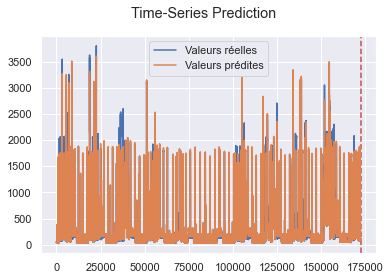

In [51]:
train_size=len(xtest)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(xtest,label="Valeurs réelles")
plt.plot(ytest, label="Valeurs prédites")
plt.legend()

plt.suptitle('Time-Series Prediction')
plt.show()